In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

In [2]:
from config import config
import pandas
import seaborn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import papermill as pm
from stacked_data import stacked_data
from tqdm import tqdm
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, IsolationForest, RandomForestClassifier, VotingClassifier
from sklearn import metrics

from evaluate import calculate_confusion_matrix_stats, plot_roc_curve, plot_precision_recall, plot_confusion_matrix_ensemble

Using TensorFlow backend.


/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", n

# Ensemble models

In [3]:
# Parameters
MODELS = ['7e946fc2-5f5d-46b8-94e6-c57ea02f32ad', 'ba0de65e-7e2b-483f-b2ec-f41a39959e6d']
SCORE = "accuracy"


In [4]:
models = MODELS
print("models: {}".format(models))

models: ['7e946fc2-5f5d-46b8-94e6-c57ea02f32ad', 'ba0de65e-7e2b-483f-b2ec-f41a39959e6d']


In [5]:
sd = stacked_data(uuids=models)

  0%|          | 0/710 [00:00<?, ?it/s]

  0%|          | 1/710 [00:00<01:18,  9.03it/s]

Training points = 710
Benign: 191, Intermediate: 519, Malignant: 0

Validation points = 201
Benign: 54, Intermediate: 147, Malignant: 0

Testing points = 100
Benign: 27, Intermediate: 73, Malignant: 0
bone-china-065
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-586
Does this patient have T2 available? True
I'm doing the thing.


  0%|          | 3/710 [00:00<01:15,  9.34it/s]

bone-china-069
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-552
Does this patient have T2 available? False
T2 image unavailable
bone-penn-319
Does this patient have T2 available? True
I'm doing the thing.
bone-china-017
Does this patient have T2 available? True
I'm doing the thing.


  1%|          | 6/710 [00:00<01:01, 11.45it/s]

bone-china-053
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-302
Does this patient have T2 available? True
I'm doing the thing.


  1%|          | 8/710 [00:00<01:34,  7.45it/s]

bone-hup-311
Does this patient have T2 available? True
I'm doing the thing.


  1%|▏         | 9/710 [00:01<03:57,  2.95it/s]

bone-china-067
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-555
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 11/710 [00:02<03:17,  3.53it/s]

  2%|▏         | 14/710 [00:02<02:29,  4.67it/s]

bone-hup-304
Does this patient have T2 available? True
T2 image unavailable
bone-china-018
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-154
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-296
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-274
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 16/710 [00:02<02:53,  4.00it/s]

  2%|▏         | 17/710 [00:02<02:23,  4.83it/s]

bone-hup-274
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-468
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 18/710 [00:04<05:38,  2.05it/s]

bone-china-001
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-312
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 20/710 [00:04<04:24,  2.61it/s]

bone-hup-321
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 21/710 [00:04<04:06,  2.79it/s]

bone-hup-316
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 22/710 [00:04<03:49,  3.00it/s]

bone-china-049
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-145
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 24/710 [00:05<03:31,  3.24it/s]

bone-penn-302
Does this patient have T2 available? False
T2 image unavailable
bone-china-036
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-500
Does this patient have T2 available? True
I'm doing the thing.


  4%|▍         | 27/710 [00:05<02:50,  4.02it/s]

  4%|▍         | 28/710 [00:05<02:25,  4.68it/s]

bone-china-009
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-303
Does this patient have T2 available? True
I'm doing the thing.


  4%|▍         | 29/710 [00:06<04:17,  2.64it/s]

  4%|▍         | 31/710 [00:06<03:14,  3.50it/s]

bone-penn-509
Does this patient have T2 available? True
I'm doing the thing.
bone-china-055
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-281
Does this patient have T2 available? True
I'm doing the thing.


  5%|▍         | 32/710 [00:07<02:58,  3.79it/s]

bone-penn-556
Does this patient have T2 available? True
I'm doing the thing.


  5%|▍         | 33/710 [00:07<02:49,  3.99it/s]

bone-china-075
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-317
Does this patient have T2 available? True
I'm doing the thing.


  5%|▍         | 35/710 [00:07<02:32,  4.44it/s]

bone-china-010
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-325
Does this patient have T2 available? True
I'm doing the thing.


  5%|▌         | 37/710 [00:07<02:15,  4.96it/s]

  6%|▌         | 41/710 [00:08<01:44,  6.42it/s]

bone-penn-133
Does this patient have T2 available? False
T2 image unavailable
bone-hup-299
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-331
Does this patient have T2 available? False
T2 image unavailable
bone-china-003
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-562
Does this patient have T2 available? False
T2 image unavailable
bone-china-015

  6%|▌         | 43/710 [00:08<01:23,  7.98it/s]


Does this patient have T2 available? True
I'm doing the thing.
bone-china-002
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-269
Does this patient have T2 available? True
T2 image unavailable
bone-china-066
Does this patient have T2 available? True
I'm doing the thing.


  6%|▋         | 46/710 [00:08<01:08,  9.71it/s]

  7%|▋         | 48/710 [00:08<01:06,  9.88it/s]

bone-china-061
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-549
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-508
Does this patient have T2 available? True
I'm doing the thing.


  7%|▋         | 50/710 [00:08<01:15,  8.70it/s]

bone-china-032
Does this patient have T2 available? True
I'm doing the thing.
bone-china-023
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-565
Does this patient have T2 available? True
I'm doing the thing.


  7%|▋         | 52/710 [00:09<01:43,  6.38it/s]

  7%|▋         | 53/710 [00:09<01:37,  6.71it/s]

bone-hup-155
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-310
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 54/710 [00:09<01:34,  6.98it/s]

  8%|▊         | 55/710 [00:09<01:25,  7.65it/s]

bone-china-038
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-296
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 56/710 [00:09<01:55,  5.66it/s]

bone-china-043
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-320
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 58/710 [00:10<02:32,  4.27it/s]

bone-china-040
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-548
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 60/710 [00:11<02:14,  4.85it/s]

bone-hup-322
Does this patient have T2 available? True
I'm doing the thing.


  9%|▊         | 61/710 [00:11<02:39,  4.07it/s]

  9%|▊         | 62/710 [00:11<02:13,  4.84it/s]

bone-china-014
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-275
Does this patient have T2 available? True
I'm doing the thing.


  9%|▉         | 63/710 [00:12<04:19,  2.49it/s]

  9%|▉         | 64/710 [00:12<03:26,  3.12it/s]

bone-china-054
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-567
Does this patient have T2 available? True
T2 image unavailable
bone-china-025
Does this patient have T2 available? True
I'm doing the thing.


  9%|▉         | 66/710 [00:12<02:37,  4.09it/s]

 10%|▉         | 68/710 [00:12<02:07,  5.04it/s]

bone-penn-129
Does this patient have T2 available? False
T2 image unavailable
bone-hup-307
Does this patient have T2 available? True
I'm doing the thing.
bone-china-056
Does this patient have T2 available? True
I'm doing the thing.


 10%|▉         | 69/710 [00:12<01:48,  5.92it/s]

 10%|▉         | 70/710 [00:13<01:53,  5.61it/s]

bone-penn-455
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-563
Does this patient have T2 available? False
T2 image unavailable
bone-china-008
Does this patient have T2 available? True
I'm doing the thing.


 10%|█         | 72/710 [00:13<01:29,  7.11it/s]

 11%|█         | 75/710 [00:13<01:14,  8.47it/s]

bone-penn-476
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-117
Does this patient have T2 available? False
T2 image unavailable
bone-penn-142
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-136
Does this patient have T2 available? False
T2 image unavailable
bone-china-013
Does this patient have T2 available? True
I'm doing the thing.


 11%|█         | 77/710 [00:13<01:07,  9.31it/s]

 11%|█         | 79/710 [00:13<01:01, 10.19it/s]

bone-penn-138
Does this patient have T2 available? False
T2 image unavailable
bone-hup-291
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-328
Does this patient have T2 available? True
I'm doing the thing.


 11%|█▏        | 81/710 [00:14<01:58,  5.31it/s]

bone-china-041
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-560
Does this patient have T2 available? False
T2 image unavailable
bone-china-006
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 84/710 [00:14<01:29,  6.98it/s]

bone-penn-497
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-143
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-116
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 86/710 [00:15<01:54,  5.47it/s]

bone-penn-491
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-494
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 88/710 [00:15<02:17,  4.54it/s]

bone-china-019
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-132
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 90/710 [00:16<02:28,  4.16it/s]

 13%|█▎        | 91/710 [00:16<02:05,  4.94it/s]

bone-china-033
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-375
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 92/710 [00:16<02:05,  4.92it/s]

bone-penn-456
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 93/710 [00:16<02:23,  4.31it/s]

bone-penn-474
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-323
Does this patient have T2 available? True
T2 image unavailable
bone-hup-309
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▎        | 96/710 [00:17<01:53,  5.41it/s]

 14%|█▎        | 97/710 [00:17<01:38,  6.22it/s]

bone-china-031
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-568
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▍        | 98/710 [00:17<01:42,  5.94it/s]

bone-china-071
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-557
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▍        | 100/710 [00:17<01:42,  5.92it/s]

 15%|█▍        | 103/710 [00:17<01:18,  7.73it/s]

bone-penn-315
Does this patient have T2 available? False
T2 image unavailable
bone-china-045
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-276
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-131
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▍        | 105/710 [00:18<01:24,  7.16it/s]

bone-penn-158
Does this patient have T2 available? False
T2 image unavailable
bone-hup-135
Does this patient have T2 available? True
T2 image unavailable
bone-penn-140
Does this patient have T2 available? True
I'm doing the thing.
bone-china-080
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▌        | 108/710 [00:18<01:11,  8.42it/s]

bone-hup-266
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▌        | 110/710 [00:18<01:33,  6.40it/s]

bone-hup-142
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-148
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▌        | 111/710 [00:19<01:48,  5.54it/s]

bone-china-020
Does this patient have T2 available? True
I'm doing the thing.
bone-china-029
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-391
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▌        | 114/710 [00:19<01:29,  6.67it/s]

 16%|█▌        | 115/710 [00:19<01:26,  6.89it/s]

bone-penn-155
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-272
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▋        | 116/710 [00:19<02:11,  4.50it/s]

bone-penn-490
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▋        | 117/710 [00:20<02:38,  3.74it/s]

 17%|█▋        | 118/710 [00:20<02:11,  4.51it/s]

bone-penn-459
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-566
Does this patient have T2 available? True
I'm doing the thing.
bone-china-089
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 120/710 [00:20<01:40,  5.85it/s]

bone-penn-591
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 122/710 [00:20<01:44,  5.63it/s]

bone-hup-292
Does this patient have T2 available? True
I'm doing the thing.
bone-china-081
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 123/710 [00:21<01:42,  5.72it/s]

 17%|█▋        | 124/710 [00:21<01:36,  6.06it/s]

bone-china-044
Does this patient have T2 available? True
I'm doing the thing.
bone-china-059
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 126/710 [00:21<01:31,  6.41it/s]

bone-hup-150
Does this patient have T2 available? True
I'm doing the thing.
bone-china-042
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 127/710 [00:21<01:29,  6.55it/s]

bone-penn-134
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 128/710 [00:21<02:01,  4.80it/s]

 18%|█▊        | 129/710 [00:22<01:49,  5.29it/s]

bone-hup-145
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-612
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 130/710 [00:22<02:54,  3.33it/s]

 18%|█▊        | 131/710 [00:22<02:19,  4.15it/s]

bone-china-068
Does this patient have T2 available? True
I'm doing the thing.
bone-china-058
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▊        | 132/710 [00:23<04:13,  2.28it/s]

 19%|█▊        | 133/710 [00:23<03:30,  2.75it/s]

bone-china-084
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-124
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 134/710 [00:24<02:46,  3.46it/s]

bone-hup-271
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 135/710 [00:24<02:50,  3.38it/s]

bone-penn-127
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 136/710 [00:24<02:49,  3.39it/s]

 19%|█▉        | 137/710 [00:24<02:24,  3.98it/s]

bone-penn-141
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-144
Does this patient have T2 available? True
T2 image unavailable
bone-hup-324
Does this patient have T2 available? True
T2 image unavailable
bone-china-062
Does this patient have T2 available? True
I'm doing the thing.


 20%|█▉        | 140/710 [00:24<01:49,  5.20it/s]

 20%|██        | 142/710 [00:25<01:29,  6.35it/s]

bone-penn-287
Does this patient have T2 available? False
T2 image unavailable
bone-hup-151
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-306
Does this patient have T2 available? True
I'm doing the thing.


 20%|██        | 144/710 [00:25<01:23,  6.74it/s]

bone-china-090
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-569
Does this patient have T2 available? True
I'm doing the thing.


 20%|██        | 145/710 [00:25<01:27,  6.47it/s]

 21%|██        | 148/710 [00:25<01:09,  8.12it/s]

bone-penn-421
Does this patient have T2 available? True
T2 image unavailable
bone-hup-257
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-551
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-308
Does this patient have T2 available? True
I'm doing the thing.


 21%|██        | 150/710 [00:25<01:09,  8.06it/s]

bone-penn-471
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-298
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-137
Does this patient have T2 available? True
I'm doing the thing.


 21%|██▏       | 152/710 [00:26<01:02,  8.88it/s]

bone-hup-157
Does this patient have T2 available? True
I'm doing the thing.


 22%|██▏       | 154/710 [00:26<01:40,  5.51it/s]

bone-hup-163
Does this patient have T2 available? True
T2 image unavailable
bone-hup-134
Does this patient have T2 available? True
I'm doing the thing.


 22%|██▏       | 155/710 [00:27<02:09,  4.30it/s]

 22%|██▏       | 158/710 [00:27<01:38,  5.62it/s]

bone-penn-558
Does this patient have T2 available? False
T2 image unavailable
bone-china-026
Does this patient have T2 available? True
I'm doing the thing.
bone-china-030
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-304
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 160/710 [00:27<01:29,  6.14it/s]

bone-hup-131
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-326
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 161/710 [00:28<02:36,  3.51it/s]

bone-hup-290
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 162/710 [00:28<02:27,  3.71it/s]

bone-penn-153
Does this patient have T2 available? False
T2 image unavailable
bone-penn-289
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 164/710 [00:28<02:01,  4.49it/s]

 23%|██▎       | 165/710 [00:28<01:57,  4.62it/s]

bone-hup-265
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 166/710 [00:28<01:49,  4.95it/s]

bone-hup-293
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-137
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▎       | 167/710 [00:29<02:13,  4.08it/s]

 24%|██▎       | 168/710 [00:29<01:58,  4.58it/s]

bone-china-035
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-348
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▍       | 170/710 [00:29<01:35,  5.66it/s]

 24%|██▍       | 171/710 [00:29<01:24,  6.38it/s]

bone-hup-161
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-327
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-361
Does this patient have T2 available? True
T2 image unavailable
bone-china-085
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▍       | 173/710 [00:29<01:07,  7.92it/s]

 25%|██▍       | 175/710 [00:29<01:02,  8.53it/s]

bone-china-021
Does this patient have T2 available? True
I'm doing the thing.
bone-china-077
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-559
Does this patient have T2 available? True
I'm doing the thing.


 25%|██▍       | 177/710 [00:30<00:52, 10.12it/s]

bone-china-048
Does this patient have T2 available? True
T2 image unavailable
bone-penn-130
Does this patient have T2 available? True
I'm doing the thing.
bone-china-047
Does this patient have T2 available? True
I'm doing the thing.


 25%|██▌       | 179/710 [00:30<00:59,  8.94it/s]

bone-china-060
Does this patient have T2 available? True
I'm doing the thing.
bone-china-027
Does this patient have T2 available? True
I'm doing the thing.


 25%|██▌       | 181/710 [00:30<00:59,  8.92it/s]

 26%|██▌       | 183/710 [00:30<00:54,  9.63it/s]

bone-china-087
Does this patient have T2 available? True
I'm doing the thing.
bone-china-050
Does this patient have T2 available? True
I'm doing the thing.
bone-china-072
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▌       | 185/710 [00:31<00:57,  9.20it/s]

bone-penn-149
Does this patient have T2 available? True
I'm doing the thing.
bone-china-004
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-318
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▋       | 187/710 [00:32<02:01,  4.32it/s]

 26%|██▋       | 188/710 [00:32<01:52,  4.63it/s]

bone-penn-495
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-146
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 190/710 [00:32<01:34,  5.49it/s]

bone-penn-303
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-246
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 192/710 [00:32<01:17,  6.70it/s]

bone-hup-143
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-84
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 193/710 [00:32<01:38,  5.27it/s]

 27%|██▋       | 194/710 [00:33<01:36,  5.34it/s]

bone-hup-201
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-325
Does this patient have T2 available? True
T2 image unavailable
bone-china-102
Does this patient have T2 available? True
T2 image unavailable
bone-china-206
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-92
Does this patient have T2 available? True
T2 image unavailable
bone-penn-262
Does this patient have T2 available? True
I'm doing the thing.


 28%|██▊       | 199/710 [00:33<01:20,  6.37it/s]


################################################################################
Exception occurred for: outcome_pos          1
outcome_neg          1
outcome_3            2
sort                 -
volume         0.14036
Name: bone-penn-262, dtype: object
index 352 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plane, ax

 28%|██▊       | 201/710 [00:33<01:22,  6.21it/s]

bone-penn-371
Does this patient have T2 available? True
T2 image unavailable
bone-hup-77
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-260
Does this patient have T2 available? True
I'm doing the thing.


 29%|██▊       | 204/710 [00:34<01:12,  7.00it/s]

 29%|██▉       | 205/710 [00:34<01:13,  6.90it/s]

bone-penn-469
Does this patient have T2 available? True
I'm doing the thing.
bone-china-190
Does this patient have T2 available? True
I'm doing the thing.


 29%|██▉       | 206/710 [00:34<01:18,  6.40it/s]

bone-hup-71
Does this patient have T2 available? False
T2 image unavailable
bone-penn-299
Does this patient have T2 available? True
I'm doing the thing.


 29%|██▉       | 208/710 [00:34<01:12,  6.93it/s]

 29%|██▉       | 209/710 [00:34<01:07,  7.40it/s]

bone-penn-528
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-631
Does this patient have T2 available? True
I'm doing the thing.


 30%|██▉       | 210/710 [00:34<01:06,  7.48it/s]

 30%|██▉       | 211/710 [00:35<01:14,  6.71it/s]

bone-hup-219
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-466
Does this patient have T2 available? True
I'm doing the thing.


 30%|██▉       | 212/710 [00:35<01:55,  4.31it/s]

bone-hup-284
Does this patient have T2 available? True
T2 image unavailable
bone-penn-107
Does this patient have T2 available? True
I'm doing the thing.


 30%|███       | 214/710 [00:35<01:45,  4.71it/s]

 30%|███       | 216/710 [00:36<01:27,  5.66it/s]

bone-hup-105
Does this patient have T2 available? True
I'm doing the thing.
bone-china-169
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-2
Does this patient have T2 available? True
I'm doing the thing.


 31%|███       | 217/710 [00:36<02:37,  3.12it/s]

bone-hup-283
Does this patient have T2 available? True
I'm doing the thing.
bone-china-243
Does this patient have T2 available? True
I'm doing the thing.


 31%|███       | 219/710 [00:37<02:11,  3.73it/s]

bone-hup-84
Does this patient have T2 available? True
I'm doing the thing.


 31%|███       | 220/710 [00:37<03:21,  2.43it/s]

 31%|███▏      | 223/710 [00:37<02:26,  3.33it/s]

bone-penn-123
Does this patient have T2 available? True
T2 image unavailable
bone-hup-108
Does this patient have T2 available? True
I'm doing the thing.
bone-china-136
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-185
Does this patient have T2 available? True
I'm doing the thing.


 32%|███▏      | 225/710 [00:37<01:50,  4.40it/s]

bone-penn-483
Does this patient have T2 available? True
T2 image unavailable
bone-penn-620
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-467
Does this patient have T2 available? True
I'm doing the thing.


 32%|███▏      | 227/710 [00:38<01:39,  4.86it/s]

bone-penn-462
Does this patient have T2 available? True
I'm doing the thing.


 32%|███▏      | 229/710 [00:38<01:38,  4.86it/s]

 33%|███▎      | 232/710 [00:38<01:14,  6.41it/s]

bone-penn-259
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-523
Does this patient have T2 available? False
T2 image unavailable
bone-hup-243
Does this patient have T2 available? True
T2 image unavailable
bone-hup-110
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-208
Does this patient have T2 available? False
T2 image unavailable
bone-penn-276
Does this patient have T2 available? True
T2 image unavailable
bone-hup-203
Does this patient have T2 available? True
I'm doing the thing.


 33%|███▎      | 236/710 [00:38<00:56,  8.43it/s]

bone-china-100
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-197
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▎      | 238/710 [00:39<00:57,  8.24it/s]

bone-china-143
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-176
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-540
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▍      | 240/710 [00:39<01:00,  7.71it/s]

bone-penn-519
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-179
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▍      | 242/710 [00:39<01:00,  7.79it/s]

 34%|███▍      | 244/710 [00:39<00:56,  8.30it/s]

bone-china-127
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-243
Does this patient have T2 available? True
T2 image unavailable


 35%|███▍      | 246/710 [00:40<00:48,  9.62it/s]

bone-penn-570
Does this patient have T2 available? False
T2 image unavailable
bone-penn-116
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-526
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▍      | 248/710 [00:40<01:16,  6.03it/s]


################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           1
outcome_3             1
sort                  -
volume         0.140097
Name: bone-penn-526, dtype: object
index 213 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 35%|███▌      | 250/710 [00:40<01:09,  6.59it/s]

bone-penn-423
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▌      | 251/710 [00:41<02:06,  3.62it/s]

 36%|███▌      | 253/710 [00:41<01:35,  4.80it/s]

bone-penn-327
Does this patient have T2 available? True
T2 image unavailable
bone-china-228
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-219
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-258
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▌      | 255/710 [00:41<01:26,  5.25it/s]

bone-hup-180
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▌      | 256/710 [00:42<01:30,  5.00it/s]

 36%|███▌      | 257/710 [00:42<01:28,  5.13it/s]

bone-penn-484
Does this patient have T2 available? True
I'm doing the thing.
bone-china-175
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▋      | 258/710 [00:42<01:20,  5.59it/s]

 36%|███▋      | 259/710 [00:42<01:18,  5.74it/s]

bone-penn-486
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-377
Does this patient have T2 available? False
T2 image unavailable
bone-penn-475
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 261/710 [00:42<01:03,  7.10it/s]

 37%|███▋      | 263/710 [00:42<00:54,  8.20it/s]

bone-penn-318
Does this patient have T2 available? True
T2 image unavailable
bone-penn-305
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-387
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 265/710 [00:43<01:13,  6.02it/s]

bone-penn-368
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-226
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-128
Does this patient have T2 available? False
T2 image unavailable
bone-penn-610
Does this patient have T2 available? True
I'm doing the thing.


 38%|███▊      | 268/710 [00:43<01:03,  6.92it/s]

 38%|███▊      | 271/710 [00:43<00:48,  8.99it/s]

bone-hup-165
Does this patient have T2 available? True
T2 image unavailable
bone-penn-619
Does this patient have T2 available? True
T2 image unavailable
bone-penn-460
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-161
Does this patient have T2 available? True
I'm doing the thing.


 38%|███▊      | 273/710 [00:44<00:53,  8.21it/s]

bone-hup-164
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-641
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-3
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▊      | 275/710 [00:44<01:01,  7.04it/s]

 39%|███▉      | 278/710 [00:44<00:51,  8.45it/s]

bone-penn-269
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-210
Does this patient have T2 available? True
T2 image unavailable
bone-penn-530
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-190
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▉      | 280/710 [00:45<00:56,  7.67it/s]

bone-penn-435
Does this patient have T2 available? True
I'm doing the thing.
bone-china-193
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-383
Does this patient have T2 available? True
I'm doing the thing.


 40%|███▉      | 282/710 [00:45<01:01,  6.94it/s]

bone-hup-174
Does this patient have T2 available? True
I'm doing the thing.


 40%|███▉      | 283/710 [00:45<01:54,  3.72it/s]

bone-penn-85
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-215
Does this patient have T2 available? True
T2 image unavailable
bone-penn-101
Does this patient have T2 available? True
I'm doing the thing.


 40%|████      | 286/710 [00:46<01:32,  4.59it/s]

bone-penn-584
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           1
outcome_3             1
sort                  -
volume         0.145203
Name: bone-penn-584, dtype: object
operands could not be broadcast together with shapes (255,20) (318,20) 
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", 

 41%|████      | 288/710 [00:46<01:26,  4.89it/s]

bone-penn-213
Does this patient have T2 available? False
T2 image unavailable
bone-penn-232
Does this patient have T2 available? True
I'm doing the thing.


 41%|████      | 290/710 [00:47<01:32,  4.52it/s]

bone-penn-637
Does this patient have T2 available? True
I'm doing the thing.


 41%|████      | 291/710 [00:47<01:40,  4.18it/s]

 41%|████      | 292/710 [00:47<01:25,  4.91it/s]

bone-china-166
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-133
Does this patient have T2 available? True
I'm doing the thing.


 41%|████▏     | 293/710 [00:47<01:13,  5.65it/s]

 42%|████▏     | 295/710 [00:47<01:02,  6.60it/s]

bone-hup-149
Does this patient have T2 available? True
T2 image unavailable
bone-penn-407
Does this patient have T2 available? True
I'm doing the thing.
bone-china-225
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 296/710 [00:47<01:01,  6.74it/s]

bone-penn-307
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 297/710 [00:48<01:14,  5.57it/s]

 42%|████▏     | 298/710 [00:48<01:15,  5.49it/s]

bone-hup-231
Does this patient have T2 available? True
I'm doing the thing.
bone-china-156
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-252
Does this patient have T2 available? True
T2 image unavailable
bone-penn-524
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 301/710 [00:48<01:06,  6.19it/s]

bone-penn-392
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 302/710 [00:49<01:29,  4.57it/s]

bone-china-140
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-122
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 304/710 [00:49<01:16,  5.33it/s]

 43%|████▎     | 306/710 [00:49<01:01,  6.62it/s]

bone-hup-230
Does this patient have T2 available? False
T2 image unavailable
bone-china-101
Does this patient have T2 available? True
I'm doing the thing.
bone-china-232
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 307/710 [00:49<00:54,  7.36it/s]

bone-hup-156
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 308/710 [00:50<01:44,  3.85it/s]

bone-china-213
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-298
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▎     | 310/710 [00:50<01:25,  4.67it/s]

 44%|████▍     | 312/710 [00:50<01:11,  5.58it/s]

bone-china-198
Does this patient have T2 available? True
I'm doing the thing.
bone-china-170
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-622
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▍     | 313/710 [00:50<01:12,  5.47it/s]

 44%|████▍     | 314/710 [00:50<01:05,  6.05it/s]

bone-penn-160
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-547
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-218
Does this patient have T2 available? True
I'm doing the thing.


 45%|████▍     | 316/710 [00:51<01:09,  5.64it/s]

bone-penn-100
Does this patient have T2 available? False
T2 image unavailable
bone-hup-121
Does this patient have T2 available? False
T2 image unavailable
bone-hup-202
Does this patient have T2 available? True
T2 image unavailable
bone-penn-119
Does this patient have T2 available? True
I'm doing the thing.
bone-china-096
Does this patient have T2 available? True
T2 image unavailable
bone-penn-248
Does this patient have T2 available? False
T2 image unavailable
bone-penn-653
Does this patient have T2 available? True
I'm doing the thing.


 45%|████▌     | 323/710 [00:51<00:51,  7.49it/s]

bone-penn-384
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-244
Does this patient have T2 available? True
I'm doing the thing.


 46%|████▌     | 325/710 [00:51<00:47,  8.04it/s]

bone-penn-202
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-650
Does this patient have T2 available? True
I'm doing the thing.


 46%|████▌     | 327/710 [00:52<01:50,  3.48it/s]

 46%|████▌     | 328/710 [00:53<01:30,  4.22it/s]

bone-china-124
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-294
Does this patient have T2 available? False
T2 image unavailable
bone-penn-376
Does this patient have T2 available? False
T2 image unavailable
bone-penn-221
Does this patient have T2 available? False
T2 image unavailable
bone-penn-393
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-333
Does this patient have T2 available? True
T2 image unavailable
bone-penn-212
Does this patient have T2 available? False
T2 image unavailable
bone-hup-225
Does this patient have T2 available? True
I'm doing the thing.


 47%|████▋     | 335/710 [00:53<01:04,  5.85it/s]

 48%|████▊     | 339/710 [00:53<00:48,  7.57it/s]

bone-penn-477
Does this patient have T2 available? False
T2 image unavailable
bone-penn-324
Does this patient have T2 available? False
T2 image unavailable
bone-china-129
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-102
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-332
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-283
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 342/710 [00:54<00:57,  6.40it/s]

bone-hup-277
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-301
Does this patient have T2 available? False
T2 image unavailable
bone-penn-183
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 344/710 [00:54<00:47,  7.69it/s]

bone-hup-112
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▊     | 346/710 [00:54<00:54,  6.69it/s]

bone-hup-79
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-194
Does this patient have T2 available? False
T2 image unavailable
bone-penn-492
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▉     | 348/710 [00:54<00:47,  7.56it/s]

bone-penn-314
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-279
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▉     | 350/710 [00:55<01:18,  4.61it/s]

bone-penn-264
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▉     | 351/710 [00:55<01:21,  4.43it/s]

bone-hup-185
Does this patient have T2 available? True
T2 image unavailable
bone-penn-615
Does this patient have T2 available? True
I'm doing the thing.


 50%|████▉     | 353/710 [00:56<01:14,  4.82it/s]

bone-penn-429
Does this patient have T2 available? True
I'm doing the thing.


 50%|████▉     | 354/710 [00:56<01:13,  4.82it/s]

bone-china-103
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-65
Does this patient have T2 available? True
I'm doing the thing.


 50%|█████     | 356/710 [00:56<01:05,  5.37it/s]

bone-china-242
Does this patient have T2 available? True
I'm doing the thing.


 50%|█████     | 357/710 [00:56<01:14,  4.73it/s]

 50%|█████     | 358/710 [00:57<01:04,  5.42it/s]

bone-penn-257
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140257
Name: bone-penn-257, dtype: object
index 74 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image

 51%|█████     | 359/710 [00:57<01:06,  5.29it/s]

bone-hup-97
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████     | 360/710 [00:57<01:13,  4.75it/s]

bone-penn-178
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████     | 361/710 [00:57<01:16,  4.54it/s]

 51%|█████     | 362/710 [00:57<01:04,  5.38it/s]

bone-penn-520
Does this patient have T2 available? True
I'm doing the thing.
bone-china-108
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████     | 363/710 [00:57<00:56,  6.18it/s]

bone-hup-90
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████▏    | 364/710 [00:58<01:32,  3.73it/s]

 51%|█████▏    | 365/710 [00:58<01:18,  4.40it/s]

bone-china-093
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-418
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 366/710 [00:59<01:55,  2.97it/s]

 52%|█████▏    | 368/710 [00:59<01:26,  3.97it/s]

bone-penn-199
Does this patient have T2 available? False
T2 image unavailable
bone-china-173
Does this patient have T2 available? True
I'm doing the thing.
bone-china-202
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 369/710 [00:59<01:11,  4.77it/s]

bone-penn-182
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 370/710 [00:59<01:46,  3.20it/s]

bone-china-197
Does this patient have T2 available? True
T2 image unavailable
bone-penn-96
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 372/710 [01:00<01:41,  3.34it/s]

bone-hup-30
Does this patient have T2 available? False
T2 image unavailable
bone-hup-55
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-389
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 375/710 [01:01<01:30,  3.72it/s]

bone-penn-589
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 376/710 [01:01<01:26,  3.85it/s]

 53%|█████▎    | 377/710 [01:01<01:12,  4.58it/s]

bone-hup-176
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-271
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 378/710 [01:01<01:09,  4.80it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140764
Name: bone-penn-271, dtype: object
index 183 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 53%|█████▎    | 379/710 [01:01<01:13,  4.53it/s]

 54%|█████▎    | 380/710 [01:01<01:01,  5.40it/s]

bone-penn-541
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-628
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▎    | 381/710 [01:02<00:55,  5.90it/s]

 54%|█████▍    | 382/710 [01:02<01:00,  5.41it/s]

bone-china-113
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 383/710 [01:02<00:52,  6.25it/s]

bone-china-110
Does this patient have T2 available? True
I'm doing the thing.
bone-china-223
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 384/710 [01:02<00:48,  6.74it/s]

bone-penn-517
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 385/710 [01:02<00:54,  5.93it/s]

 54%|█████▍    | 386/710 [01:02<00:55,  5.83it/s]

bone-penn-514
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-263
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▍    | 387/710 [01:03<01:08,  4.72it/s]

bone-penn-498
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-465
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▍    | 389/710 [01:03<01:10,  4.58it/s]

bone-china-221
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-136
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▌    | 391/710 [01:03<00:59,  5.40it/s]

bone-penn-239
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▌    | 392/710 [01:04<01:00,  5.22it/s]

bone-hup-88
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▌    | 393/710 [01:04<01:24,  3.76it/s]

bone-penn-518
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▌    | 394/710 [01:04<01:27,  3.60it/s]

bone-hup-245
Does this patient have T2 available? True
T2 image unavailable
bone-penn-254
Does this patient have T2 available? True
I'm doing the thing.


 56%|█████▌    | 396/710 [01:05<01:11,  4.37it/s]

bone-hup-195
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-249
Does this patient have T2 available? False
T2 image unavailable
bone-penn-364
Does this patient have T2 available? True
I'm doing the thing.


 56%|█████▌    | 399/710 [01:05<01:00,  5.11it/s]

bone-penn-596
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-221
Does this patient have T2 available? False
T2 image unavailable
bone-hup-192
Does this patient have T2 available? True
I'm doing the thing.


 57%|█████▋    | 402/710 [01:05<00:48,  6.33it/s]

 57%|█████▋    | 403/710 [01:05<00:47,  6.52it/s]

bone-penn-544
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-91
Does this patient have T2 available? True
I'm doing the thing.


 57%|█████▋    | 405/710 [01:05<00:39,  7.64it/s]

bone-penn-115
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-367
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-67
Does this patient have T2 available? True
I'm doing the thing.


 57%|█████▋    | 407/710 [01:06<00:35,  8.49it/s]

bone-penn-227
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 409/710 [01:07<01:10,  4.28it/s]

bone-penn-649
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-366
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 410/710 [01:07<01:02,  4.81it/s]

 58%|█████▊    | 411/710 [01:07<01:01,  4.84it/s]

bone-penn-632
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-172
Does this patient have T2 available? False
T2 image unavailable
bone-hup-74
Does this patient have T2 available? True
T2 image unavailable
bone-penn-587
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 414/710 [01:07<00:50,  5.92it/s]

bone-penn-627
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 415/710 [01:08<01:22,  3.59it/s]

 59%|█████▊    | 416/710 [01:08<01:10,  4.15it/s]

bone-penn-479
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-51
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▊    | 417/710 [01:08<01:02,  4.73it/s]

 59%|█████▉    | 419/710 [01:08<00:50,  5.73it/s]

bone-china-094
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-174
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-182
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 421/710 [01:08<00:41,  6.88it/s]

bone-china-132
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-193
Does this patient have T2 available? True
I'm doing the thing.


bone-china-180
Does this patient have T2 available? True
I'm doing the thing.


 60%|█████▉    | 423/710 [01:09<00:49,  5.85it/s]

 60%|██████    | 427/710 [01:09<00:37,  7.51it/s]

bone-penn-164
Does this patient have T2 available? True
T2 image unavailable
bone-penn-225
Does this patient have T2 available? False
T2 image unavailable
bone-hup-212
Does this patient have T2 available? True
I'm doing the thing.
bone-china-199
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-355
Does this patient have T2 available? True
T2 image unavailable
bone-penn-171
Does this patient have T2 available? True
I'm doing the thing.


 60%|██████    | 429/710 [01:09<00:34,  8.14it/s]

bone-penn-245
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-236
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 431/710 [01:10<00:42,  6.54it/s]

bone-penn-601
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 432/710 [01:11<01:46,  2.61it/s]

 61%|██████    | 434/710 [01:11<01:18,  3.50it/s]

bone-penn-592
Does this patient have T2 available? True
I'm doing the thing.
bone-china-192
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-630
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████▏   | 436/710 [01:11<01:07,  4.06it/s]

bone-hup-96
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-88
Does this patient have T2 available? False
T2 image unavailable
bone-china-212
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-363
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▏   | 439/710 [01:12<01:01,  4.44it/s]

bone-penn-539
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▏   | 440/710 [01:12<01:07,  4.02it/s]

 62%|██████▏   | 442/710 [01:12<00:54,  4.95it/s]

bone-china-164
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-322
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-362
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▏   | 443/710 [01:12<01:02,  4.29it/s]

bone-hup-199
Does this patient have T2 available? True
T2 image unavailable
bone-hup-141
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 445/710 [01:13<01:05,  4.05it/s]

bone-penn-507
Does this patient have T2 available? True
T2 image unavailable
bone-penn-241
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 447/710 [01:13<01:05,  3.99it/s]

bone-hup-234
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 448/710 [01:14<01:04,  4.09it/s]

bone-penn-480
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 449/710 [01:14<01:05,  3.98it/s]

bone-china-097
Does this patient have T2 available? False
T2 image unavailable
bone-penn-401
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▎   | 451/710 [01:14<00:58,  4.41it/s]

 64%|██████▎   | 452/710 [01:14<00:50,  5.09it/s]

bone-china-200
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-597
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▍   | 453/710 [01:16<02:03,  2.08it/s]

 64%|██████▍   | 455/710 [01:16<01:30,  2.82it/s]

bone-hup-187
Does this patient have T2 available? False
T2 image unavailable
bone-penn-266
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-188
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▍   | 456/710 [01:16<01:10,  3.59it/s]

 64%|██████▍   | 457/710 [01:16<00:58,  4.36it/s]

bone-china-123
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-167
Does this patient have T2 available? True
T2 image unavailable
bone-penn-229
Does this patient have T2 available? True
I'm doing the thing.


 65%|██████▍   | 459/710 [01:16<00:53,  4.68it/s]

 65%|██████▍   | 460/710 [01:16<00:47,  5.31it/s]

bone-china-201
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-317
Does this patient have T2 available? True
I'm doing the thing.


 65%|██████▍   | 461/710 [01:16<00:40,  6.13it/s]

 65%|██████▌   | 463/710 [01:17<00:32,  7.70it/s]

bone-hup-197
Does this patient have T2 available? True
T2 image unavailable
bone-china-112
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-282
Does this patient have T2 available? True
I'm doing the thing.


 65%|██████▌   | 465/710 [01:17<00:31,  7.72it/s]

bone-penn-252
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140131
Name: bone-penn-252, dtype: object
index 182 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_imag

 66%|██████▌   | 467/710 [01:17<00:33,  7.15it/s]

 66%|██████▌   | 468/710 [01:17<00:35,  6.82it/s]

bone-hup-63
Does this patient have T2 available? False
T2 image unavailable
bone-penn-163
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-306
Does this patient have T2 available? True
T2 image unavailable
bone-hup-89
Does this patient have T2 available? True
I'm doing the thing.


 66%|██████▌   | 470/710 [01:18<00:33,  7.11it/s]

bone-penn-102
Does this patient have T2 available? True
I'm doing the thing.


 66%|██████▋   | 471/710 [01:18<01:14,  3.20it/s]

bone-penn-265
Does this patient have T2 available? True
I'm doing the thing.


 66%|██████▋   | 472/710 [01:19<01:08,  3.47it/s]

 67%|██████▋   | 473/710 [01:19<00:59,  3.98it/s]

bone-hup-226
Does this patient have T2 available? True
I'm doing the thing.
bone-china-210
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 474/710 [01:19<00:51,  4.62it/s]

 67%|██████▋   | 475/710 [01:19<00:42,  5.49it/s]

bone-penn-532
Does this patient have T2 available? True
I'm doing the thing.
bone-china-154
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-374
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 477/710 [01:19<00:41,  5.62it/s]

 67%|██████▋   | 478/710 [01:19<00:41,  5.55it/s]

bone-penn-636
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-235
Does this patient have T2 available? True
T2 image unavailable
bone-penn-381
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 481/710 [01:20<00:33,  6.91it/s]

bone-penn-422
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-403
Does this patient have T2 available? True
I'm doing the thing.
bone-china-155
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 483/710 [01:20<00:26,  8.56it/s]

bone-china-195
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-125
Does this patient have T2 available? True
T2 image unavailable
bone-hup-69
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 486/710 [01:20<00:24,  9.14it/s]

bone-hup-80
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▊   | 488/710 [01:20<00:27,  7.95it/s]

bone-penn-117
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-578
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-194
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▉   | 490/710 [01:22<01:10,  3.11it/s]

 69%|██████▉   | 493/710 [01:22<00:52,  4.16it/s]

bone-hup-189
Does this patient have T2 available? True
T2 image unavailable
bone-hup-81
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-511
Does this patient have T2 available? True
I'm doing the thing.
bone-china-189
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-273
Does this patient have T2 available? True
I'm doing the thing.


 70%|██████▉   | 495/710 [01:23<00:53,  3.98it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140641
Name: bone-penn-273, dtype: object
index 246 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 70%|██████▉   | 496/710 [01:23<00:54,  3.91it/s]

 70%|███████   | 497/710 [01:23<00:45,  4.67it/s]

bone-hup-175
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-313
Does this patient have T2 available? True
I'm doing the thing.


 70%|███████   | 498/710 [01:23<00:46,  4.56it/s]

 70%|███████   | 500/710 [01:23<00:37,  5.62it/s]

bone-penn-89
Does this patient have T2 available? False
T2 image unavailable
bone-hup-92
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-232
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████   | 501/710 [01:24<00:57,  3.63it/s]

bone-penn-489
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████   | 502/710 [01:24<01:07,  3.10it/s]

bone-hup-148
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████   | 503/710 [01:25<01:03,  3.25it/s]

 71%|███████   | 505/710 [01:25<00:48,  4.22it/s]

bone-china-222
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-94
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-101
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████▏  | 506/710 [01:25<00:49,  4.12it/s]

 72%|███████▏  | 508/710 [01:25<00:37,  5.35it/s]

bone-penn-196
Does this patient have T2 available? False
T2 image unavailable
bone-china-147
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-237
Does this patient have T2 available? True
I'm doing the thing.


 72%|███████▏  | 509/710 [01:25<00:37,  5.37it/s]

bone-china-179
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-452
Does this patient have T2 available? True
I'm doing the thing.


 72%|███████▏  | 511/710 [01:26<00:34,  5.73it/s]

 72%|███████▏  | 514/710 [01:26<00:26,  7.29it/s]

bone-china-171
Does this patient have T2 available? True
I'm doing the thing.
bone-china-144
Does this patient have T2 available? True
I'm doing the thing.
bone-china-226
Does this patient have T2 available? True
I'm doing the thing.
bone-china-120
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 516/710 [01:26<00:24,  8.03it/s]

bone-penn-648
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-85
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-244
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 518/710 [01:27<00:38,  5.04it/s]

 73%|███████▎  | 519/710 [01:27<00:32,  5.86it/s]

bone-hup-228
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-191
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 520/710 [01:27<00:38,  4.91it/s]

bone-hup-181
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 521/710 [01:27<00:38,  4.90it/s]

bone-penn-446
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▎  | 522/710 [01:27<00:38,  4.88it/s]

 74%|███████▍  | 524/710 [01:28<00:29,  6.27it/s]

bone-china-191
Does this patient have T2 available? True
T2 image unavailable
bone-hup-207
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-310
Does this patient have T2 available? False
T2 image unavailable
bone-penn-621
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▍  | 526/710 [01:28<00:33,  5.55it/s]

bone-hup-66
Does this patient have T2 available? True
T2 image unavailable
bone-hup-23
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▍  | 528/710 [01:29<00:40,  4.55it/s]

 75%|███████▍  | 529/710 [01:29<00:33,  5.41it/s]

bone-penn-165
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-177
Does this patient have T2 available? True
T2 image unavailable
bone-china-233
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-629
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▍  | 532/710 [01:29<00:28,  6.31it/s]

bone-hup-169
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▌  | 533/710 [01:29<00:35,  4.94it/s]

bone-hup-107
Does this patient have T2 available? True
T2 image unavailable
bone-penn-397
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▌  | 535/710 [01:30<00:34,  5.04it/s]

 75%|███████▌  | 536/710 [01:30<00:32,  5.40it/s]

bone-penn-98
Does this patient have T2 available? True
I'm doing the thing.
bone-china-119
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▌  | 537/710 [01:30<00:27,  6.24it/s]

 76%|███████▌  | 539/710 [01:30<00:23,  7.20it/s]

bone-hup-162
Does this patient have T2 available? False
T2 image unavailable
bone-penn-172
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-183
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-190
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▌  | 541/710 [01:30<00:24,  6.84it/s]

bone-penn-321
Does this patient have T2 available? False
T2 image unavailable
bone-penn-126
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▋  | 543/710 [01:31<00:23,  7.00it/s]

bone-hup-262
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-228
Does this patient have T2 available? True
T2 image unavailable
bone-hup-22
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 546/710 [01:31<00:22,  7.45it/s]

bone-penn-284
Does this patient have T2 available? False
T2 image unavailable
bone-china-165
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-522
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 549/710 [01:31<00:20,  7.96it/s]

 77%|███████▋  | 550/710 [01:32<00:21,  7.42it/s]

bone-penn-316
Does this patient have T2 available? True
I'm doing the thing.
bone-china-211
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 551/710 [01:32<00:20,  7.87it/s]

 78%|███████▊  | 552/710 [01:32<00:18,  8.34it/s]

bone-china-114
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-218
Does this patient have T2 available? False
T2 image unavailable
bone-penn-580
Does this patient have T2 available? False
T2 image unavailable
bone-penn-334
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 555/710 [01:32<00:19,  7.97it/s]

bone-penn-169
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 556/710 [01:32<00:24,  6.30it/s]

bone-hup-278
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-59
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▊  | 558/710 [01:33<00:23,  6.42it/s]

 79%|███████▉  | 560/710 [01:33<00:19,  7.77it/s]

bone-penn-543
Does this patient have T2 available? True
T2 image unavailable
bone-china-174
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-625
Does this patient have T2 available? True
T2 image unavailable
bone-penn-525
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▉  | 562/710 [01:33<00:25,  5.73it/s]


################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           1
outcome_3             1
sort                  -
volume         0.140127
Name: bone-penn-525, dtype: object
index 161 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 79%|███████▉  | 563/710 [01:34<00:34,  4.26it/s]

bone-hup-216
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▉  | 564/710 [01:34<00:34,  4.18it/s]

bone-hup-120
Does this patient have T2 available? True
I'm doing the thing.


 80%|███████▉  | 565/710 [01:34<00:34,  4.23it/s]

 80%|███████▉  | 567/710 [01:34<00:27,  5.26it/s]

bone-hup-258
Does this patient have T2 available? False
T2 image unavailable
bone-china-160
Does this patient have T2 available? True
I'm doing the thing.
bone-china-157
Does this patient have T2 available? True
I'm doing the thing.


 80%|████████  | 570/710 [01:35<00:21,  6.53it/s]

bone-china-095
Does this patient have T2 available? True
T2 image unavailable
bone-china-208
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-308
Does this patient have T2 available? False
T2 image unavailable
bone-hup-73
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 572/710 [01:35<00:19,  7.00it/s]

 81%|████████  | 573/710 [01:35<00:20,  6.53it/s]

bone-china-128
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-638
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 574/710 [01:36<00:33,  4.06it/s]

bone-penn-124
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 575/710 [01:36<00:51,  2.62it/s]

bone-penn-599
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 576/710 [01:37<00:56,  2.39it/s]

bone-china-134
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████▏ | 577/710 [01:37<00:47,  2.77it/s]

 81%|████████▏ | 578/710 [01:37<00:38,  3.42it/s]

bone-penn-572
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-576
Does this patient have T2 available? True
I'm doing the thing.


 82%|████████▏ | 579/710 [01:38<00:47,  2.74it/s]

bone-penn-521
Does this patient have T2 available? True
I'm doing the thing.


 82%|████████▏ | 580/710 [01:38<01:04,  2.02it/s]

bone-hup-198
Does this patient have T2 available? True
T2 image unavailable
bone-penn-464
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-433
Does this patient have T2 available? True
I'm doing the thing.


 82%|████████▏ | 583/710 [01:39<00:50,  2.53it/s]

 82%|████████▏ | 585/710 [01:39<00:37,  3.32it/s]

bone-hup-170
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-94
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-527
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 586/710 [01:39<00:39,  3.13it/s]

bone-penn-439
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 587/710 [01:40<00:51,  2.38it/s]

bone-penn-582
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-595
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 589/710 [01:40<00:40,  3.01it/s]

bone-penn-531
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-598
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 591/710 [01:41<00:32,  3.61it/s]

 83%|████████▎ | 592/710 [01:41<00:28,  4.21it/s]

bone-hup-83
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-242
Does this patient have T2 available? True
T2 image unavailable
bone-hup-177
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-189
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▍ | 595/710 [01:41<00:25,  4.46it/s]

bone-penn-533
Does this patient have T2 available? False
T2 image unavailable
bone-penn-575
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▍ | 597/710 [01:42<00:22,  4.96it/s]

 84%|████████▍ | 598/710 [01:42<00:21,  5.27it/s]

bone-hup-127
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-97
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▍ | 599/710 [01:42<00:30,  3.68it/s]

bone-hup-52
Does this patient have T2 available? True
I'm doing the thing.


 85%|████████▍ | 600/710 [01:43<00:40,  2.69it/s]

 85%|████████▍ | 601/710 [01:43<00:33,  3.24it/s]

bone-hup-132
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-642
Does this patient have T2 available? True
T2 image unavailable
bone-china-146
Does this patient have T2 available? True
I'm doing the thing.


 85%|████████▍ | 603/710 [01:43<00:25,  4.23it/s]

bone-hup-78
Does this patient have T2 available? True
I'm doing the thing.


 85%|████████▌ | 604/710 [01:43<00:24,  4.31it/s]

bone-penn-209
Does this patient have T2 available? True
I'm doing the thing.


 85%|████████▌ | 605/710 [01:44<00:34,  3.06it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140114
Name: bone-penn-209, dtype: object
index 231 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 85%|████████▌ | 607/710 [01:44<00:27,  3.78it/s]

 86%|████████▌ | 608/710 [01:44<00:23,  4.37it/s]

bone-china-231
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-214
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▌ | 609/710 [01:45<00:27,  3.63it/s]

bone-penn-386
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▌ | 610/710 [01:45<00:29,  3.44it/s]

 86%|████████▌ | 612/710 [01:45<00:21,  4.49it/s]

bone-penn-634
Does this patient have T2 available? True
T2 image unavailable
bone-china-126
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-574
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-158
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▋ | 614/710 [01:45<00:19,  4.96it/s]

bone-china-141
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-394
Does this patient have T2 available? False
T2 image unavailable
bone-penn-624
Does this patient have T2 available? True
I'm doing the thing.


 87%|████████▋ | 617/710 [01:46<00:15,  6.00it/s]

 87%|████████▋ | 619/710 [01:46<00:12,  7.17it/s]

bone-hup-248
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-103
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-220
Does this patient have T2 available? True
T2 image unavailable
bone-penn-112
Does this patient have T2 available? True
I'm doing the thing.


 87%|████████▋ | 621/710 [01:47<00:25,  3.49it/s]

bone-china-167
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-247
Does this patient have T2 available? True
T2 image unavailable
bone-china-125
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 624/710 [01:47<00:18,  4.53it/s]

 88%|████████▊ | 625/710 [01:48<00:17,  4.95it/s]

bone-penn-222
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-184
Does this patient have T2 available? False
T2 image unavailable
bone-penn-166
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 627/710 [01:48<00:13,  6.16it/s]

bone-penn-87
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▊ | 629/710 [01:48<00:14,  5.67it/s]

bone-penn-309
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-292
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▊ | 630/710 [01:48<00:13,  5.97it/s]

bone-hup-87
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▉ | 631/710 [01:49<00:19,  4.04it/s]

bone-penn-482
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▉ | 632/710 [01:49<00:30,  2.56it/s]

 89%|████████▉ | 634/710 [01:50<00:22,  3.42it/s]

bone-china-092
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-626
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-152
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▉ | 635/710 [01:50<00:22,  3.39it/s]

bone-penn-216
Does this patient have T2 available? True
T2 image unavailable
bone-penn-645
Does this patient have T2 available? True
I'm doing the thing.


 90%|████████▉ | 637/710 [01:50<00:18,  4.02it/s]

bone-penn-493
Does this patient have T2 available? True
I'm doing the thing.


 90%|████████▉ | 638/710 [01:50<00:20,  3.44it/s]

 90%|█████████ | 639/710 [01:51<00:17,  4.10it/s]

bone-penn-470
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-195
Does this patient have T2 available? True
T2 image unavailable
bone-penn-82
Does this patient have T2 available? True
I'm doing the thing.


 90%|█████████ | 641/710 [01:51<00:13,  4.99it/s]

 90%|█████████ | 642/710 [01:51<00:12,  5.56it/s]

bone-hup-119
Does this patient have T2 available? True
I'm doing the thing.
bone-china-215
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-643
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 644/710 [01:51<00:11,  5.62it/s]

 91%|█████████ | 646/710 [01:51<00:09,  6.93it/s]

bone-penn-537
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-113
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-144
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 647/710 [01:52<00:09,  6.79it/s]

 91%|█████████▏| 648/710 [01:52<00:09,  6.41it/s]

bone-china-158
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-251
Does this patient have T2 available? False
T2 image unavailable
bone-china-182
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 650/710 [01:52<00:07,  7.54it/s]

 92%|█████████▏| 652/710 [01:52<00:06,  8.92it/s]

bone-penn-288
Does this patient have T2 available? False
T2 image unavailable
bone-china-115
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-453
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 654/710 [01:53<00:08,  6.59it/s]

bone-china-138
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-529
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 655/710 [01:53<00:09,  5.86it/s]

 92%|█████████▏| 656/710 [01:53<00:09,  5.97it/s]

bone-penn-233
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-590
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 657/710 [01:53<00:09,  5.69it/s]

 93%|█████████▎| 659/710 [01:53<00:07,  6.82it/s]

bone-penn-295
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-613
Does this patient have T2 available? True
I'm doing the thing.
bone-china-098
Does this patient have T2 available? True
T2 image unavailable
bone-penn-90
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 661/710 [01:53<00:05,  8.33it/s]

bone-penn-583
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-205
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 663/710 [01:55<00:14,  3.30it/s]

bone-hup-86
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▎| 664/710 [01:56<00:19,  2.40it/s]

bone-penn-167
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▎| 665/710 [01:56<00:17,  2.63it/s]

 94%|█████████▍| 667/710 [01:56<00:12,  3.42it/s]

bone-hup-200
Does this patient have T2 available? True
I'm doing the thing.
bone-china-106
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-106
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▍| 668/710 [01:56<00:11,  3.54it/s]

bone-china-130
Does this patient have T2 available? True
I'm doing the thing.
bone-china-172
Does this patient have T2 available? True
T2 image unavailable
bone-penn-230
Does this patient have T2 available? False
T2 image unavailable
bone-china-153
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▍| 672/710 [01:56<00:08,  4.65it/s]

 95%|█████████▍| 674/710 [01:57<00:05,  6.04it/s]

bone-hup-240
Does this patient have T2 available? True
T2 image unavailable
bone-penn-173
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-396
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-118
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▌| 676/710 [01:58<00:08,  3.86it/s]

bone-penn-481
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-463
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▌| 678/710 [01:58<00:06,  4.66it/s]

 96%|█████████▌| 680/710 [01:58<00:05,  5.82it/s]

bone-china-111
Does this patient have T2 available? True
T2 image unavailable
bone-penn-382
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-204
Does this patient have T2 available? False
T2 image unavailable
bone-penn-267
Does this patient have T2 available? False
T2 image unavailable
bone-hup-267
Does this patient have T2 available? True
I'm doing the thing.


 96%|█████████▌| 683/710 [01:58<00:03,  7.09it/s]

bone-penn-249
Does this patient have T2 available? False
T2 image unavailable
bone-penn-488
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-100
Does this patient have T2 available? True
T2 image unavailable
bone-hup-211
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 687/710 [01:58<00:02,  7.93it/s]

 97%|█████████▋| 689/710 [01:59<00:02,  8.95it/s]

bone-hup-57
Does this patient have T2 available? False
T2 image unavailable
bone-penn-193
Does this patient have T2 available? True
I'm doing the thing.
bone-china-234
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-154
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 691/710 [01:59<00:02,  8.01it/s]

bone-china-104
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-118
Does this patient have T2 available? True
I'm doing the thing.


 98%|█████████▊| 693/710 [02:00<00:05,  3.29it/s]

 98%|█████████▊| 696/710 [02:01<00:03,  4.43it/s]

bone-penn-395
Does this patient have T2 available? False
T2 image unavailable
bone-penn-373
Does this patient have T2 available? True
T2 image unavailable
bone-penn-122
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-250
Does this patient have T2 available? True
I'm doing the thing.


 98%|█████████▊| 698/710 [02:01<00:02,  4.42it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140384
Name: bone-penn-250, dtype: object
index 286 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 99%|█████████▊| 700/710 [02:01<00:01,  5.42it/s]

 99%|█████████▉| 702/710 [02:01<00:01,  6.34it/s]

bone-penn-406
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos          0
outcome_neg          1
outcome_3            1
sort                 -
volume         0.14011
Name: bone-penn-406, dtype: object
index 192 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_per

 99%|█████████▉| 705/710 [02:01<00:00,  7.87it/s]

bone-penn-181
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-93
Does this patient have T2 available? True
I'm doing the thing.


100%|█████████▉| 707/710 [02:02<00:00,  5.38it/s]

bone-hup-128
Does this patient have T2 available? True
I'm doing the thing.


100%|█████████▉| 708/710 [02:03<00:00,  4.01it/s]

bone-penn-356
Does this patient have T2 available? True
I'm doing the thing.


100%|█████████▉| 709/710 [02:03<00:00,  3.56it/s]

100%|██████████| 710/710 [02:03<00:00,  5.75it/s]


  0%|          | 0/201 [00:00<?, ?it/s]

bone-china-057
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-108
Does this patient have T2 available? True
I'm doing the thing.


  0%|          | 1/201 [00:00<01:13,  2.71it/s]

bone-hup-305
Does this patient have T2 available? True
I'm doing the thing.


  1%|          | 2/201 [00:00<01:10,  2.81it/s]

bone-penn-505
Does this patient have T2 available? True
I'm doing the thing.


  1%|▏         | 3/201 [00:00<01:03,  3.10it/s]

bone-hup-264
Does this patient have T2 available? False
T2 image unavailable
bone-penn-91
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-151
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 6/201 [00:01<00:55,  3.51it/s]

bone-china-052
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-159
Does this patient have T2 available? False
T2 image unavailable
bone-penn-146
Does this patient have T2 available? False
T2 image unavailable
bone-china-086
Does this patient have T2 available? True
I'm doing the thing.


  5%|▍         | 10/201 [00:01<00:41,  4.63it/s]

  5%|▌         | 11/201 [00:01<00:39,  4.83it/s]

bone-penn-156
Does this patient have T2 available? True
I'm doing the thing.
bone-china-012
Does this patient have T2 available? True
I'm doing the thing.


  6%|▌         | 12/201 [00:02<00:35,  5.29it/s]

bone-china-083
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-152
Does this patient have T2 available? True
I'm doing the thing.


  7%|▋         | 14/201 [00:02<00:34,  5.34it/s]

bone-penn-150
Does this patient have T2 available? True
I'm doing the thing.


  7%|▋         | 15/201 [00:02<00:36,  5.16it/s]

  8%|▊         | 16/201 [00:02<00:30,  6.01it/s]

bone-china-028
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-457
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 17/201 [00:02<00:28,  6.45it/s]

bone-china-011
Does this patient have T2 available? True
T2 image unavailable
bone-penn-503
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-573
Does this patient have T2 available? False
T2 image unavailable
bone-china-024
Does this patient have T2 available? True
T2 image unavailable
bone-penn-312
Does this patient have T2 available? True
I'm doing the thing.


 11%|█         | 22/201 [00:03<00:24,  7.35it/s]

 12%|█▏        | 24/201 [00:03<00:21,  8.32it/s]

bone-china-070
Does this patient have T2 available? True
I'm doing the thing.
bone-china-046
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-157
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 25/201 [00:03<00:24,  7.08it/s]

bone-hup-295
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 26/201 [00:04<00:43,  3.99it/s]

bone-hup-313
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 27/201 [00:04<00:43,  4.02it/s]

bone-penn-351
Does this patient have T2 available? False
T2 image unavailable
bone-penn-553
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▍        | 29/201 [00:04<00:37,  4.55it/s]

 15%|█▍        | 30/201 [00:04<00:33,  5.08it/s]

bone-hup-294
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-140
Does this patient have T2 available? False
T2 image unavailable
bone-hup-319
Does this patient have T2 available? False
T2 image unavailable
bone-penn-135
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▋        | 33/201 [00:05<00:25,  6.66it/s]

 17%|█▋        | 35/201 [00:05<00:21,  7.64it/s]

bone-penn-352
Does this patient have T2 available? False
T2 image unavailable
bone-china-088
Does this patient have T2 available? True
I'm doing the thing.
bone-china-051
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-147
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 37/201 [00:05<00:27,  5.90it/s]

 19%|█▉        | 38/201 [00:05<00:24,  6.58it/s]

bone-china-063
Does this patient have T2 available? True
I'm doing the thing.
bone-china-076
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 39/201 [00:05<00:25,  6.32it/s]

 20%|█▉        | 40/201 [00:06<00:25,  6.44it/s]

bone-penn-561
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-349
Does this patient have T2 available? True
I'm doing the thing.


 20%|██        | 41/201 [00:06<00:22,  6.99it/s]

bone-penn-506
Does this patient have T2 available? True
I'm doing the thing.


 21%|██        | 42/201 [00:06<00:31,  5.07it/s]

bone-hup-329
Does this patient have T2 available? True
I'm doing the thing.


 21%|██▏       | 43/201 [00:06<00:40,  3.91it/s]

 22%|██▏       | 44/201 [00:07<00:33,  4.69it/s]

bone-china-039
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-550
Does this patient have T2 available? True
I'm doing the thing.


 22%|██▏       | 45/201 [00:07<00:31,  4.92it/s]

bone-penn-285
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 46/201 [00:07<00:37,  4.17it/s]

 23%|██▎       | 47/201 [00:07<00:32,  4.68it/s]

bone-penn-139
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-159
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▍       | 48/201 [00:07<00:31,  4.86it/s]

 24%|██▍       | 49/201 [00:08<00:27,  5.48it/s]

bone-china-079
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-139
Does this patient have T2 available? True
I'm doing the thing.


 25%|██▍       | 50/201 [00:08<00:26,  5.80it/s]

 26%|██▌       | 52/201 [00:08<00:21,  7.04it/s]

bone-china-078
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-281
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-473
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 54/201 [00:08<00:19,  7.68it/s]

bone-hup-287
Does this patient have T2 available? True
I'm doing the thing.
bone-china-217
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-458
Does this patient have T2 available? True
I'm doing the thing.


 28%|██▊       | 56/201 [00:08<00:22,  6.54it/s]

 29%|██▉       | 58/201 [00:09<00:19,  7.52it/s]

bone-penn-224
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-93
Does this patient have T2 available? True
I'm doing the thing.
bone-china-137
Does this patient have T2 available? True
I'm doing the thing.


 30%|███       | 61/201 [00:09<00:15,  8.79it/s]

bone-penn-534
Does this patient have T2 available? False
T2 image unavailable
bone-penn-379
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-286
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-111
Does this patient have T2 available? True
I'm doing the thing.


 31%|███▏      | 63/201 [00:09<00:21,  6.40it/s]

 32%|███▏      | 64/201 [00:09<00:19,  7.13it/s]

bone-china-159
Does this patient have T2 available? True
I'm doing the thing.
bone-china-163
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-200
Does this patient have T2 available? True
I'm doing the thing.


 33%|███▎      | 66/201 [00:10<00:16,  8.10it/s]

 33%|███▎      | 67/201 [00:10<00:18,  7.28it/s]

bone-penn-616
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-75
Does this patient have T2 available? False
T2 image unavailable
bone-penn-372
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▍      | 69/201 [00:10<00:16,  7.95it/s]

 35%|███▍      | 70/201 [00:10<00:15,  8.23it/s]

bone-hup-61
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-209
Does this patient have T2 available? False
T2 image unavailable
bone-china-187
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-496
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▋      | 73/201 [00:11<00:15,  8.02it/s]

 37%|███▋      | 74/201 [00:11<00:16,  7.68it/s]

bone-penn-80
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-538
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 75/201 [00:11<00:28,  4.45it/s]

 38%|███▊      | 76/201 [00:11<00:24,  5.10it/s]

bone-china-139
Does this patient have T2 available? True
I'm doing the thing.
bone-china-184
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-86
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▉      | 78/201 [00:12<00:24,  5.05it/s]

 40%|███▉      | 80/201 [00:12<00:19,  6.23it/s]

bone-china-236
Does this patient have T2 available? True
T2 image unavailable
bone-china-176
Does this patient have T2 available? True
I'm doing the thing.
bone-china-178
Does this patient have T2 available? False
T2 image unavailable
bone-penn-179
Does this patient have T2 available? True
I'm doing the thing.


 41%|████      | 82/201 [00:12<00:19,  6.12it/s]

bone-hup-68
Does this patient have T2 available? True
T2 image unavailable
bone-hup-160
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 84/201 [00:13<00:20,  5.57it/s]

bone-penn-255
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 85/201 [00:13<00:21,  5.29it/s]

 44%|████▍     | 89/201 [00:13<00:16,  6.91it/s]

bone-penn-425
Does this patient have T2 available? False
T2 image unavailable
bone-penn-184
Does this patient have T2 available? True
I'm doing the thing.
bone-china-116
Does this patient have T2 available? True
I'm doing the thing.
bone-china-150
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-114
Does this patient have T2 available? False
T2 image unavailable
bone-hup-224
Does this patient have T2 available? True
I'm doing the thing.


 46%|████▌     | 92/201 [00:13<00:13,  8.24it/s]

bone-china-204
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-123
Does this patient have T2 available? True
I'm doing the thing.


 47%|████▋     | 94/201 [00:14<00:15,  6.75it/s]

bone-china-203
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-83
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 96/201 [00:14<00:17,  5.91it/s]

bone-china-235
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-432
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 97/201 [00:14<00:18,  5.75it/s]

bone-penn-654
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-110
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▉     | 99/201 [00:15<00:18,  5.61it/s]

bone-penn-607
Does this patient have T2 available? True
I'm doing the thing.


 50%|████▉     | 100/201 [00:15<00:29,  3.38it/s]

bone-penn-208
Does this patient have T2 available? True
I'm doing the thing.


 50%|█████     | 101/201 [00:15<00:28,  3.50it/s]

 51%|█████     | 102/201 [00:16<00:24,  4.03it/s]

bone-penn-652
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-223
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████     | 103/201 [00:16<00:39,  2.48it/s]

 52%|█████▏    | 104/201 [00:16<00:31,  3.03it/s]

bone-china-149
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-472
Does this patient have T2 available? False
T2 image unavailable
bone-hup-263
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 107/201 [00:17<00:23,  4.04it/s]

bone-penn-293
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-205
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▎    | 108/201 [00:17<00:24,  3.84it/s]

 54%|█████▍    | 109/201 [00:17<00:19,  4.71it/s]

bone-china-107
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-126
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▍    | 110/201 [00:17<00:21,  4.16it/s]

bone-china-133
Does this patient have T2 available? True
I'm doing the thing.
bone-china-118
Does this patient have T2 available? True
I'm doing the thing.


 56%|█████▌    | 112/201 [00:18<00:18,  4.90it/s]

 56%|█████▌    | 113/201 [00:18<00:16,  5.34it/s]

bone-hup-56
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-579
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-206
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 116/201 [00:18<00:12,  6.69it/s]

bone-penn-297
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-594
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-545
Does this patient have T2 available? False
T2 image unavailable
bone-china-241
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 119/201 [00:18<00:10,  8.13it/s]

 60%|██████    | 121/201 [00:18<00:08,  9.70it/s]

bone-hup-98
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-121
Does this patient have T2 available? False
T2 image unavailable
bone-penn-240
Does this patient have T2 available? False
T2 image unavailable
bone-penn-125
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 123/201 [00:18<00:08,  8.88it/s]

bone-penn-99
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▏   | 125/201 [00:19<00:09,  7.71it/s]

bone-penn-201
Does this patient have T2 available? False
T2 image unavailable
bone-hup-188
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 126/201 [00:19<00:14,  5.24it/s]

bone-penn-278
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 127/201 [00:19<00:14,  5.06it/s]

bone-penn-478
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▎   | 128/201 [00:20<00:15,  4.71it/s]

 65%|██████▍   | 130/201 [00:20<00:12,  5.88it/s]

bone-penn-291
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-275
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-115
Does this patient have T2 available? True
T2 image unavailable
bone-hup-223
Does this patient have T2 available? False
T2 image unavailable
bone-hup-213
Does this patient have T2 available? True
I'm doing the thing.


 66%|██████▌   | 133/201 [00:20<00:09,  7.45it/s]

bone-hup-138
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-516
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 135/201 [00:20<00:10,  6.43it/s]

bone-penn-609
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 136/201 [00:21<00:18,  3.60it/s]

bone-hup-129
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 137/201 [00:21<00:23,  2.75it/s]

bone-hup-72
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▊   | 138/201 [00:22<00:20,  3.11it/s]

bone-hup-173
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▉   | 139/201 [00:22<00:24,  2.58it/s]

bone-penn-106
Does this patient have T2 available? True
I'm doing the thing.


 70%|██████▉   | 140/201 [00:22<00:21,  2.88it/s]

bone-penn-602
Does this patient have T2 available? True
I'm doing the thing.


 70%|███████   | 141/201 [00:23<00:19,  3.09it/s]

bone-penn-487
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████   | 142/201 [00:23<00:20,  2.82it/s]

bone-penn-207
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████   | 143/201 [00:23<00:20,  2.86it/s]

bone-hup-241
Does this patient have T2 available? False
T2 image unavailable
bone-penn-380
Does this patient have T2 available? True
I'm doing the thing.


 72%|███████▏  | 145/201 [00:24<00:15,  3.54it/s]

 73%|███████▎  | 146/201 [00:24<00:14,  3.90it/s]

bone-penn-370
Does this patient have T2 available? True
I'm doing the thing.
bone-china-161
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-378
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▎  | 148/201 [00:24<00:12,  4.20it/s]

 75%|███████▍  | 150/201 [00:25<00:09,  5.13it/s]

bone-china-117
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-53
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-120
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▌  | 151/201 [00:25<00:09,  5.50it/s]

bone-penn-231
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▌  | 152/201 [00:25<00:13,  3.53it/s]

 76%|███████▌  | 153/201 [00:25<00:11,  4.36it/s]

bone-hup-48
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-211
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 154/201 [00:26<00:13,  3.59it/s]

 77%|███████▋  | 155/201 [00:26<00:10,  4.28it/s]

bone-china-216
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-593
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 156/201 [00:26<00:09,  4.95it/s]

 78%|███████▊  | 157/201 [00:26<00:07,  5.79it/s]

bone-penn-388
Does this patient have T2 available? True
I'm doing the thing.
bone-china-131
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-277
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▉  | 159/201 [00:27<00:08,  4.78it/s]

 80%|███████▉  | 160/201 [00:27<00:08,  4.87it/s]

bone-china-145
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-606
Does this patient have T2 available? True
I'm doing the thing.


 80%|████████  | 161/201 [00:27<00:07,  5.19it/s]

 81%|████████  | 163/201 [00:27<00:05,  6.47it/s]

bone-penn-235
Does this patient have T2 available? False
T2 image unavailable
bone-hup-166
Does this patient have T2 available? True
I'm doing the thing.
bone-china-135
Does this patient have T2 available? True
I'm doing the thing.


 82%|████████▏ | 164/201 [00:27<00:05,  7.09it/s]

 82%|████████▏ | 165/201 [00:27<00:04,  7.24it/s]

bone-hup-214
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-186
Does this patient have T2 available? True
T2 image unavailable
bone-hup-54
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 167/201 [00:28<00:04,  8.39it/s]

bone-penn-577
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▎ | 168/201 [00:28<00:06,  5.27it/s]

 84%|████████▍ | 169/201 [00:28<00:05,  5.78it/s]

bone-hup-60
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-239
Does this patient have T2 available? True
T2 image unavailable
bone-penn-247
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-651
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▌ | 172/201 [00:28<00:04,  6.44it/s]

 86%|████████▌ | 173/201 [00:28<00:04,  6.46it/s]

bone-penn-180
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-104
Does this patient have T2 available? True
I'm doing the thing.


 87%|████████▋ | 174/201 [00:29<00:03,  7.18it/s]

bone-penn-280
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-536
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 176/201 [00:29<00:04,  6.23it/s]

bone-hup-246
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 177/201 [00:29<00:04,  5.74it/s]

bone-hup-279
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-542
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▉ | 179/201 [00:29<00:03,  6.14it/s]

bone-hup-222
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-604
Does this patient have T2 available? False
T2 image unavailable
bone-penn-175
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 182/201 [00:30<00:02,  7.20it/s]

bone-penn-571
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 183/201 [00:30<00:03,  5.79it/s]

bone-penn-290
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-198
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 185/201 [00:30<00:02,  6.54it/s]

 93%|█████████▎| 186/201 [00:30<00:02,  7.30it/s]

bone-hup-171
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-229
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-512
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▎| 188/201 [00:30<00:01,  8.16it/s]

 94%|█████████▍| 189/201 [00:31<00:01,  7.47it/s]

bone-penn-618
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-272
Does this patient have T2 available? False
T2 image unavailable
bone-penn-237
Does this patient have T2 available? True
T2 image unavailable
bone-china-188
Does this patient have T2 available? True
I'm doing the thing.


 96%|█████████▌| 192/201 [00:31<00:01,  8.80it/s]

bone-hup-204
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-236
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 194/201 [00:31<00:00,  8.14it/s]

bone-penn-640
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-273
Does this patient have T2 available? True
I'm doing the thing.


 98%|█████████▊| 196/201 [00:31<00:00,  7.95it/s]

 98%|█████████▊| 197/201 [00:32<00:00,  7.33it/s]

bone-hup-70
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-50
Does this patient have T2 available? True
I'm doing the thing.


 99%|█████████▊| 198/201 [00:34<00:02,  1.07it/s]

bone-hup-99
Does this patient have T2 available? True
I'm doing the thing.


 99%|█████████▉| 199/201 [00:35<00:01,  1.28it/s]

100%|██████████| 201/201 [00:35<00:00,  1.75it/s]

100%|██████████| 201/201 [00:35<00:00,  5.67it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

bone-penn-162
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140307
Name: bone-penn-162, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/bone-penn-162-t2-imagingVolume.nrrd'
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 324, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/prepr

  1%|          | 1/100 [00:00<00:11,  8.43it/s]

bone-penn-502
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 2/100 [00:00<00:22,  4.26it/s]

  3%|▎         | 3/100 [00:00<00:19,  4.94it/s]

bone-hup-314
Does this patient have T2 available? True
I'm doing the thing.
bone-china-074
Does this patient have T2 available? True
I'm doing the thing.


  4%|▍         | 4/100 [00:00<00:18,  5.28it/s]

  5%|▌         | 5/100 [00:01<00:16,  5.63it/s]

bone-china-034
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-300
Does this patient have T2 available? True
I'm doing the thing.


  7%|▋         | 7/100 [00:01<00:13,  6.87it/s]

bone-penn-326
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-329
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 8/100 [00:01<00:25,  3.68it/s]

  9%|▉         | 9/100 [00:01<00:20,  4.43it/s]

bone-china-037
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-147
Does this patient have T2 available? True
I'm doing the thing.


 10%|█         | 10/100 [00:02<00:20,  4.34it/s]

 12%|█▏        | 12/100 [00:02<00:16,  5.41it/s]

bone-china-082
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-320
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-554
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 13/100 [00:02<00:15,  5.52it/s]

 15%|█▌        | 15/100 [00:02<00:13,  6.36it/s]

bone-china-022
Does this patient have T2 available? True
I'm doing the thing.
bone-china-064
Does this patient have T2 available? True
I'm doing the thing.
bone-china-016
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 17/100 [00:02<00:12,  6.85it/s]

bone-penn-513
Does this patient have T2 available? True
I'm doing the thing.
bone-china-073
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 18/100 [00:03<00:11,  7.36it/s]

 19%|█▉        | 19/100 [00:03<00:10,  7.66it/s]

bone-penn-328
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-297
Does this patient have T2 available? True
I'm doing the thing.


 20%|██        | 20/100 [00:03<00:26,  2.99it/s]

 21%|██        | 21/100 [00:04<00:22,  3.55it/s]

bone-hup-301
Does this patient have T2 available? True
I'm doing the thing.
bone-china-005
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 23/100 [00:04<00:17,  4.33it/s]

bone-penn-347
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-417
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▍       | 24/100 [00:04<00:14,  5.22it/s]

 25%|██▌       | 25/100 [00:04<00:13,  5.73it/s]

bone-hup-315
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-330
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 27/100 [00:04<00:10,  7.02it/s]

bone-china-007
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-261
Does this patient have T2 available? True
I'm doing the thing.


 28%|██▊       | 28/100 [00:05<00:22,  3.21it/s]

 29%|██▉       | 29/100 [00:05<00:19,  3.74it/s]

bone-penn-253
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-454
Does this patient have T2 available? True
I'm doing the thing.


 31%|███       | 31/100 [00:05<00:14,  4.65it/s]

bone-penn-300
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-414
Does this patient have T2 available? True
I'm doing the thing.


 32%|███▏      | 32/100 [00:05<00:13,  5.06it/s]

bone-penn-203
Does this patient have T2 available? True
I'm doing the thing.


 33%|███▎      | 33/100 [00:06<00:24,  2.75it/s]

bone-china-142
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▍      | 34/100 [00:06<00:21,  3.05it/s]

 35%|███▌      | 35/100 [00:07<00:17,  3.77it/s]

bone-china-105
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-510
Does this patient have T2 available? True
I'm doing the thing.
bone-china-196
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 37/100 [00:07<00:13,  4.68it/s]

 38%|███▊      | 38/100 [00:07<00:12,  5.16it/s]

bone-hup-196
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-646
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▉      | 39/100 [00:07<00:11,  5.19it/s]

bone-penn-385
Does this patient have T2 available? True
I'm doing the thing.


 40%|████      | 40/100 [00:07<00:14,  4.21it/s]

 41%|████      | 41/100 [00:08<00:12,  4.69it/s]

bone-china-122
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-461
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 42/100 [00:08<00:18,  3.15it/s]

 43%|████▎     | 43/100 [00:08<00:14,  3.85it/s]

bone-china-194
Does this patient have T2 available? True
I'm doing the thing.
bone-china-121
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▍     | 44/100 [00:08<00:12,  4.38it/s]

bone-penn-485
Does this patient have T2 available? True
I'm doing the thing.


 45%|████▌     | 45/100 [00:09<00:15,  3.64it/s]

 46%|████▌     | 46/100 [00:09<00:13,  4.10it/s]

bone-hup-62
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-153
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-39
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 48/100 [00:09<00:11,  4.59it/s]

 50%|█████     | 50/100 [00:09<00:08,  5.65it/s]

bone-china-109
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-346
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-187
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████     | 51/100 [00:10<00:08,  6.02it/s]

bone-penn-644
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 52/100 [00:10<00:11,  4.08it/s]

bone-penn-311
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 53/100 [00:10<00:12,  3.85it/s]

bone-penn-600
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 54/100 [00:11<00:11,  3.96it/s]

 55%|█████▌    | 55/100 [00:11<00:09,  4.83it/s]

bone-hup-76
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-238
Does this patient have T2 available? True
I'm doing the thing.


 56%|█████▌    | 56/100 [00:11<00:08,  4.90it/s]

 57%|█████▋    | 57/100 [00:11<00:08,  5.26it/s]

bone-penn-103
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-261
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-515
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 59/100 [00:11<00:07,  5.32it/s]

 60%|██████    | 60/100 [00:12<00:07,  5.27it/s]

bone-penn-390
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-605
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 61/100 [00:12<00:06,  5.80it/s]

 62%|██████▏   | 62/100 [00:12<00:05,  6.41it/s]

bone-penn-608
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-268
Does this patient have T2 available? True
I'm doing the thing.
bone-china-091
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▍   | 64/100 [00:12<00:04,  7.58it/s]

 66%|██████▌   | 66/100 [00:12<00:03,  8.61it/s]

bone-penn-585
Does this patient have T2 available? True
I'm doing the thing.
bone-china-209
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-105
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 67/100 [00:12<00:04,  6.69it/s]

 69%|██████▉   | 69/100 [00:12<00:03,  8.26it/s]

bone-china-168
Does this patient have T2 available? True
I'm doing the thing.
bone-china-099
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-639
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-109
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████   | 71/100 [00:13<00:04,  5.95it/s]

bone-penn-111
Does this patient have T2 available? True
I'm doing the thing.


 72%|███████▏  | 72/100 [00:13<00:06,  4.57it/s]

bone-penn-192
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 73/100 [00:14<00:06,  3.87it/s]

 74%|███████▍  | 74/100 [00:14<00:06,  4.15it/s]

bone-hup-168
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-234
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▌  | 75/100 [00:14<00:08,  2.85it/s]

bone-china-229
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▌  | 76/100 [00:15<00:07,  3.14it/s]

 78%|███████▊  | 78/100 [00:15<00:05,  4.12it/s]

bone-penn-501
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-238
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-113
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-535
Does this patient have T2 available? True
I'm doing the thing.


 80%|████████  | 80/100 [00:15<00:04,  4.65it/s]

bone-penn-617
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 81/100 [00:16<00:06,  2.81it/s]

 82%|████████▏ | 82/100 [00:16<00:05,  3.31it/s]

bone-penn-168
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-588
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 83/100 [00:16<00:05,  3.15it/s]

 84%|████████▍ | 84/100 [00:17<00:04,  3.65it/s]

bone-hup-191
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-647
Does this patient have T2 available? True
I'm doing the thing.


 85%|████████▌ | 85/100 [00:17<00:03,  4.31it/s]

bone-china-162
Does this patient have T2 available? True
I'm doing the thing.
bone-china-186
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-217
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 88/100 [00:17<00:02,  4.39it/s]

 90%|█████████ | 90/100 [00:17<00:01,  5.41it/s]

bone-hup-130
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-104
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-81
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 92/100 [00:18<00:01,  6.48it/s]

bone-penn-633
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-499
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 93/100 [00:18<00:01,  5.40it/s]

 94%|█████████▍| 94/100 [00:18<00:01,  5.87it/s]

bone-china-181
Does this patient have T2 available? True
I'm doing the thing.
bone-china-152
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▌| 95/100 [00:18<00:00,  6.42it/s]

 96%|█████████▌| 96/100 [00:18<00:00,  6.23it/s]

bone-penn-614
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-369
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 97/100 [00:18<00:00,  6.38it/s]

 98%|█████████▊| 98/100 [00:19<00:00,  6.27it/s]

bone-hup-95
Does this patient have T2 available? True
I'm doing the thing.
bone-china-177
Does this patient have T2 available? True
I'm doing the thing.


 99%|█████████▉| 99/100 [00:19<00:00,  6.81it/s]

100%|██████████| 100/100 [00:19<00:00,  5.16it/s]

bone-penn-256
Does this patient have T2 available? True
I'm doing the thing.
0.7887323943661971
1.0
0.835820895522388


  0%|          | 0/710 [00:00<?, ?it/s]

Training points = 710
Benign: 191, Intermediate: 519, Malignant: 0

Validation points = 201
Benign: 54, Intermediate: 147, Malignant: 0

Testing points = 100
Benign: 27, Intermediate: 73, Malignant: 0
bone-china-065
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-586
Does this patient have T2 available? True
I'm doing the thing.


  0%|          | 2/710 [00:00<01:03, 11.14it/s]

  0%|          | 3/710 [00:00<01:05, 10.76it/s]

bone-china-069
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-552
Does this patient have T2 available? False
T2 image unavailable
bone-penn-319
Does this patient have T2 available? True
I'm doing the thing.
bone-china-017
Does this patient have T2 available? True
I'm doing the thing.
bone-china-053
Does this patient have T2 available? True
I'm doing the thing.


  1%|          | 7/710 [00:00<00:52, 13.31it/s]

bone-hup-302
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-311
Does this patient have T2 available? True
I'm doing the thing.


  1%|▏         | 9/710 [00:01<01:56,  6.00it/s]

bone-china-067
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-555
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 11/710 [00:01<01:52,  6.20it/s]

  2%|▏         | 13/710 [00:01<01:31,  7.61it/s]

bone-hup-304
Does this patient have T2 available? True
T2 image unavailable
bone-china-018
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-154
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-296
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 15/710 [00:01<01:41,  6.83it/s]

bone-penn-274
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 16/710 [00:02<02:51,  4.05it/s]

  2%|▏         | 17/710 [00:02<02:23,  4.83it/s]

bone-hup-274
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-468
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 18/710 [00:03<04:32,  2.54it/s]

bone-china-001
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-312
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 20/710 [00:03<03:33,  3.23it/s]

bone-hup-321
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 21/710 [00:03<03:43,  3.08it/s]

bone-hup-316
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 22/710 [00:04<03:41,  3.11it/s]

bone-china-049
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-145
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 24/710 [00:04<03:31,  3.24it/s]

bone-penn-302
Does this patient have T2 available? False
T2 image unavailable
bone-china-036
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-500
Does this patient have T2 available? True
I'm doing the thing.


  4%|▍         | 27/710 [00:05<02:48,  4.06it/s]

bone-china-009
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-303
Does this patient have T2 available? True
I'm doing the thing.


  4%|▍         | 29/710 [00:05<02:51,  3.98it/s]

  4%|▍         | 31/710 [00:05<02:14,  5.07it/s]

bone-penn-509
Does this patient have T2 available? True
I'm doing the thing.
bone-china-055
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-281
Does this patient have T2 available? True
I'm doing the thing.


  5%|▍         | 32/710 [00:06<02:15,  4.99it/s]

  5%|▍         | 33/710 [00:06<02:11,  5.14it/s]

bone-penn-556
Does this patient have T2 available? True
I'm doing the thing.
bone-china-075
Does this patient have T2 available? True
I'm doing the thing.


  5%|▍         | 34/710 [00:06<01:57,  5.74it/s]

bone-hup-317
Does this patient have T2 available? True
I'm doing the thing.


  5%|▍         | 35/710 [00:06<02:24,  4.68it/s]

  5%|▌         | 36/710 [00:06<02:02,  5.52it/s]

bone-china-010
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-325
Does this patient have T2 available? True
I'm doing the thing.


  5%|▌         | 37/710 [00:07<02:33,  4.39it/s]

  5%|▌         | 39/710 [00:07<01:58,  5.64it/s]

bone-penn-133
Does this patient have T2 available? False
T2 image unavailable
bone-hup-299
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-331
Does this patient have T2 available? False
T2 image unavailable
bone-china-003
Does this patient have T2 available? True
I'm doing the thing.


  6%|▌         | 41/710 [00:07<01:36,  6.97it/s]

  6%|▌         | 43/710 [00:07<01:19,  8.44it/s]

bone-penn-562
Does this patient have T2 available? False
T2 image unavailable
bone-china-015
Does this patient have T2 available? True
I'm doing the thing.
bone-china-002
Does this patient have T2 available? True
I'm doing the thing.


  6%|▋         | 45/710 [00:07<01:06,  9.97it/s]

  7%|▋         | 47/710 [00:07<00:57, 11.59it/s]

bone-hup-269
Does this patient have T2 available? True
T2 image unavailable
bone-china-066
Does this patient have T2 available? True
I'm doing the thing.
bone-china-061
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-549
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-508
Does this patient have T2 available? True
I'm doing the thing.


  7%|▋         | 49/710 [00:07<01:03, 10.36it/s]

  7%|▋         | 51/710 [00:08<01:03, 10.37it/s]

bone-china-032
Does this patient have T2 available? True
I'm doing the thing.
bone-china-023
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-565
Does this patient have T2 available? True
I'm doing the thing.


  7%|▋         | 53/710 [00:08<01:20,  8.21it/s]

bone-hup-155
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-310
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 55/710 [00:08<01:17,  8.49it/s]

bone-china-038
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-296
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 57/710 [00:09<01:36,  6.77it/s]

bone-china-043
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-320
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 58/710 [00:09<03:12,  3.39it/s]

bone-china-040
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-548
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 60/710 [00:09<02:37,  4.14it/s]

bone-hup-322
Does this patient have T2 available? True
I'm doing the thing.


  9%|▊         | 61/710 [00:10<02:47,  3.87it/s]

  9%|▊         | 62/710 [00:10<02:18,  4.69it/s]

bone-china-014
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-275
Does this patient have T2 available? True
I'm doing the thing.


  9%|▉         | 63/710 [00:11<03:34,  3.01it/s]

  9%|▉         | 66/710 [00:11<02:39,  4.04it/s]

bone-china-054
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-567
Does this patient have T2 available? True
T2 image unavailable
bone-china-025
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-129
Does this patient have T2 available? False
T2 image unavailable
bone-hup-307
Does this patient have T2 available? True
I'm doing the thing.


 10%|▉         | 68/710 [00:11<02:14,  4.77it/s]

 10%|▉         | 69/710 [00:11<01:54,  5.61it/s]

bone-china-056
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-455
Does this patient have T2 available? True
I'm doing the thing.


 10%|▉         | 70/710 [00:11<02:15,  4.72it/s]

 10%|█         | 72/710 [00:11<01:52,  5.65it/s]

bone-penn-563
Does this patient have T2 available? False
T2 image unavailable
bone-china-008
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-476
Does this patient have T2 available? True
I'm doing the thing.


 11%|█         | 75/710 [00:12<01:31,  6.95it/s]

bone-hup-117
Does this patient have T2 available? False
T2 image unavailable
bone-penn-142
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-136
Does this patient have T2 available? False
T2 image unavailable
bone-china-013
Does this patient have T2 available? True
I'm doing the thing.


 11%|█         | 77/710 [00:12<01:16,  8.30it/s]

 11%|█         | 79/710 [00:12<01:03,  9.89it/s]

bone-penn-138
Does this patient have T2 available? False
T2 image unavailable
bone-hup-291
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-328
Does this patient have T2 available? True
I'm doing the thing.


 11%|█▏        | 81/710 [00:12<01:33,  6.73it/s]

bone-china-041
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-560
Does this patient have T2 available? False
T2 image unavailable
bone-china-006
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-497
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 84/710 [00:13<01:14,  8.43it/s]

bone-penn-143
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-116
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 86/710 [00:13<01:35,  6.55it/s]

bone-penn-491
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-494
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 88/710 [00:14<02:05,  4.98it/s]

bone-china-019
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-132
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 90/710 [00:14<02:10,  4.74it/s]

 13%|█▎        | 91/710 [00:14<01:50,  5.61it/s]

bone-china-033
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-375
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 92/710 [00:14<01:43,  6.00it/s]

bone-penn-456
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 93/710 [00:15<02:08,  4.80it/s]

bone-penn-474
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-323
Does this patient have T2 available? True
T2 image unavailable
bone-hup-309
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▎        | 96/710 [00:15<01:44,  5.88it/s]

 14%|█▎        | 97/710 [00:15<01:35,  6.43it/s]

bone-china-031
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-568
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▍        | 98/710 [00:15<01:30,  6.77it/s]

bone-china-071
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-557
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▍        | 100/710 [00:15<01:30,  6.71it/s]

 15%|█▍        | 103/710 [00:16<01:11,  8.48it/s]

bone-penn-315
Does this patient have T2 available? False
T2 image unavailable
bone-china-045
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-276
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-131
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▍        | 105/710 [00:16<01:25,  7.05it/s]

 15%|█▌        | 107/710 [00:16<01:09,  8.62it/s]

bone-penn-158
Does this patient have T2 available? False
T2 image unavailable
bone-hup-135
Does this patient have T2 available? True
T2 image unavailable
bone-penn-140
Does this patient have T2 available? True
I'm doing the thing.
bone-china-080
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-266
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▌        | 109/710 [00:17<01:29,  6.73it/s]

 15%|█▌        | 110/710 [00:17<01:26,  6.93it/s]

bone-hup-142
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-148
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▌        | 111/710 [00:17<01:32,  6.45it/s]

 16%|█▌        | 113/710 [00:17<01:14,  8.00it/s]

bone-china-020
Does this patient have T2 available? True
I'm doing the thing.
bone-china-029
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-391
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▌        | 115/710 [00:17<01:20,  7.44it/s]

bone-penn-155
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-272
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▋        | 116/710 [00:18<01:47,  5.54it/s]

bone-penn-490
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▋        | 117/710 [00:18<02:11,  4.50it/s]

 17%|█▋        | 118/710 [00:18<02:08,  4.59it/s]

bone-penn-459
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 119/710 [00:18<01:48,  5.44it/s]

bone-penn-566
Does this patient have T2 available? True
I'm doing the thing.
bone-china-089
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-591
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 121/710 [00:19<01:52,  5.26it/s]

bone-hup-292
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 122/710 [00:19<01:54,  5.14it/s]

 17%|█▋        | 123/710 [00:19<01:50,  5.31it/s]

bone-china-081
Does this patient have T2 available? True
I'm doing the thing.
bone-china-044
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 124/710 [00:19<01:43,  5.67it/s]

 18%|█▊        | 125/710 [00:19<01:30,  6.47it/s]

bone-china-059
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-150
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 126/710 [00:20<01:46,  5.51it/s]

 18%|█▊        | 127/710 [00:20<01:32,  6.27it/s]

bone-china-042
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-134
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 128/710 [00:20<02:12,  4.41it/s]

bone-hup-145
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 129/710 [00:20<02:10,  4.44it/s]

bone-penn-612
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 130/710 [00:21<03:21,  2.88it/s]

 18%|█▊        | 131/710 [00:21<02:39,  3.63it/s]

bone-china-068
Does this patient have T2 available? True
I'm doing the thing.
bone-china-058
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▊        | 132/710 [00:22<04:41,  2.05it/s]

 19%|█▊        | 133/710 [00:22<03:48,  2.53it/s]

bone-china-084
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-124
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 134/710 [00:22<02:57,  3.25it/s]

bone-hup-271
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 135/710 [00:23<03:05,  3.11it/s]

bone-penn-127
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 136/710 [00:23<03:01,  3.17it/s]

 19%|█▉        | 137/710 [00:23<02:26,  3.91it/s]

bone-penn-141
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-144
Does this patient have T2 available? True
T2 image unavailable
bone-hup-324
Does this patient have T2 available? True
T2 image unavailable
bone-china-062
Does this patient have T2 available? True
I'm doing the thing.


 20%|█▉        | 140/710 [00:23<01:47,  5.29it/s]

 20%|██        | 143/710 [00:23<01:25,  6.67it/s]

bone-penn-287
Does this patient have T2 available? False
T2 image unavailable
bone-hup-151
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-306
Does this patient have T2 available? True
I'm doing the thing.
bone-china-090
Does this patient have T2 available? True
I'm doing the thing.


 20%|██        | 145/710 [00:23<01:10,  8.00it/s]

bone-penn-569
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-421
Does this patient have T2 available? True
T2 image unavailable
bone-hup-257
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-551
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-308
Does this patient have T2 available? True
I'm doing the thing.


 21%|██        | 149/710 [00:24<00:57,  9.74it/s]

 21%|██▏       | 151/710 [00:24<00:49, 11.40it/s]

bone-penn-471
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-298
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-137
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-157
Does this patient have T2 available? True
I'm doing the thing.


 22%|██▏       | 153/710 [00:24<01:34,  5.88it/s]

bone-hup-163
Does this patient have T2 available? True
T2 image unavailable
bone-hup-134
Does this patient have T2 available? True
I'm doing the thing.


 22%|██▏       | 155/710 [00:25<01:35,  5.79it/s]

 22%|██▏       | 158/710 [00:25<01:14,  7.40it/s]

bone-penn-558
Does this patient have T2 available? False
T2 image unavailable
bone-china-026
Does this patient have T2 available? True
I'm doing the thing.
bone-china-030
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-304
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 160/710 [00:25<01:12,  7.62it/s]

bone-hup-131
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-326
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-290
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 162/710 [00:26<01:49,  5.02it/s]

bone-penn-153
Does this patient have T2 available? False
T2 image unavailable
bone-penn-289
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 164/710 [00:26<01:36,  5.65it/s]

 23%|██▎       | 165/710 [00:26<01:36,  5.64it/s]

bone-hup-265
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 166/710 [00:27<01:38,  5.50it/s]

bone-hup-293
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-137
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▎       | 167/710 [00:27<01:58,  4.57it/s]

 24%|██▎       | 168/710 [00:27<01:52,  4.84it/s]

bone-china-035
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-348
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▍       | 170/710 [00:27<01:29,  6.07it/s]

 24%|██▍       | 171/710 [00:27<01:19,  6.77it/s]

bone-hup-161
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-327
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-361
Does this patient have T2 available? True
T2 image unavailable
bone-china-085
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▍       | 173/710 [00:27<01:03,  8.44it/s]

 25%|██▍       | 175/710 [00:28<00:56,  9.53it/s]

bone-china-021
Does this patient have T2 available? True
I'm doing the thing.
bone-china-077
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-559
Does this patient have T2 available? True
I'm doing the thing.


 25%|██▌       | 178/710 [00:28<00:51, 10.37it/s]

bone-china-048
Does this patient have T2 available? True
T2 image unavailable
bone-penn-130
Does this patient have T2 available? True
I'm doing the thing.
bone-china-047
Does this patient have T2 available? True
I'm doing the thing.


 25%|██▌       | 180/710 [00:28<00:52, 10.00it/s]

bone-china-060
Does this patient have T2 available? True
I'm doing the thing.
bone-china-027
Does this patient have T2 available? True
I'm doing the thing.
bone-china-087
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▌       | 182/710 [00:28<00:47, 11.05it/s]

 26%|██▌       | 184/710 [00:28<00:43, 11.96it/s]

bone-china-050
Does this patient have T2 available? True
I'm doing the thing.
bone-china-072
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-149
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▌       | 186/710 [00:28<00:45, 11.47it/s]

bone-china-004
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-318
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▋       | 188/710 [00:29<01:37,  5.37it/s]

bone-penn-495
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-146
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 190/710 [00:29<01:20,  6.44it/s]

bone-penn-303
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-246
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 192/710 [00:30<01:13,  7.08it/s]

bone-hup-143
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-84
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 193/710 [00:30<01:35,  5.39it/s]

 27%|██▋       | 194/710 [00:30<01:33,  5.53it/s]

bone-hup-201
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-325
Does this patient have T2 available? True
T2 image unavailable
bone-china-102
Does this patient have T2 available? True
T2 image unavailable
bone-china-206
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-92
Does this patient have T2 available? True
T2 image unavailable
bone-penn-262
Does this patient have T2 available? True
I'm doing the thing.


 28%|██▊       | 199/710 [00:30<01:16,  6.71it/s]


################################################################################
Exception occurred for: outcome_pos          1
outcome_neg          1
outcome_3            2
sort                 -
volume         0.14036
Name: bone-penn-262, dtype: object
index 352 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plane, ax

 28%|██▊       | 201/710 [00:31<01:18,  6.52it/s]

bone-penn-371
Does this patient have T2 available? True
T2 image unavailable
bone-hup-77
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-260
Does this patient have T2 available? True
I'm doing the thing.


 29%|██▊       | 204/710 [00:31<01:10,  7.22it/s]

 29%|██▉       | 205/710 [00:31<01:12,  6.93it/s]

bone-penn-469
Does this patient have T2 available? True
I'm doing the thing.
bone-china-190
Does this patient have T2 available? True
I'm doing the thing.


 29%|██▉       | 206/710 [00:31<01:12,  6.91it/s]

bone-hup-71
Does this patient have T2 available? False
T2 image unavailable
bone-penn-299
Does this patient have T2 available? True
I'm doing the thing.


 29%|██▉       | 208/710 [00:32<01:09,  7.22it/s]

 29%|██▉       | 209/710 [00:32<01:05,  7.63it/s]

bone-penn-528
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-631
Does this patient have T2 available? True
I'm doing the thing.


 30%|██▉       | 210/710 [00:32<01:04,  7.71it/s]

 30%|██▉       | 211/710 [00:32<01:11,  6.94it/s]

bone-hup-219
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-466
Does this patient have T2 available? True
I'm doing the thing.


 30%|██▉       | 212/710 [00:33<01:52,  4.41it/s]

bone-hup-284
Does this patient have T2 available? True
T2 image unavailable
bone-penn-107
Does this patient have T2 available? True
I'm doing the thing.


 30%|███       | 214/710 [00:33<01:42,  4.84it/s]

 30%|███       | 216/710 [00:33<01:23,  5.88it/s]

bone-hup-105
Does this patient have T2 available? True
I'm doing the thing.
bone-china-169
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-2
Does this patient have T2 available? True
I'm doing the thing.


 31%|███       | 217/710 [00:34<02:24,  3.41it/s]

bone-hup-283
Does this patient have T2 available? True
I'm doing the thing.
bone-china-243
Does this patient have T2 available? True
I'm doing the thing.


 31%|███       | 219/710 [00:34<01:56,  4.20it/s]

bone-hup-84
Does this patient have T2 available? True
I'm doing the thing.


 31%|███       | 220/710 [00:34<02:50,  2.88it/s]

 31%|███▏      | 222/710 [00:35<02:09,  3.78it/s]

bone-penn-123
Does this patient have T2 available? True
T2 image unavailable
bone-hup-108
Does this patient have T2 available? True
I'm doing the thing.
bone-china-136
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-185
Does this patient have T2 available? True
I'm doing the thing.


 32%|███▏      | 224/710 [00:35<01:43,  4.71it/s]

 32%|███▏      | 226/710 [00:35<01:22,  5.87it/s]

bone-penn-483
Does this patient have T2 available? True
T2 image unavailable
bone-penn-620
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-467
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-462
Does this patient have T2 available? True
I'm doing the thing.


 32%|███▏      | 228/710 [00:35<01:33,  5.16it/s]

 33%|███▎      | 232/710 [00:36<01:11,  6.69it/s]

bone-penn-259
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-523
Does this patient have T2 available? False
T2 image unavailable
bone-hup-243
Does this patient have T2 available? True
T2 image unavailable
bone-hup-110
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-208
Does this patient have T2 available? False
T2 image unavailable
bone-penn-276
Does this patient have T2 available? True
T2 image unavailable
bone-hup-203
Does this patient have T2 available? True
I'm doing the thing.


 33%|███▎      | 236/710 [00:36<00:56,  8.41it/s]

bone-china-100
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-197
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▎      | 238/710 [00:36<00:55,  8.43it/s]

bone-china-143
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-176
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-540
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▍      | 240/710 [00:36<00:55,  8.41it/s]

bone-penn-519
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▍      | 242/710 [00:37<01:01,  7.60it/s]

bone-hup-179
Does this patient have T2 available? True
I'm doing the thing.
bone-china-127
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▍      | 243/710 [00:37<01:05,  7.15it/s]

 35%|███▍      | 246/710 [00:37<00:52,  8.82it/s]

bone-penn-243
Does this patient have T2 available? True
T2 image unavailable
bone-penn-570
Does this patient have T2 available? False
T2 image unavailable
bone-penn-116
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-526
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▍      | 248/710 [00:38<01:22,  5.63it/s]


################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           1
outcome_3             1
sort                  -
volume         0.140097
Name: bone-penn-526, dtype: object
index 213 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 35%|███▌      | 250/710 [00:38<01:11,  6.43it/s]

bone-penn-423
Does this patient have T2 available? True
I'm doing the thing.


 35%|███▌      | 251/710 [00:38<01:59,  3.85it/s]

 36%|███▌      | 254/710 [00:38<01:30,  5.06it/s]

bone-penn-327
Does this patient have T2 available? True
T2 image unavailable
bone-china-228
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-219
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-258
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-180
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▌      | 256/710 [00:39<01:28,  5.15it/s]

bone-penn-484
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▌      | 257/710 [00:39<01:34,  4.82it/s]

bone-china-175
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-486
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▋      | 259/710 [00:39<01:21,  5.52it/s]

 37%|███▋      | 261/710 [00:39<01:08,  6.56it/s]

bone-penn-377
Does this patient have T2 available? False
T2 image unavailable
bone-penn-475
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-318
Does this patient have T2 available? True
T2 image unavailable
bone-penn-305
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 263/710 [00:40<00:58,  7.64it/s]

bone-penn-387
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 265/710 [00:40<01:13,  6.02it/s]

bone-penn-368
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-226
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-128
Does this patient have T2 available? False
T2 image unavailable
bone-penn-610
Does this patient have T2 available? True
I'm doing the thing.


 38%|███▊      | 268/710 [00:40<01:02,  7.13it/s]

 38%|███▊      | 271/710 [00:40<00:48,  9.02it/s]

bone-hup-165
Does this patient have T2 available? True
T2 image unavailable
bone-penn-619
Does this patient have T2 available? True
T2 image unavailable
bone-penn-460
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-161
Does this patient have T2 available? True
I'm doing the thing.


 38%|███▊      | 273/710 [00:41<00:50,  8.73it/s]

bone-hup-164
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-641
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-3
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▊      | 275/710 [00:41<00:52,  8.26it/s]

 39%|███▉      | 278/710 [00:41<00:42, 10.12it/s]

bone-penn-269
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-210
Does this patient have T2 available? True
T2 image unavailable
bone-penn-530
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-190
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▉      | 280/710 [00:41<00:50,  8.57it/s]

bone-penn-435
Does this patient have T2 available? True
I'm doing the thing.
bone-china-193
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-383
Does this patient have T2 available? True
I'm doing the thing.


 40%|███▉      | 282/710 [00:42<01:00,  7.05it/s]

bone-hup-174
Does this patient have T2 available? True
I'm doing the thing.


 40%|███▉      | 283/710 [00:42<01:40,  4.23it/s]

bone-penn-85
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-215
Does this patient have T2 available? True
T2 image unavailable
bone-penn-101
Does this patient have T2 available? True
I'm doing the thing.


 40%|████      | 286/710 [00:43<01:20,  5.24it/s]

 40%|████      | 287/710 [00:43<01:10,  6.02it/s]

bone-penn-584
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           1
outcome_3             1
sort                  -
volume         0.145203
Name: bone-penn-584, dtype: object
operands could not be broadcast together with shapes (255,20) (318,20) 
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", 

 41%|████      | 288/710 [00:43<01:18,  5.34it/s]

bone-penn-213
Does this patient have T2 available? False
T2 image unavailable
bone-penn-232
Does this patient have T2 available? True
I'm doing the thing.


 41%|████      | 290/710 [00:43<01:15,  5.56it/s]

 41%|████      | 291/710 [00:43<01:12,  5.82it/s]

bone-penn-637
Does this patient have T2 available? True
I'm doing the thing.
bone-china-166
Does this patient have T2 available? True
I'm doing the thing.


 41%|████      | 292/710 [00:43<01:04,  6.51it/s]

 41%|████▏     | 293/710 [00:44<00:57,  7.25it/s]

bone-hup-133
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-149
Does this patient have T2 available? True
T2 image unavailable
bone-penn-407
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 295/710 [00:44<00:55,  7.44it/s]

 42%|████▏     | 296/710 [00:44<01:03,  6.56it/s]

bone-china-225
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-307
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 297/710 [00:44<01:23,  4.96it/s]

 42%|████▏     | 298/710 [00:45<01:24,  4.89it/s]

bone-hup-231
Does this patient have T2 available? True
I'm doing the thing.
bone-china-156
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-252
Does this patient have T2 available? True
T2 image unavailable
bone-penn-524
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 301/710 [00:45<01:12,  5.66it/s]

bone-penn-392
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 302/710 [00:45<01:32,  4.41it/s]

 43%|████▎     | 304/710 [00:45<01:16,  5.34it/s]

bone-china-140
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-122
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-230
Does this patient have T2 available? False
T2 image unavailable
bone-china-101
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 306/710 [00:45<00:59,  6.82it/s]

bone-china-232
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-156
Does this patient have T2 available? True
I'm doing the thing.


 43%|████▎     | 308/710 [00:46<01:04,  6.24it/s]

bone-china-213
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-298
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▎     | 310/710 [00:46<00:58,  6.86it/s]

 44%|████▍     | 311/710 [00:46<00:56,  7.10it/s]

bone-china-198
Does this patient have T2 available? True
I'm doing the thing.
bone-china-170
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▍     | 312/710 [00:46<00:56,  7.10it/s]

bone-penn-622
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▍     | 313/710 [00:47<01:09,  5.72it/s]

 44%|████▍     | 314/710 [00:47<01:05,  6.06it/s]

bone-penn-160
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-547
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▍     | 315/710 [00:47<00:57,  6.87it/s]

bone-penn-218
Does this patient have T2 available? True
I'm doing the thing.


 45%|████▍     | 316/710 [00:47<01:20,  4.88it/s]

 45%|████▌     | 322/710 [00:47<00:57,  6.73it/s]

bone-penn-100
Does this patient have T2 available? False
T2 image unavailable
bone-hup-121
Does this patient have T2 available? False
T2 image unavailable
bone-hup-202
Does this patient have T2 available? True
T2 image unavailable
bone-penn-119
Does this patient have T2 available? True
I'm doing the thing.
bone-china-096
Does this patient have T2 available? True
T2 image unavailable
bone-penn-248
Does this patient have T2 available? False
T2 image unavailable
bone-penn-653
Does this patient have T2 available? True
I'm doing the thing.


 46%|████▌     | 325/710 [00:48<00:53,  7.17it/s]

bone-penn-384
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-244
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-202
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-650
Does this patient have T2 available? True
I'm doing the thing.


 46%|████▌     | 327/710 [00:49<01:39,  3.86it/s]

 46%|████▋     | 329/710 [00:49<01:18,  4.86it/s]

bone-china-124
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-294
Does this patient have T2 available? False
T2 image unavailable
bone-penn-376
Does this patient have T2 available? False
T2 image unavailable
bone-penn-221
Does this patient have T2 available? False
T2 image unavailable
bone-penn-393
Does this patient have T2 available? True
I'm doing the thing.


 47%|████▋     | 335/710 [00:49<00:56,  6.63it/s]

bone-penn-333
Does this patient have T2 available? True
T2 image unavailable
bone-penn-212
Does this patient have T2 available? False
T2 image unavailable
bone-hup-225
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-477
Does this patient have T2 available? False
T2 image unavailable
bone-penn-324
Does this patient have T2 available? False
T2 image unavailable
bone-china-129
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-102
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 339/710 [00:49<00:46,  8.01it/s]

bone-penn-332
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-283
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 342/710 [00:50<00:58,  6.24it/s]

bone-hup-277
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-301
Does this patient have T2 available? False
T2 image unavailable
bone-penn-183
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 344/710 [00:50<00:47,  7.70it/s]

bone-hup-112
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▊     | 346/710 [00:50<00:49,  7.41it/s]

bone-hup-79
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-194
Does this patient have T2 available? False
T2 image unavailable
bone-penn-492
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▉     | 348/710 [00:51<00:43,  8.41it/s]

bone-penn-314
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-279
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▉     | 350/710 [00:51<01:10,  5.11it/s]

bone-penn-264
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▉     | 351/710 [00:52<01:17,  4.65it/s]

bone-hup-185
Does this patient have T2 available? True
T2 image unavailable
bone-penn-615
Does this patient have T2 available? True
I'm doing the thing.


 50%|████▉     | 353/710 [00:52<01:14,  4.78it/s]

bone-penn-429
Does this patient have T2 available? True
I'm doing the thing.


 50%|████▉     | 354/710 [00:52<01:19,  4.50it/s]

bone-china-103
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-65
Does this patient have T2 available? True
I'm doing the thing.


 50%|█████     | 356/710 [00:52<01:06,  5.30it/s]

 50%|█████     | 357/710 [00:53<01:07,  5.26it/s]

bone-china-242
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-257
Does this patient have T2 available? True
I'm doing the thing.


 50%|█████     | 358/710 [00:53<00:58,  5.98it/s]

 51%|█████     | 359/710 [00:53<00:57,  6.13it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140257
Name: bone-penn-257, dtype: object
index 74 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plane

 51%|█████     | 360/710 [00:53<00:57,  6.07it/s]

 51%|█████     | 361/710 [00:53<01:00,  5.78it/s]

bone-penn-178
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-520
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████     | 363/710 [00:53<00:49,  7.01it/s]

bone-china-108
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-90
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████▏    | 364/710 [00:54<01:27,  3.95it/s]

 51%|█████▏    | 365/710 [00:54<01:19,  4.35it/s]

bone-china-093
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-418
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 366/710 [00:55<01:51,  3.08it/s]

 52%|█████▏    | 369/710 [00:55<01:22,  4.14it/s]

bone-penn-199
Does this patient have T2 available? False
T2 image unavailable
bone-china-173
Does this patient have T2 available? True
I'm doing the thing.
bone-china-202
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-182
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 370/710 [00:55<01:33,  3.65it/s]

bone-china-197
Does this patient have T2 available? True
T2 image unavailable
bone-penn-96
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 372/710 [00:56<01:26,  3.90it/s]

bone-hup-30
Does this patient have T2 available? False
T2 image unavailable
bone-hup-55
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-389
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 375/710 [00:56<01:16,  4.41it/s]

bone-penn-589
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 376/710 [00:56<01:22,  4.06it/s]

 53%|█████▎    | 377/710 [00:57<01:14,  4.45it/s]

bone-hup-176
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-271
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 378/710 [00:57<01:06,  4.97it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140764
Name: bone-penn-271, dtype: object
index 183 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 53%|█████▎    | 379/710 [00:57<01:10,  4.69it/s]

 54%|█████▎    | 380/710 [00:57<01:00,  5.42it/s]

bone-penn-541
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-628
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▎    | 381/710 [00:57<00:53,  6.13it/s]

 54%|█████▍    | 382/710 [00:57<00:49,  6.60it/s]

bone-china-113
Does this patient have T2 available? True
I'm doing the thing.
bone-china-110
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 383/710 [00:57<00:45,  7.23it/s]

 54%|█████▍    | 384/710 [00:58<00:42,  7.65it/s]

bone-china-223
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-517
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 385/710 [00:58<00:51,  6.25it/s]

bone-penn-514
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▍    | 386/710 [00:58<00:57,  5.65it/s]

bone-penn-263
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▍    | 387/710 [00:58<01:09,  4.62it/s]

bone-penn-498
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-465
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▍    | 389/710 [00:59<01:09,  4.63it/s]

 55%|█████▍    | 390/710 [00:59<01:07,  4.71it/s]

bone-china-221
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▌    | 391/710 [00:59<01:07,  4.75it/s]

bone-hup-136
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-239
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▌    | 392/710 [00:59<01:06,  4.79it/s]

bone-hup-88
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▌    | 393/710 [01:00<01:20,  3.93it/s]

bone-penn-518
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▌    | 394/710 [01:00<01:20,  3.92it/s]

 56%|█████▌    | 396/710 [01:00<01:04,  4.84it/s]

bone-hup-245
Does this patient have T2 available? True
T2 image unavailable
bone-penn-254
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-195
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-249
Does this patient have T2 available? False
T2 image unavailable
bone-penn-364
Does this patient have T2 available? True
I'm doing the thing.


 56%|█████▌    | 399/710 [01:00<00:55,  5.60it/s]

bone-penn-596
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-221
Does this patient have T2 available? False
T2 image unavailable
bone-hup-192
Does this patient have T2 available? True
I'm doing the thing.


 57%|█████▋    | 402/710 [01:01<00:46,  6.65it/s]

 57%|█████▋    | 403/710 [01:01<00:41,  7.31it/s]

bone-penn-544
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-91
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-115
Does this patient have T2 available? True
I'm doing the thing.


 57%|█████▋    | 405/710 [01:01<00:35,  8.71it/s]

bone-penn-367
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-67
Does this patient have T2 available? True
I'm doing the thing.


 57%|█████▋    | 407/710 [01:01<00:34,  8.83it/s]

bone-penn-227
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 409/710 [01:02<01:13,  4.09it/s]

bone-penn-649
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-366
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 410/710 [01:02<01:01,  4.86it/s]

 58%|█████▊    | 411/710 [01:03<00:58,  5.13it/s]

bone-penn-632
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-172
Does this patient have T2 available? False
T2 image unavailable
bone-hup-74
Does this patient have T2 available? True
T2 image unavailable
bone-penn-587
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 414/710 [01:03<00:48,  6.11it/s]

bone-penn-627
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 415/710 [01:03<01:14,  3.97it/s]

 59%|█████▊    | 416/710 [01:03<01:01,  4.78it/s]

bone-penn-479
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-51
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▊    | 417/710 [01:04<00:55,  5.30it/s]

bone-china-094
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-174
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 419/710 [01:04<00:50,  5.78it/s]

 59%|█████▉    | 421/710 [01:04<00:43,  6.61it/s]

bone-hup-182
Does this patient have T2 available? True
I'm doing the thing.
bone-china-132
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-193
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 422/710 [01:04<00:39,  7.34it/s]

bone-china-180
Does this patient have T2 available? True
I'm doing the thing.


 60%|█████▉    | 423/710 [01:04<00:54,  5.23it/s]

 60%|██████    | 427/710 [01:05<00:41,  6.86it/s]

bone-penn-164
Does this patient have T2 available? True
T2 image unavailable
bone-penn-225
Does this patient have T2 available? False
T2 image unavailable
bone-hup-212
Does this patient have T2 available? True
I'm doing the thing.
bone-china-199
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-355
Does this patient have T2 available? True
T2 image unavailable
bone-penn-171
Does this patient have T2 available? True
I'm doing the thing.


 60%|██████    | 429/710 [01:05<00:35,  7.88it/s]

bone-penn-245
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-236
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 431/710 [01:05<00:43,  6.39it/s]

bone-penn-601
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 432/710 [01:06<01:36,  2.88it/s]

bone-penn-592
Does this patient have T2 available? True
I'm doing the thing.
bone-china-192
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 434/710 [01:06<01:17,  3.58it/s]

 61%|██████▏   | 435/710 [01:06<01:10,  3.91it/s]

bone-penn-630
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-96
Does this patient have T2 available? True
I'm doing the thing.

 61%|██████▏   | 436/710 [01:07<01:08,  4.01it/s]

 62%|██████▏   | 438/710 [01:07<00:52,  5.14it/s]

bone-penn-88
Does this patient have T2 available? False
T2 image unavailable
bone-china-212
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-363
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▏   | 439/710 [01:07<01:06,  4.09it/s]

bone-penn-539
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▏   | 440/710 [01:07<01:02,  4.29it/s]

 62%|██████▏   | 442/710 [01:08<00:50,  5.26it/s]

bone-china-164
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-322
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-362
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▏   | 443/710 [01:08<00:59,  4.45it/s]

bone-hup-199
Does this patient have T2 available? True
T2 image unavailable
bone-hup-141
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 445/710 [01:08<00:58,  4.51it/s]

bone-penn-507
Does this patient have T2 available? True
T2 image unavailable
bone-penn-241
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 447/710 [01:09<01:00,  4.32it/s]

bone-hup-234
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 448/710 [01:09<01:01,  4.29it/s]

bone-penn-480
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 449/710 [01:09<01:01,  4.23it/s]

bone-china-097
Does this patient have T2 available? False
T2 image unavailable
bone-penn-401
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▎   | 451/710 [01:10<00:52,  4.93it/s]

 64%|██████▎   | 452/710 [01:10<00:45,  5.64it/s]

bone-china-200
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-597
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▍   | 453/710 [01:11<01:58,  2.16it/s]

 64%|██████▍   | 455/710 [01:11<01:27,  2.90it/s]

bone-hup-187
Does this patient have T2 available? False
T2 image unavailable
bone-penn-266
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-188
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▍   | 457/710 [01:11<01:08,  3.70it/s]

bone-china-123
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-167
Does this patient have T2 available? True
T2 image unavailable
bone-penn-229
Does this patient have T2 available? True
I'm doing the thing.


 65%|██████▍   | 459/710 [01:11<01:00,  4.12it/s]

 65%|██████▍   | 461/710 [01:12<00:48,  5.14it/s]

bone-china-201
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-317
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-197
Does this patient have T2 available? True
T2 image unavailable
bone-china-112
Does this patient have T2 available? True
I'm doing the thing.


 65%|██████▌   | 463/710 [01:12<00:39,  6.27it/s]

bone-penn-282
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-252
Does this patient have T2 available? True
I'm doing the thing.


 65%|██████▌   | 465/710 [01:12<00:35,  6.86it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140131
Name: bone-penn-252, dtype: object
index 182 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 66%|██████▌   | 466/710 [01:12<00:48,  4.99it/s]

 66%|██████▌   | 468/710 [01:13<00:40,  5.96it/s]

bone-hup-63
Does this patient have T2 available? False
T2 image unavailable
bone-penn-163
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-306
Does this patient have T2 available? True
T2 image unavailable
bone-hup-89
Does this patient have T2 available? True
I'm doing the thing.


 66%|██████▌   | 470/710 [01:13<00:39,  6.11it/s]

bone-penn-102
Does this patient have T2 available? True
I'm doing the thing.


 66%|██████▋   | 471/710 [01:13<01:11,  3.33it/s]

bone-penn-265
Does this patient have T2 available? True
I'm doing the thing.


 66%|██████▋   | 472/710 [01:14<01:11,  3.35it/s]

 67%|██████▋   | 473/710 [01:14<01:02,  3.80it/s]

bone-hup-226
Does this patient have T2 available? True
I'm doing the thing.
bone-china-210
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 474/710 [01:14<00:53,  4.45it/s]

 67%|██████▋   | 475/710 [01:14<00:49,  4.76it/s]

bone-penn-532
Does this patient have T2 available? True
I'm doing the thing.
bone-china-154
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 477/710 [01:14<00:42,  5.49it/s]

bone-penn-374
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-636
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 478/710 [01:15<00:42,  5.51it/s]

bone-hup-235
Does this patient have T2 available? True
T2 image unavailable
bone-penn-381
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-422
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 481/710 [01:15<00:33,  6.75it/s]

 68%|██████▊   | 483/710 [01:15<00:27,  8.20it/s]

bone-penn-403
Does this patient have T2 available? True
I'm doing the thing.
bone-china-155
Does this patient have T2 available? True
I'm doing the thing.
bone-china-195
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 486/710 [01:15<00:25,  8.81it/s]

bone-hup-125
Does this patient have T2 available? True
T2 image unavailable
bone-hup-69
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-80
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▊   | 488/710 [01:16<00:28,  7.68it/s]

bone-penn-117
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-578
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▉   | 489/710 [01:17<01:23,  2.64it/s]

bone-penn-194
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▉   | 490/710 [01:17<01:38,  2.23it/s]

 69%|██████▉   | 493/710 [01:17<01:11,  3.05it/s]

bone-hup-189
Does this patient have T2 available? True
T2 image unavailable
bone-hup-81
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-511
Does this patient have T2 available? True
I'm doing the thing.
bone-china-189
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-273
Does this patient have T2 available? True
I'm doing the thing.


 70%|██████▉   | 495/710 [01:18<01:02,  3.41it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140641
Name: bone-penn-273, dtype: object
index 246 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 70%|██████▉   | 496/710 [01:18<01:01,  3.50it/s]

bone-hup-175
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-313
Does this patient have T2 available? True
I'm doing the thing.


 70%|███████   | 498/710 [01:18<00:53,  3.93it/s]

bone-penn-89
Does this patient have T2 available? False
T2 image unavailable
bone-hup-92
Does this patient have T2 available? True
I'm doing the thing.


 70%|███████   | 500/710 [01:19<00:45,  4.66it/s]

bone-hup-232
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████   | 501/710 [01:19<00:59,  3.50it/s]

bone-penn-489
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████   | 502/710 [01:19<01:00,  3.43it/s]

bone-hup-148
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████   | 503/710 [01:20<00:58,  3.51it/s]

 71%|███████   | 505/710 [01:20<00:45,  4.50it/s]

bone-china-222
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-94
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-101
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████▏  | 506/710 [01:20<00:47,  4.26it/s]

 72%|███████▏  | 508/710 [01:20<00:36,  5.52it/s]

bone-penn-196
Does this patient have T2 available? False
T2 image unavailable
bone-china-147
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-237
Does this patient have T2 available? True
I'm doing the thing.


 72%|███████▏  | 509/710 [01:20<00:38,  5.27it/s]

bone-china-179
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-452
Does this patient have T2 available? True
I'm doing the thing.


 72%|███████▏  | 511/710 [01:21<00:36,  5.40it/s]

 72%|███████▏  | 513/710 [01:21<00:29,  6.75it/s]

bone-china-171
Does this patient have T2 available? True
I'm doing the thing.
bone-china-144
Does this patient have T2 available? True
I'm doing the thing.
bone-china-226
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 515/710 [01:21<00:29,  6.71it/s]

bone-china-120
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-648
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 516/710 [01:21<00:26,  7.37it/s]

bone-hup-85
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 517/710 [01:22<00:42,  4.58it/s]

 73%|███████▎  | 518/710 [01:22<00:36,  5.20it/s]

bone-hup-244
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-228
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-191
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 520/710 [01:22<00:34,  5.48it/s]

 73%|███████▎  | 521/710 [01:22<00:35,  5.37it/s]

bone-hup-181
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-446
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▎  | 522/710 [01:22<00:36,  5.21it/s]

bone-china-191
Does this patient have T2 available? True
T2 image unavailable
bone-hup-207
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-310
Does this patient have T2 available? False
T2 image unavailable
bone-penn-621
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▍  | 526/710 [01:23<00:31,  5.89it/s]

bone-hup-66
Does this patient have T2 available? True
T2 image unavailable
bone-hup-23
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▍  | 528/710 [01:23<00:32,  5.63it/s]

 75%|███████▍  | 529/710 [01:24<00:30,  6.00it/s]

bone-penn-165
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-177
Does this patient have T2 available? True
T2 image unavailable
bone-china-233
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▍  | 532/710 [01:24<00:25,  6.95it/s]

bone-penn-629
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-169
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▌  | 533/710 [01:24<00:38,  4.55it/s]

bone-hup-107
Does this patient have T2 available? True
T2 image unavailable
bone-penn-397
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▌  | 535/710 [01:25<00:37,  4.71it/s]

 75%|███████▌  | 536/710 [01:25<00:33,  5.23it/s]

bone-penn-98
Does this patient have T2 available? True
I'm doing the thing.
bone-china-119
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▌  | 539/710 [01:25<00:27,  6.20it/s]

bone-hup-162
Does this patient have T2 available? False
T2 image unavailable
bone-penn-172
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-183
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-190
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▌  | 541/710 [01:25<00:28,  5.93it/s]

bone-penn-321
Does this patient have T2 available? False
T2 image unavailable
bone-penn-126
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▋  | 543/710 [01:26<00:26,  6.27it/s]

bone-hup-262
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-228
Does this patient have T2 available? True
T2 image unavailable
bone-hup-22
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 546/710 [01:26<00:24,  6.74it/s]

bone-penn-284
Does this patient have T2 available? False
T2 image unavailable
bone-china-165
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-522
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 549/710 [01:26<00:21,  7.32it/s]

 77%|███████▋  | 550/710 [01:26<00:22,  7.10it/s]

bone-penn-316
Does this patient have T2 available? True
I'm doing the thing.
bone-china-211
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 552/710 [01:27<00:20,  7.89it/s]

bone-china-114
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-218
Does this patient have T2 available? False
T2 image unavailable
bone-penn-580
Does this patient have T2 available? False
T2 image unavailable
bone-penn-334
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 555/710 [01:27<00:20,  7.68it/s]

bone-penn-169
Does this patient have T2 available? True
I'm doing the thing.


 78%|███████▊  | 556/710 [01:27<00:26,  5.83it/s]

bone-hup-278
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-59
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▊  | 558/710 [01:28<00:25,  6.05it/s]

 79%|███████▉  | 560/710 [01:28<00:21,  7.00it/s]

bone-penn-543
Does this patient have T2 available? True
T2 image unavailable
bone-china-174
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-625
Does this patient have T2 available? True
T2 image unavailable
bone-penn-525
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▉  | 562/710 [01:28<00:25,  5.82it/s]


################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           1
outcome_3             1
sort                  -
volume         0.140127
Name: bone-penn-525, dtype: object
index 161 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 79%|███████▉  | 563/710 [01:29<00:29,  4.92it/s]

bone-hup-216
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▉  | 564/710 [01:29<00:31,  4.59it/s]

 80%|███████▉  | 565/710 [01:29<00:30,  4.76it/s]

bone-hup-120
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-258
Does this patient have T2 available? False
T2 image unavailable
bone-china-160
Does this patient have T2 available? True
I'm doing the thing.


 80%|███████▉  | 567/710 [01:29<00:23,  6.01it/s]

 80%|████████  | 570/710 [01:29<00:18,  7.65it/s]

bone-china-157
Does this patient have T2 available? True
I'm doing the thing.
bone-china-095
Does this patient have T2 available? True
T2 image unavailable
bone-china-208
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-308
Does this patient have T2 available? False
T2 image unavailable
bone-hup-73
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 572/710 [01:29<00:15,  8.81it/s]

bone-china-128
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-638
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 574/710 [01:30<00:20,  6.75it/s]

bone-penn-124
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-599
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 576/710 [01:31<00:28,  4.68it/s]

 81%|████████▏ | 577/710 [01:31<00:26,  4.93it/s]

bone-china-134
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-572
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████▏ | 578/710 [01:31<00:24,  5.49it/s]

bone-penn-576
Does this patient have T2 available? True
I'm doing the thing.


 82%|████████▏ | 579/710 [01:31<00:35,  3.74it/s]

bone-penn-521
Does this patient have T2 available? True
I'm doing the thing.


 82%|████████▏ | 580/710 [01:32<00:48,  2.65it/s]

 82%|████████▏ | 582/710 [01:32<00:36,  3.48it/s]

bone-hup-198
Does this patient have T2 available? True
T2 image unavailable
bone-penn-464
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-433
Does this patient have T2 available? True
I'm doing the thing.


 82%|████████▏ | 583/710 [01:33<00:45,  2.81it/s]

 82%|████████▏ | 585/710 [01:33<00:34,  3.65it/s]

bone-hup-170
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-94
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-527
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 586/710 [01:33<00:28,  4.31it/s]

bone-penn-439
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 587/710 [01:34<00:41,  3.00it/s]

 83%|████████▎ | 588/710 [01:34<00:32,  3.79it/s]

bone-penn-582
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-595
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 589/710 [01:34<00:30,  3.90it/s]

bone-penn-531
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-598
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 591/710 [01:34<00:26,  4.46it/s]

 83%|████████▎ | 592/710 [01:34<00:22,  5.18it/s]

bone-hup-83
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-242
Does this patient have T2 available? True
T2 image unavailable
bone-hup-177
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-189
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▍ | 595/710 [01:35<00:22,  5.20it/s]

bone-penn-533
Does this patient have T2 available? False
T2 image unavailable
bone-penn-575
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▍ | 597/710 [01:35<00:19,  5.66it/s]

bone-hup-127
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-97
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▍ | 599/710 [01:36<00:20,  5.50it/s]

bone-hup-52
Does this patient have T2 available? True
I'm doing the thing.


 85%|████████▍ | 600/710 [01:36<00:31,  3.47it/s]

 85%|████████▍ | 601/710 [01:36<00:27,  3.97it/s]

bone-hup-132
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-642
Does this patient have T2 available? True
T2 image unavailable
bone-china-146
Does this patient have T2 available? True
I'm doing the thing.


 85%|████████▍ | 603/710 [01:37<00:22,  4.77it/s]

bone-hup-78
Does this patient have T2 available? True
I'm doing the thing.


 85%|████████▌ | 604/710 [01:37<00:22,  4.78it/s]

bone-penn-209
Does this patient have T2 available? True
I'm doing the thing.


 85%|████████▌ | 605/710 [01:37<00:31,  3.35it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140114
Name: bone-penn-209, dtype: object
index 231 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 85%|████████▌ | 607/710 [01:37<00:25,  4.11it/s]

bone-china-231
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-214
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▌ | 609/710 [01:38<00:22,  4.49it/s]

bone-penn-386
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▌ | 610/710 [01:38<00:23,  4.20it/s]

 86%|████████▌ | 612/710 [01:38<00:18,  5.26it/s]

bone-penn-634
Does this patient have T2 available? True
T2 image unavailable
bone-china-126
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-574
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▋ | 613/710 [01:38<00:17,  5.39it/s]

bone-hup-158
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▋ | 614/710 [01:39<00:20,  4.76it/s]

bone-china-141
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-394
Does this patient have T2 available? False
T2 image unavailable
bone-penn-624
Does this patient have T2 available? True
I'm doing the thing.


 87%|████████▋ | 617/710 [01:39<00:16,  5.55it/s]

 87%|████████▋ | 619/710 [01:39<00:13,  6.64it/s]

bone-hup-248
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-103
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-220
Does this patient have T2 available? True
T2 image unavailable
bone-penn-112
Does this patient have T2 available? True
I'm doing the thing.


 87%|████████▋ | 621/710 [01:40<00:24,  3.59it/s]

 88%|████████▊ | 624/710 [01:40<00:17,  4.85it/s]

bone-china-167
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-247
Does this patient have T2 available? True
T2 image unavailable
bone-china-125
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-222
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 626/710 [01:41<00:13,  6.01it/s]

bone-hup-184
Does this patient have T2 available? False
T2 image unavailable
bone-penn-166
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-87
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 628/710 [01:41<00:15,  5.34it/s]

bone-penn-309
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-292
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▊ | 630/710 [01:41<00:13,  5.75it/s]

bone-hup-87
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▉ | 631/710 [01:42<00:21,  3.67it/s]

bone-penn-482
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▉ | 632/710 [01:42<00:29,  2.67it/s]

 89%|████████▉ | 634/710 [01:43<00:21,  3.58it/s]

bone-china-092
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-626
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-152
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▉ | 635/710 [01:43<00:18,  4.12it/s]

bone-penn-216
Does this patient have T2 available? True
T2 image unavailable
bone-penn-645
Does this patient have T2 available? True
I'm doing the thing.


 90%|████████▉ | 637/710 [01:43<00:15,  4.81it/s]

bone-penn-493
Does this patient have T2 available? True
I'm doing the thing.


 90%|████████▉ | 638/710 [01:43<00:20,  3.55it/s]

 90%|█████████ | 639/710 [01:44<00:17,  4.08it/s]

bone-penn-470
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-195
Does this patient have T2 available? True
T2 image unavailable
bone-penn-82
Does this patient have T2 available? True
I'm doing the thing.


 90%|█████████ | 641/710 [01:44<00:14,  4.80it/s]

 90%|█████████ | 642/710 [01:44<00:12,  5.28it/s]

bone-hup-119
Does this patient have T2 available? True
I'm doing the thing.
bone-china-215
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-643
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 644/710 [01:44<00:12,  5.26it/s]

 91%|█████████ | 646/710 [01:44<00:09,  6.61it/s]

bone-penn-537
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-113
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-144
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 647/710 [01:45<00:09,  6.85it/s]

 91%|█████████▏| 648/710 [01:45<00:08,  7.39it/s]

bone-china-158
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-251
Does this patient have T2 available? False
T2 image unavailable
bone-china-182
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 650/710 [01:45<00:06,  8.84it/s]

 92%|█████████▏| 652/710 [01:45<00:05, 10.10it/s]

bone-penn-288
Does this patient have T2 available? False
T2 image unavailable
bone-china-115
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-453
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 654/710 [01:45<00:06,  8.25it/s]

bone-china-138
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-529
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-233
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 656/710 [01:46<00:08,  6.60it/s]

bone-penn-590
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 657/710 [01:46<00:09,  5.52it/s]

 93%|█████████▎| 659/710 [01:46<00:07,  6.57it/s]

bone-penn-295
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-613
Does this patient have T2 available? True
I'm doing the thing.
bone-china-098
Does this patient have T2 available? True
T2 image unavailable
bone-penn-90
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 661/710 [01:46<00:06,  7.45it/s]

bone-penn-583
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-205
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 663/710 [01:48<00:13,  3.49it/s]

bone-hup-86
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▎| 664/710 [01:48<00:17,  2.67it/s]

bone-penn-167
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▎| 665/710 [01:49<00:15,  2.87it/s]

 94%|█████████▍| 667/710 [01:49<00:11,  3.66it/s]

bone-hup-200
Does this patient have T2 available? True
I'm doing the thing.
bone-china-106
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-106
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▍| 668/710 [01:49<00:12,  3.28it/s]

 94%|█████████▍| 669/710 [01:49<00:10,  4.10it/s]

bone-china-130
Does this patient have T2 available? True
I'm doing the thing.
bone-china-172
Does this patient have T2 available? True
T2 image unavailable
bone-penn-230
Does this patient have T2 available? False
T2 image unavailable
bone-china-153
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▍| 672/710 [01:49<00:06,  5.46it/s]

 95%|█████████▍| 674/710 [01:49<00:05,  6.84it/s]

bone-hup-240
Does this patient have T2 available? True
T2 image unavailable
bone-penn-173
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-396
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-118
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▌| 676/710 [01:50<00:06,  5.05it/s]

 95%|█████████▌| 678/710 [01:50<00:05,  6.14it/s]

bone-penn-481
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-463
Does this patient have T2 available? True
I'm doing the thing.
bone-china-111
Does this patient have T2 available? True
T2 image unavailable
bone-penn-382
Does this patient have T2 available? True
I'm doing the thing.


 96%|█████████▌| 680/710 [01:50<00:03,  7.65it/s]

bone-penn-204
Does this patient have T2 available? False
T2 image unavailable
bone-penn-267
Does this patient have T2 available? False
T2 image unavailable
bone-hup-267
Does this patient have T2 available? True
I'm doing the thing.


 96%|█████████▌| 683/710 [01:51<00:03,  8.83it/s]

bone-penn-249
Does this patient have T2 available? False
T2 image unavailable
bone-penn-488
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-100
Does this patient have T2 available? True
T2 image unavailable
bone-hup-211
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 687/710 [01:51<00:02,  9.08it/s]

 97%|█████████▋| 689/710 [01:51<00:02,  9.40it/s]

bone-hup-57
Does this patient have T2 available? False
T2 image unavailable
bone-penn-193
Does this patient have T2 available? True
I'm doing the thing.
bone-china-234
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-154
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 691/710 [01:52<00:02,  7.45it/s]

 97%|█████████▋| 692/710 [01:52<00:02,  7.43it/s]

bone-china-104
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-118
Does this patient have T2 available? True
I'm doing the thing.


 98%|█████████▊| 693/710 [01:53<00:07,  2.29it/s]

 98%|█████████▊| 696/710 [01:53<00:04,  3.15it/s]

bone-penn-395
Does this patient have T2 available? False
T2 image unavailable
bone-penn-373
Does this patient have T2 available? True
T2 image unavailable
bone-penn-122
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-250
Does this patient have T2 available? True
I'm doing the thing.


 98%|█████████▊| 698/710 [01:53<00:03,  3.46it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140384
Name: bone-penn-250, dtype: object
index 286 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 99%|█████████▊| 700/710 [01:54<00:02,  4.20it/s]

 99%|█████████▊| 701/710 [01:54<00:01,  5.04it/s]

bone-penn-406
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos          0
outcome_neg          1
outcome_3            1
sort                 -
volume         0.14011
Name: bone-penn-406, dtype: object
index 192 is out of bounds for axis 0 with size 2
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_per

 99%|█████████▉| 702/710 [01:54<00:01,  5.25it/s]

 99%|█████████▉| 705/710 [01:54<00:00,  6.50it/s]

bone-penn-623
Does this patient have T2 available? False
T2 image unavailable
bone-penn-186
Does this patient have T2 available? False
T2 image unavailable
bone-penn-405
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-181
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-93
Does this patient have T2 available? True
I'm doing the thing.


100%|█████████▉| 707/710 [01:55<00:00,  5.57it/s]

bone-hup-128
Does this patient have T2 available? True
I'm doing the thing.


100%|█████████▉| 708/710 [01:55<00:00,  4.17it/s]

bone-penn-356
Does this patient have T2 available? True
I'm doing the thing.


100%|█████████▉| 709/710 [01:55<00:00,  3.78it/s]

100%|██████████| 710/710 [01:55<00:00,  6.13it/s]


  0%|          | 0/201 [00:00<?, ?it/s]

bone-china-057
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-108
Does this patient have T2 available? True
I'm doing the thing.


  0%|          | 1/201 [00:00<01:24,  2.36it/s]

bone-hup-305
Does this patient have T2 available? True
I'm doing the thing.


  1%|          | 2/201 [00:00<01:21,  2.44it/s]

bone-penn-505
Does this patient have T2 available? True
I'm doing the thing.


  1%|▏         | 3/201 [00:01<01:19,  2.48it/s]

bone-hup-264
Does this patient have T2 available? False
T2 image unavailable
bone-penn-91
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-151
Does this patient have T2 available? True
I'm doing the thing.


  3%|▎         | 6/201 [00:01<01:04,  3.03it/s]

  5%|▍         | 10/201 [00:01<00:47,  4.06it/s]

bone-china-052
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-159
Does this patient have T2 available? False
T2 image unavailable
bone-penn-146
Does this patient have T2 available? False
T2 image unavailable
bone-china-086
Does this patient have T2 available? True
I'm doing the thing.


  5%|▌         | 11/201 [00:01<00:39,  4.81it/s]

  6%|▌         | 12/201 [00:02<00:34,  5.46it/s]

bone-penn-156
Does this patient have T2 available? True
I'm doing the thing.
bone-china-012
Does this patient have T2 available? True
I'm doing the thing.
bone-china-083
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-152
Does this patient have T2 available? True
I'm doing the thing.


  7%|▋         | 14/201 [00:02<00:32,  5.71it/s]

  7%|▋         | 15/201 [00:02<00:34,  5.41it/s]

bone-penn-150
Does this patient have T2 available? True
I'm doing the thing.
bone-china-028
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 17/201 [00:02<00:31,  5.88it/s]

bone-penn-457
Does this patient have T2 available? True
I'm doing the thing.
bone-china-011
Does this patient have T2 available? True
T2 image unavailable
bone-penn-503
Does this patient have T2 available? True
I'm doing the thing.


  9%|▉         | 19/201 [00:03<00:25,  7.05it/s]

bone-penn-573
Does this patient have T2 available? False
T2 image unavailable
bone-china-024
Does this patient have T2 available? True
T2 image unavailable
bone-penn-312
Does this patient have T2 available? True
I'm doing the thing.


 11%|█         | 22/201 [00:03<00:26,  6.63it/s]

 12%|█▏        | 24/201 [00:03<00:24,  7.35it/s]

bone-china-070
Does this patient have T2 available? True
I'm doing the thing.
bone-china-046
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-157
Does this patient have T2 available? True
I'm doing the thing.


 12%|█▏        | 25/201 [00:03<00:25,  6.88it/s]

bone-hup-295
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 26/201 [00:04<00:39,  4.42it/s]

bone-hup-313
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 27/201 [00:04<00:39,  4.45it/s]

bone-penn-351
Does this patient have T2 available? False
T2 image unavailable
bone-penn-553
Does this patient have T2 available? True
I'm doing the thing.


 14%|█▍        | 29/201 [00:04<00:32,  5.24it/s]

 15%|█▍        | 30/201 [00:04<00:28,  5.90it/s]

bone-hup-294
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-140
Does this patient have T2 available? False
T2 image unavailable
bone-hup-319
Does this patient have T2 available? False
T2 image unavailable
bone-penn-135
Does this patient have T2 available? True
I'm doing the thing.


 16%|█▋        | 33/201 [00:05<00:22,  7.43it/s]

bone-penn-352
Does this patient have T2 available? False
T2 image unavailable
bone-china-088
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 35/201 [00:05<00:22,  7.51it/s]

 18%|█▊        | 36/201 [00:05<00:21,  7.82it/s]

bone-china-051
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-147
Does this patient have T2 available? True
I'm doing the thing.


 18%|█▊        | 37/201 [00:06<00:42,  3.83it/s]

 19%|█▉        | 38/201 [00:06<00:35,  4.60it/s]

bone-china-063
Does this patient have T2 available? True
I'm doing the thing.
bone-china-076
Does this patient have T2 available? True
I'm doing the thing.


 19%|█▉        | 39/201 [00:06<00:35,  4.61it/s]

 20%|█▉        | 40/201 [00:06<00:31,  5.11it/s]

bone-penn-561
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-349
Does this patient have T2 available? True
I'm doing the thing.


 20%|██        | 41/201 [00:06<00:27,  5.74it/s]

bone-penn-506
Does this patient have T2 available? True
I'm doing the thing.


 21%|██        | 42/201 [00:06<00:30,  5.25it/s]

bone-hup-329
Does this patient have T2 available? True
I'm doing the thing.


 21%|██▏       | 43/201 [00:07<00:33,  4.71it/s]

bone-china-039
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-550
Does this patient have T2 available? True
I'm doing the thing.


 22%|██▏       | 45/201 [00:07<00:28,  5.38it/s]

bone-penn-285
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 46/201 [00:07<00:40,  3.80it/s]

 23%|██▎       | 47/201 [00:07<00:36,  4.26it/s]

bone-penn-139
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-159
Does this patient have T2 available? True
I'm doing the thing.


 24%|██▍       | 48/201 [00:08<00:34,  4.46it/s]

 24%|██▍       | 49/201 [00:08<00:31,  4.88it/s]

bone-china-079
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-139
Does this patient have T2 available? True
I'm doing the thing.


 25%|██▍       | 50/201 [00:08<00:29,  5.19it/s]

 25%|██▌       | 51/201 [00:08<00:26,  5.74it/s]

bone-china-078
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-281
Does this patient have T2 available? True
I'm doing the thing.


 26%|██▌       | 52/201 [00:08<00:25,  5.83it/s]

 26%|██▋       | 53/201 [00:08<00:22,  6.48it/s]

bone-penn-473
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-287
Does this patient have T2 available? True
I'm doing the thing.


 27%|██▋       | 54/201 [00:09<00:22,  6.57it/s]

 27%|██▋       | 55/201 [00:09<00:20,  7.26it/s]

bone-china-217
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-458
Does this patient have T2 available? True
I'm doing the thing.


 28%|██▊       | 56/201 [00:09<00:32,  4.41it/s]

 29%|██▉       | 58/201 [00:09<00:26,  5.36it/s]

bone-penn-224
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-93
Does this patient have T2 available? True
I'm doing the thing.
bone-china-137
Does this patient have T2 available? True
I'm doing the thing.


 29%|██▉       | 59/201 [00:09<00:23,  6.09it/s]

 30%|███       | 61/201 [00:10<00:19,  7.25it/s]

bone-penn-534
Does this patient have T2 available? False
T2 image unavailable
bone-penn-379
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-286
Does this patient have T2 available? True
I'm doing the thing.


 31%|███       | 62/201 [00:10<00:18,  7.68it/s]

bone-hup-111
Does this patient have T2 available? True
I'm doing the thing.


 31%|███▏      | 63/201 [00:10<00:31,  4.43it/s]

 32%|███▏      | 64/201 [00:10<00:26,  5.16it/s]

bone-china-159
Does this patient have T2 available? True
I'm doing the thing.
bone-china-163
Does this patient have T2 available? True
I'm doing the thing.


 32%|███▏      | 65/201 [00:10<00:23,  5.83it/s]

 33%|███▎      | 66/201 [00:10<00:22,  6.10it/s]

bone-penn-200
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-616
Does this patient have T2 available? True
I'm doing the thing.


 33%|███▎      | 67/201 [00:11<00:22,  6.06it/s]

bone-hup-75
Does this patient have T2 available? False
T2 image unavailable
bone-penn-372
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▍      | 69/201 [00:11<00:20,  6.30it/s]

 35%|███▍      | 70/201 [00:11<00:19,  6.77it/s]

bone-hup-61
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-209
Does this patient have T2 available? False
T2 image unavailable
bone-china-187
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▌      | 72/201 [00:11<00:15,  8.14it/s]

bone-penn-496
Does this patient have T2 available? True
I'm doing the thing.


 36%|███▋      | 73/201 [00:12<00:29,  4.31it/s]

 37%|███▋      | 74/201 [00:12<00:27,  4.58it/s]

bone-penn-80
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-538
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 75/201 [00:12<00:34,  3.67it/s]

 38%|███▊      | 77/201 [00:12<00:26,  4.76it/s]

bone-china-139
Does this patient have T2 available? True
I'm doing the thing.
bone-china-184
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-86
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▉      | 78/201 [00:13<00:24,  4.97it/s]

bone-china-236
Does this patient have T2 available? True
T2 image unavailable
bone-china-176
Does this patient have T2 available? True
I'm doing the thing.
bone-china-178
Does this patient have T2 available? False
T2 image unavailable
bone-penn-179
Does this patient have T2 available? True
I'm doing the thing.


 41%|████      | 82/201 [00:13<00:19,  6.10it/s]

bone-hup-68
Does this patient have T2 available? True
T2 image unavailable
bone-hup-160
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 84/201 [00:13<00:21,  5.33it/s]

bone-penn-255
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 85/201 [00:14<00:25,  4.55it/s]

 44%|████▍     | 88/201 [00:14<00:18,  5.95it/s]

bone-penn-425
Does this patient have T2 available? False
T2 image unavailable
bone-penn-184
Does this patient have T2 available? True
I'm doing the thing.
bone-china-116
Does this patient have T2 available? True
I'm doing the thing.
bone-china-150
Does this patient have T2 available? True
I'm doing the thing.


 45%|████▍     | 90/201 [00:14<00:15,  7.04it/s]

 46%|████▌     | 92/201 [00:14<00:13,  7.91it/s]

bone-penn-114
Does this patient have T2 available? False
T2 image unavailable
bone-hup-224
Does this patient have T2 available? True
I'm doing the thing.
bone-china-204
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-123
Does this patient have T2 available? True
I'm doing the thing.


 47%|████▋     | 94/201 [00:15<00:15,  7.03it/s]

bone-china-203
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-83
Does this patient have T2 available? True
I'm doing the thing.


 47%|████▋     | 95/201 [00:15<00:17,  5.99it/s]

 48%|████▊     | 96/201 [00:15<00:16,  6.38it/s]

bone-china-235
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-432
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 97/201 [00:15<00:17,  5.95it/s]

bone-penn-654
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-110
Does this patient have T2 available? True
I'm doing the thing.


 49%|████▉     | 99/201 [00:15<00:18,  5.63it/s]

bone-penn-607
Does this patient have T2 available? True
I'm doing the thing.


 50%|████▉     | 100/201 [00:16<00:31,  3.19it/s]

bone-penn-208
Does this patient have T2 available? True
I'm doing the thing.


 50%|█████     | 101/201 [00:16<00:32,  3.11it/s]

 51%|█████     | 102/201 [00:17<00:26,  3.71it/s]

bone-penn-652
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-223
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████     | 103/201 [00:17<00:36,  2.67it/s]

 52%|█████▏    | 104/201 [00:17<00:28,  3.37it/s]

bone-china-149
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-472
Does this patient have T2 available? False
T2 image unavailable
bone-hup-263
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 106/201 [00:17<00:21,  4.46it/s]

bone-penn-293
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-205
Does this patient have T2 available? True
I'm doing the thing.


 54%|█████▎    | 108/201 [00:18<00:19,  4.75it/s]

bone-china-107
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-126
Does this patient have T2 available? True
I'm doing the thing.


 55%|█████▍    | 110/201 [00:18<00:20,  4.52it/s]

 55%|█████▌    | 111/201 [00:18<00:17,  5.29it/s]

bone-china-133
Does this patient have T2 available? True
I'm doing the thing.
bone-china-118
Does this patient have T2 available? True
I'm doing the thing.


 56%|█████▌    | 112/201 [00:19<00:16,  5.30it/s]

bone-hup-56
Does this patient have T2 available? True
I'm doing the thing.


 56%|█████▌    | 113/201 [00:19<00:17,  5.08it/s]

 57%|█████▋    | 115/201 [00:19<00:13,  6.37it/s]

bone-penn-579
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-206
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-297
Does this patient have T2 available? True
I'm doing the thing.


 58%|█████▊    | 116/201 [00:19<00:12,  6.62it/s]

 59%|█████▉    | 119/201 [00:19<00:10,  8.01it/s]

bone-penn-594
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-545
Does this patient have T2 available? False
T2 image unavailable
bone-china-241
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-98
Does this patient have T2 available? True
I'm doing the thing.


 60%|██████    | 121/201 [00:19<00:08,  9.05it/s]

 61%|██████    | 123/201 [00:20<00:08,  9.52it/s]

bone-penn-121
Does this patient have T2 available? False
T2 image unavailable
bone-penn-240
Does this patient have T2 available? False
T2 image unavailable
bone-penn-125
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-99
Does this patient have T2 available? True
I'm doing the thing.


 62%|██████▏   | 125/201 [00:20<00:09,  8.26it/s]

bone-penn-201
Does this patient have T2 available? False
T2 image unavailable
bone-hup-188
Does this patient have T2 available? True
I'm doing the thing.


 63%|██████▎   | 126/201 [00:20<00:12,  6.05it/s]

 63%|██████▎   | 127/201 [00:20<00:13,  5.57it/s]

bone-penn-278
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-478
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▎   | 128/201 [00:21<00:16,  4.47it/s]

 65%|██████▍   | 130/201 [00:21<00:12,  5.51it/s]

bone-penn-291
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-275
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-115
Does this patient have T2 available? True
T2 image unavailable
bone-hup-223
Does this patient have T2 available? False
T2 image unavailable
bone-hup-213
Does this patient have T2 available? True
I'm doing the thing.


 66%|██████▌   | 133/201 [00:21<00:09,  6.96it/s]

bone-hup-138
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-516
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 135/201 [00:22<00:11,  5.62it/s]

bone-penn-609
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 136/201 [00:22<00:20,  3.14it/s]

bone-hup-129
Does this patient have T2 available? True
I'm doing the thing.


 68%|██████▊   | 137/201 [00:23<00:21,  3.01it/s]

 69%|██████▊   | 138/201 [00:23<00:18,  3.48it/s]

bone-hup-72
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-173
Does this patient have T2 available? True
I'm doing the thing.


 69%|██████▉   | 139/201 [00:23<00:24,  2.57it/s]

bone-penn-106
Does this patient have T2 available? True
I'm doing the thing.


 70%|██████▉   | 140/201 [00:24<00:23,  2.64it/s]

bone-penn-602
Does this patient have T2 available? True
I'm doing the thing.


 70%|███████   | 141/201 [00:24<00:21,  2.80it/s]

bone-penn-487
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████   | 142/201 [00:25<00:24,  2.42it/s]

bone-penn-207
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████   | 143/201 [00:25<00:21,  2.68it/s]

 72%|███████▏  | 145/201 [00:25<00:15,  3.50it/s]

bone-hup-241
Does this patient have T2 available? False
T2 image unavailable
bone-penn-380
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-370
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 146/201 [00:25<00:13,  4.17it/s]

bone-china-161
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-378
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▎  | 148/201 [00:26<00:12,  4.30it/s]

bone-china-117
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-53
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▍  | 150/201 [00:26<00:10,  5.02it/s]

bone-penn-120
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▌  | 151/201 [00:26<00:10,  4.73it/s]

bone-penn-231
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▌  | 152/201 [00:27<00:16,  2.95it/s]

 76%|███████▌  | 153/201 [00:27<00:13,  3.63it/s]

bone-hup-48
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-211
Does this patient have T2 available? True
I'm doing the thing.


 77%|███████▋  | 154/201 [00:27<00:15,  3.05it/s]

 78%|███████▊  | 156/201 [00:27<00:11,  3.93it/s]

bone-china-216
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-593
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-388
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▊  | 158/201 [00:28<00:08,  4.98it/s]

bone-china-131
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-277
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▉  | 159/201 [00:28<00:11,  3.65it/s]

 80%|███████▉  | 160/201 [00:28<00:09,  4.12it/s]

bone-china-145
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-606
Does this patient have T2 available? True
I'm doing the thing.


 80%|████████  | 161/201 [00:28<00:09,  4.12it/s]

 81%|████████  | 163/201 [00:29<00:07,  5.33it/s]

bone-penn-235
Does this patient have T2 available? False
T2 image unavailable
bone-hup-166
Does this patient have T2 available? True
I'm doing the thing.
bone-china-135
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-214

 82%|████████▏ | 165/201 [00:29<00:05,  6.08it/s]


Does this patient have T2 available? True
I'm doing the thing.
bone-hup-186
Does this patient have T2 available? True
T2 image unavailable
bone-hup-54
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 167/201 [00:29<00:04,  7.24it/s]

bone-penn-577
Does this patient have T2 available? True
I'm doing the thing.


 84%|████████▍ | 169/201 [00:29<00:05,  6.05it/s]

bone-hup-60
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-239
Does this patient have T2 available? True
T2 image unavailable
bone-penn-247
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-651
Does this patient have T2 available? True
I'm doing the thing.


 86%|████████▌ | 172/201 [00:30<00:04,  6.97it/s]

 87%|████████▋ | 174/201 [00:30<00:03,  8.04it/s]

bone-penn-180
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-104
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-280
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-536
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 176/201 [00:30<00:03,  7.28it/s]

bone-hup-246
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 177/201 [00:30<00:04,  5.45it/s]

bone-hup-279
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-542
Does this patient have T2 available? True
I'm doing the thing.


 89%|████████▉ | 179/201 [00:31<00:03,  5.54it/s]

 90%|████████▉ | 180/201 [00:31<00:03,  6.21it/s]

bone-hup-222
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-604
Does this patient have T2 available? False
T2 image unavailable
bone-penn-175
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 182/201 [00:31<00:02,  6.98it/s]

bone-penn-571
Does this patient have T2 available? True
I'm doing the thing.


 91%|█████████ | 183/201 [00:31<00:03,  5.46it/s]

bone-penn-290
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-198
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 185/201 [00:32<00:02,  6.24it/s]

 93%|█████████▎| 186/201 [00:32<00:02,  6.73it/s]

bone-hup-171
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-229
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-512
Does this patient have T2 available? True
I'm doing the thing.


 94%|█████████▎| 188/201 [00:32<00:01,  7.60it/s]

 94%|█████████▍| 189/201 [00:32<00:01,  6.78it/s]

bone-penn-618
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-272
Does this patient have T2 available? False
T2 image unavailable
bone-penn-237
Does this patient have T2 available? True
T2 image unavailable
bone-china-188
Does this patient have T2 available? True
I'm doing the thing.


 96%|█████████▌| 192/201 [00:32<00:01,  8.69it/s]

 97%|█████████▋| 194/201 [00:32<00:00,  9.23it/s]

bone-hup-204
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-236
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-640
Does this patient have T2 available? True
I'm doing the thing.


 98%|█████████▊| 196/201 [00:33<00:00,  9.54it/s]

bone-hup-273
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-70
Does this patient have T2 available? True
I'm doing the thing.


bone-hup-50
Does this patient have T2 available? True
I'm doing the thing.


 99%|█████████▊| 198/201 [00:36<00:01,  1.78it/s]

bone-hup-99
Does this patient have T2 available? True
I'm doing the thing.


 99%|█████████▉| 199/201 [00:36<00:01,  1.96it/s]

100%|██████████| 201/201 [00:36<00:00,  2.63it/s]

100%|██████████| 201/201 [00:36<00:00,  5.44it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

bone-penn-162
Does this patient have T2 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140307
Name: bone-penn-162, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/bone-penn-162-t2-imagingVolume.nrrd'
T2 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 392, in generate_from_features
    t2_masked = load_image(t2_image_file, t2_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 324, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data_dir/prepr

  1%|          | 1/100 [00:00<00:14,  6.62it/s]

bone-penn-502
Does this patient have T2 available? True
I'm doing the thing.


  2%|▏         | 2/100 [00:00<00:25,  3.86it/s]

bone-hup-314
Does this patient have T2 available? True
I'm doing the thing.
bone-china-074
Does this patient have T2 available? True
I'm doing the thing.


  4%|▍         | 4/100 [00:00<00:20,  4.63it/s]

  5%|▌         | 5/100 [00:01<00:17,  5.37it/s]

bone-china-034
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-300
Does this patient have T2 available? True
I'm doing the thing.


  7%|▋         | 7/100 [00:01<00:15,  6.14it/s]

bone-penn-326
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-329
Does this patient have T2 available? True
I'm doing the thing.


  8%|▊         | 8/100 [00:01<00:29,  3.16it/s]

  9%|▉         | 9/100 [00:02<00:23,  3.92it/s]

bone-china-037
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-147
Does this patient have T2 available? True
I'm doing the thing.


 10%|█         | 10/100 [00:02<00:22,  4.08it/s]

 12%|█▏        | 12/100 [00:02<00:16,  5.27it/s]

bone-china-082
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-320
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-554
Does this patient have T2 available? True
I'm doing the thing.


 13%|█▎        | 13/100 [00:02<00:16,  5.26it/s]

bone-china-022
Does this patient have T2 available? True
I'm doing the thing.
bone-china-064
Does this patient have T2 available? True
I'm doing the thing.


 15%|█▌        | 15/100 [00:02<00:14,  6.01it/s]

bone-china-016
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-513
Does this patient have T2 available? True
I'm doing the thing.


 17%|█▋        | 17/100 [00:03<00:13,  6.24it/s]

 19%|█▉        | 19/100 [00:03<00:11,  7.08it/s]

bone-china-073
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-328
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-297
Does this patient have T2 available? True
I'm doing the thing.


 20%|██        | 20/100 [00:03<00:24,  3.28it/s]

 21%|██        | 21/100 [00:04<00:21,  3.74it/s]

bone-hup-301
Does this patient have T2 available? True
I'm doing the thing.
bone-china-005
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-347
Does this patient have T2 available? True
I'm doing the thing.


 23%|██▎       | 23/100 [00:04<00:18,  4.20it/s]

bone-penn-417
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-315
Does this patient have T2 available? True
I'm doing the thing.


 25%|██▌       | 25/100 [00:04<00:14,  5.01it/s]

 27%|██▋       | 27/100 [00:04<00:11,  6.21it/s]

bone-hup-330
Does this patient have T2 available? True
I'm doing the thing.
bone-china-007
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-261
Does this patient have T2 available? True
I'm doing the thing.


 28%|██▊       | 28/100 [00:05<00:25,  2.79it/s]

 29%|██▉       | 29/100 [00:05<00:20,  3.46it/s]

bone-penn-253
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-454
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-300
Does this patient have T2 available? True
I'm doing the thing.


 31%|███       | 31/100 [00:05<00:15,  4.45it/s]

bone-penn-414
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-203
Does this patient have T2 available? True
I'm doing the thing.


 33%|███▎      | 33/100 [00:06<00:19,  3.36it/s]

bone-china-142
Does this patient have T2 available? True
I'm doing the thing.


 34%|███▍      | 34/100 [00:07<00:18,  3.65it/s]

 35%|███▌      | 35/100 [00:07<00:14,  4.44it/s]

bone-china-105
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-510
Does this patient have T2 available? True
I'm doing the thing.
bone-china-196
Does this patient have T2 available? True
I'm doing the thing.


 37%|███▋      | 37/100 [00:07<00:11,  5.38it/s]

 38%|███▊      | 38/100 [00:07<00:11,  5.46it/s]

bone-hup-196
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-646
Does this patient have T2 available? True
I'm doing the thing.


 39%|███▉      | 39/100 [00:07<00:11,  5.15it/s]

bone-penn-385
Does this patient have T2 available? True
I'm doing the thing.


 40%|████      | 40/100 [00:08<00:13,  4.55it/s]

 41%|████      | 41/100 [00:08<00:11,  5.31it/s]

bone-china-122
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-461
Does this patient have T2 available? True
I'm doing the thing.


 42%|████▏     | 42/100 [00:08<00:15,  3.71it/s]

 43%|████▎     | 43/100 [00:08<00:13,  4.24it/s]

bone-china-194
Does this patient have T2 available? True
I'm doing the thing.
bone-china-121
Does this patient have T2 available? True
I'm doing the thing.


 44%|████▍     | 44/100 [00:08<00:11,  4.99it/s]

bone-penn-485
Does this patient have T2 available? True
I'm doing the thing.


 45%|████▌     | 45/100 [00:09<00:14,  3.89it/s]

 46%|████▌     | 46/100 [00:09<00:12,  4.28it/s]

bone-hup-62
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-153
Does this patient have T2 available? True
I'm doing the thing.


 47%|████▋     | 47/100 [00:09<00:10,  5.13it/s]

bone-hup-39
Does this patient have T2 available? True
I'm doing the thing.


 48%|████▊     | 48/100 [00:09<00:10,  4.81it/s]

 50%|█████     | 50/100 [00:09<00:08,  6.12it/s]

bone-china-109
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-346
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-187
Does this patient have T2 available? True
I'm doing the thing.


 51%|█████     | 51/100 [00:10<00:07,  6.45it/s]

bone-penn-644
Does this patient have T2 available? True
I'm doing the thing.


 52%|█████▏    | 52/100 [00:10<00:11,  4.36it/s]

bone-penn-311
Does this patient have T2 available? True
I'm doing the thing.


 53%|█████▎    | 53/100 [00:10<00:11,  4.21it/s]

 54%|█████▍    | 54/100 [00:10<00:09,  4.81it/s]

bone-penn-600
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-76
Does this patient have T2 available? True
I'm doing the thing.


bone-penn-238
Does this patient have T2 available? True
I'm doing the thing.


 56%|█████▌    | 56/100 [00:11<00:08,  5.01it/s]

 57%|█████▋    | 57/100 [00:11<00:07,  5.72it/s]

bone-penn-103
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-261
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-515
Does this patient have T2 available? True
I'm doing the thing.


 59%|█████▉    | 59/100 [00:11<00:07,  5.36it/s]

 60%|██████    | 60/100 [00:11<00:07,  5.44it/s]

bone-penn-390
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-605
Does this patient have T2 available? True
I'm doing the thing.


 61%|██████    | 61/100 [00:12<00:06,  5.99it/s]

 62%|██████▏   | 62/100 [00:12<00:06,  6.31it/s]

bone-penn-608
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-268
Does this patient have T2 available? True
I'm doing the thing.


 64%|██████▍   | 64/100 [00:12<00:04,  7.34it/s]

bone-china-091
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-585
Does this patient have T2 available? True
I'm doing the thing.
bone-china-209
Does this patient have T2 available? True
I'm doing the thing.


 66%|██████▌   | 66/100 [00:12<00:04,  8.32it/s]

bone-penn-105
Does this patient have T2 available? True
I'm doing the thing.


 67%|██████▋   | 67/100 [00:12<00:05,  6.42it/s]

 69%|██████▉   | 69/100 [00:12<00:04,  7.43it/s]

bone-china-168
Does this patient have T2 available? True
I'm doing the thing.
bone-china-099
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-639
Does this patient have T2 available? True
I'm doing the thing.


 70%|███████   | 70/100 [00:13<00:04,  6.32it/s]

bone-hup-109
Does this patient have T2 available? True
I'm doing the thing.


 71%|███████   | 71/100 [00:13<00:05,  5.16it/s]

bone-penn-111
Does this patient have T2 available? True
I'm doing the thing.


 72%|███████▏  | 72/100 [00:13<00:06,  4.18it/s]

bone-penn-192
Does this patient have T2 available? True
I'm doing the thing.


 73%|███████▎  | 73/100 [00:14<00:06,  3.89it/s]

bone-hup-168
Does this patient have T2 available? True
I'm doing the thing.


 74%|███████▍  | 74/100 [00:14<00:06,  4.02it/s]

bone-penn-234
Does this patient have T2 available? True
I'm doing the thing.


 75%|███████▌  | 75/100 [00:14<00:08,  2.84it/s]

bone-china-229
Does this patient have T2 available? True
I'm doing the thing.


 76%|███████▌  | 76/100 [00:15<00:07,  3.16it/s]

 77%|███████▋  | 77/100 [00:15<00:05,  3.95it/s]

bone-penn-501
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-238
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-113
Does this patient have T2 available? True
I'm doing the thing.


 79%|███████▉  | 79/100 [00:15<00:04,  5.12it/s]

bone-penn-535
Does this patient have T2 available? True
I'm doing the thing.


 80%|████████  | 80/100 [00:15<00:04,  4.94it/s]

bone-penn-617
Does this patient have T2 available? True
I'm doing the thing.


 81%|████████  | 81/100 [00:16<00:06,  2.88it/s]

 82%|████████▏ | 82/100 [00:16<00:05,  3.49it/s]

bone-penn-168
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-588
Does this patient have T2 available? True
I'm doing the thing.


 83%|████████▎ | 83/100 [00:16<00:05,  3.14it/s]

 84%|████████▍ | 84/100 [00:16<00:04,  3.62it/s]

bone-hup-191
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-647
Does this patient have T2 available? True
I'm doing the thing.


 85%|████████▌ | 85/100 [00:17<00:03,  4.26it/s]

 87%|████████▋ | 87/100 [00:17<00:02,  5.52it/s]

bone-china-162
Does this patient have T2 available? True
I'm doing the thing.
bone-china-186
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-217
Does this patient have T2 available? True
I'm doing the thing.


 88%|████████▊ | 88/100 [00:17<00:03,  3.26it/s]

 90%|█████████ | 90/100 [00:18<00:02,  4.15it/s]

bone-hup-130
Does this patient have T2 available? True
I'm doing the thing.
bone-hup-104
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-81
Does this patient have T2 available? True
I'm doing the thing.


 92%|█████████▏| 92/100 [00:18<00:01,  5.21it/s]

bone-penn-633
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-499
Does this patient have T2 available? True
I'm doing the thing.


 93%|█████████▎| 93/100 [00:18<00:01,  4.95it/s]

 94%|█████████▍| 94/100 [00:18<00:01,  5.62it/s]

bone-china-181
Does this patient have T2 available? True
I'm doing the thing.
bone-china-152
Does this patient have T2 available? True
I'm doing the thing.


 95%|█████████▌| 95/100 [00:18<00:00,  5.91it/s]

 96%|█████████▌| 96/100 [00:18<00:00,  5.85it/s]

bone-penn-614
Does this patient have T2 available? True
I'm doing the thing.
bone-penn-369
Does this patient have T2 available? True
I'm doing the thing.


 97%|█████████▋| 97/100 [00:18<00:00,  6.54it/s]

 98%|█████████▊| 98/100 [00:19<00:00,  6.25it/s]

bone-hup-95
Does this patient have T2 available? True
I'm doing the thing.
bone-china-177
Does this patient have T2 available? True
I'm doing the thing.


 99%|█████████▉| 99/100 [00:19<00:00,  6.77it/s]

100%|██████████| 100/100 [00:19<00:00,  5.17it/s]

bone-penn-256
Does this patient have T2 available? True
I'm doing the thing.
0.7887323943661971
1.0
0.835820895522388


bone-penn-108
bone-hup-305
bone-penn-505
bone-penn-91
bone-penn-151
bone-china-052
bone-china-086
bone-penn-156
bone-china-012
bone-china-083
bone-penn-152
bone-penn-150
bone-china-028
bone-penn-457
bone-penn-503
bone-penn-312
bone-china-070
bone-china-046
bone-penn-157
bone-hup-295
bone-hup-313
bone-penn-553
bone-hup-294
bone-penn-135
bone-china-088
bone-china-051
bone-hup-147
bone-china-063
bone-china-076
bone-penn-561
bone-penn-349
bone-penn-506
bone-hup-329
bone-china-039
bone-penn-550
bone-penn-285
bone-penn-139
bone-penn-159
bone-china-079
bone-hup-139
bone-china-078
bone-penn-281
bone-penn-473
bone-hup-287
bone-china-217
bone-penn-458
bone-penn-224
bone-penn-93
bone-china-137
bone-penn-379
bone-penn-286
bone-hup-111
bone-china-159
bone-china-163
bone-penn-200
bone-penn-616
bone-penn-372
bone-hup-61
bone-china-187
bone-penn-496
bone-penn-80
bone-penn-538
bone-china-139
bone-china-184
bone-penn-86
bone-china-176
bone-penn-179
bone-hup-160
bone-penn-255
bone-penn-184
bone-china-116

  0%|          | 0/710 [00:00<?, ?it/s]

  0%|          | 1/710 [00:00<02:04,  5.69it/s]

bone-china-065
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-586
Does this patient have T1 available? True
I'm doing the thing.


  0%|          | 3/710 [00:00<01:53,  6.23it/s]

bone-china-069
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-552
Does this patient have T1 available? True
T1 image unavailable
bone-penn-319
Does this patient have T1 available? True
I'm doing the thing.


  1%|          | 5/710 [00:00<01:29,  7.85it/s]

bone-china-017
Does this patient have T1 available? True
I'm doing the thing.


  1%|          | 6/710 [00:00<01:48,  6.49it/s]

  1%|          | 7/710 [00:00<01:54,  6.14it/s]

bone-china-053
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-302
Does this patient have T1 available? True
I'm doing the thing.


  1%|          | 8/710 [00:01<01:53,  6.16it/s]

bone-hup-311
Does this patient have T1 available? True
I'm doing the thing.


  1%|▏         | 9/710 [00:01<03:18,  3.53it/s]

bone-china-067
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-555
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 11/710 [00:01<02:52,  4.06it/s]

  2%|▏         | 13/710 [00:02<02:12,  5.26it/s]

bone-hup-304
Does this patient have T1 available? False
T1 image unavailable
bone-china-018
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-154
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-296
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 15/710 [00:02<01:47,  6.46it/s]

bone-penn-274
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 17/710 [00:03<03:19,  3.47it/s]

bone-hup-274
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-468
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 18/710 [00:04<04:58,  2.32it/s]

  3%|▎         | 19/710 [00:04<03:59,  2.89it/s]

bone-china-001
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-312
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-321
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 21/710 [00:04<03:24,  3.37it/s]

  3%|▎         | 22/710 [00:04<02:55,  3.91it/s]

bone-hup-316
Does this patient have T1 available? True
I'm doing the thing.
bone-china-049
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 23/710 [00:05<02:42,  4.23it/s]

  3%|▎         | 24/710 [00:05<02:28,  4.61it/s]

bone-penn-145
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-302
Does this patient have T1 available? True
T1 image unavailable
bone-china-036
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-500
Does this patient have T1 available? True
I'm doing the thing.


  4%|▍         | 27/710 [00:05<02:21,  4.83it/s]

  4%|▍         | 28/710 [00:05<01:59,  5.69it/s]

bone-china-009
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-303
Does this patient have T1 available? True
I'm doing the thing.


  4%|▍         | 29/710 [00:06<01:57,  5.80it/s]

  4%|▍         | 31/710 [00:06<01:34,  7.20it/s]

bone-penn-509
Does this patient have T1 available? True
I'm doing the thing.
bone-china-055
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-281
Does this patient have T1 available? True
I'm doing the thing.


  5%|▍         | 32/710 [00:06<01:40,  6.76it/s]

bone-penn-556
Does this patient have T1 available? True
I'm doing the thing.


  5%|▍         | 33/710 [00:06<02:00,  5.62it/s]

bone-china-075
Does this patient have T1 available? True
I'm doing the thing.


  5%|▍         | 34/710 [00:06<02:08,  5.28it/s]

  5%|▍         | 35/710 [00:06<01:51,  6.07it/s]

bone-hup-317
Does this patient have T1 available? True
I'm doing the thing.
bone-china-010
Does this patient have T1 available? True
I'm doing the thing.


  5%|▌         | 36/710 [00:07<01:43,  6.53it/s]

bone-hup-325
Does this patient have T1 available? True
I'm doing the thing.


  5%|▌         | 37/710 [00:07<02:06,  5.33it/s]

  5%|▌         | 39/710 [00:07<01:47,  6.24it/s]

bone-penn-133
Does this patient have T1 available? True
T1 image unavailable
bone-hup-299
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-331
Does this patient have T1 available? True
T1 image unavailable
bone-china-003
Does this patient have T1 available? True
I'm doing the thing.


  6%|▌         | 41/710 [00:07<01:36,  6.96it/s]

  6%|▌         | 43/710 [00:07<01:26,  7.75it/s]

bone-penn-562
Does this patient have T1 available? True
T1 image unavailable
bone-china-015
Does this patient have T1 available? True
I'm doing the thing.
bone-china-002
Does this patient have T1 available? True
I'm doing the thing.


  6%|▌         | 44/710 [00:08<01:32,  7.23it/s]

  7%|▋         | 47/710 [00:08<01:14,  8.89it/s]

bone-hup-269
Does this patient have T1 available? False
T1 image unavailable
bone-china-066
Does this patient have T1 available? True
I'm doing the thing.
bone-china-061
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-549
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 49/710 [00:08<01:22,  7.98it/s]

bone-penn-508
Does this patient have T1 available? True
I'm doing the thing.


bone-china-032
Does this patient have T1 available? True
I'm doing the thing.
bone-china-023
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 51/710 [00:08<01:20,  8.15it/s]


################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           0
outcome_3             0
sort                  -
volume         0.140091
Name: bone-china-023, dtype: object
index 101 is out of bounds for axis 0 with size 2
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, pla

  7%|▋         | 52/710 [00:09<02:03,  5.33it/s]

  7%|▋         | 53/710 [00:09<01:59,  5.52it/s]

bone-hup-155
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-310
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 54/710 [00:09<02:05,  5.22it/s]

  8%|▊         | 56/710 [00:09<01:42,  6.37it/s]

bone-china-038
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-296
Does this patient have T1 available? True
I'm doing the thing.
bone-china-043
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 57/710 [00:09<01:33,  7.00it/s]

  8%|▊         | 58/710 [00:09<01:39,  6.52it/s]

bone-hup-320
Does this patient have T1 available? True
I'm doing the thing.
bone-china-040
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 60/710 [00:10<01:27,  7.41it/s]

bone-penn-548
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-322
Does this patient have T1 available? True
I'm doing the thing.


  9%|▊         | 61/710 [00:10<02:11,  4.94it/s]

  9%|▊         | 62/710 [00:10<01:52,  5.77it/s]

bone-china-014
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-275
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 63/710 [00:11<03:22,  3.19it/s]

bone-china-054
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-567
Does this patient have T1 available? False
T1 image unavailable
bone-china-025
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 66/710 [00:11<02:34,  4.16it/s]

 10%|▉         | 68/710 [00:11<01:59,  5.37it/s]

bone-penn-129
Does this patient have T1 available? True
T1 image unavailable
bone-hup-307
Does this patient have T1 available? True
I'm doing the thing.
bone-china-056
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-455
Does this patient have T1 available? True
I'm doing the thing.


 10%|▉         | 70/710 [00:11<01:58,  5.40it/s]

 10%|█         | 73/710 [00:12<01:31,  6.93it/s]

bone-penn-563
Does this patient have T1 available? True
T1 image unavailable
bone-china-008
Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           0
outcome_3             0
sort                  -
volume         0.140421
Name: bone-china-008, dtype: object
Size of the data does not equal the product of all the dimensions: 3686400-1003560=2682840
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 324, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 508, in read
    data = read_data(header, fh, fi

 11%|█         | 75/710 [00:12<01:14,  8.50it/s]

 11%|█         | 77/710 [00:12<01:03,  9.93it/s]

bone-penn-136
Does this patient have T1 available? True
T1 image unavailable
bone-china-013
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-138
Does this patient have T1 available? True
T1 image unavailable
bone-hup-291
Does this patient have T1 available? True
I'm doing the thing.


 11%|█         | 79/710 [00:12<01:09,  9.10it/s]

bone-hup-328
Does this patient have T1 available? True
I'm doing the thing.


bone-china-041
Does this patient have T1 available? True
I'm doing the thing.


 11%|█▏        | 81/710 [00:13<01:50,  5.69it/s]

 12%|█▏        | 83/710 [00:13<01:26,  7.22it/s]

bone-penn-560
Does this patient have T1 available? True
T1 image unavailable
bone-china-006
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-497
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 85/710 [00:13<01:29,  7.01it/s]

bone-penn-143
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-116
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 87/710 [00:13<01:21,  7.63it/s]

bone-penn-491
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-494
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 89/710 [00:14<01:24,  7.32it/s]

bone-china-019
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-132
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 90/710 [00:14<01:27,  7.10it/s]

 13%|█▎        | 91/710 [00:14<01:23,  7.45it/s]

bone-china-033
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-375
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-456
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 93/710 [00:14<01:14,  8.25it/s]

bone-penn-474
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-323
Does this patient have T1 available? False
T1 image unavailable
bone-hup-309
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▎        | 96/710 [00:14<01:04,  9.46it/s]

bone-china-031
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-568
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▍        | 98/710 [00:15<01:28,  6.94it/s]

 14%|█▍        | 99/710 [00:15<01:20,  7.61it/s]

bone-china-071
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-557
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▍        | 100/710 [00:15<01:26,  7.05it/s]

bone-penn-315
Does this patient have T1 available? True
T1 image unavailable
bone-china-045
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▍        | 102/710 [00:15<01:27,  6.94it/s]

 15%|█▍        | 104/710 [00:15<01:14,  8.17it/s]

bone-hup-276
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-131
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-158
Does this patient have T1 available? True
T1 image unavailable
bone-hup-135
Does this patient have T1 available? False
T1 image unavailable
bone-penn-140
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▌        | 108/710 [00:16<01:00,  9.93it/s]

bone-china-080
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-266
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-142
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▌        | 110/710 [00:16<01:24,  7.08it/s]

bone-penn-148
Does this patient have T1 available? True
I'm doing the thing.
bone-china-020
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▌        | 112/710 [00:16<01:21,  7.31it/s]

 16%|█▌        | 114/710 [00:17<01:09,  8.55it/s]

bone-china-029
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-391
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-155
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-272
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▋        | 116/710 [00:17<01:29,  6.66it/s]

bone-penn-490
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▋        | 117/710 [00:17<02:21,  4.20it/s]

bone-penn-459
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 118/710 [00:18<02:33,  3.86it/s]

bone-penn-566
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 119/710 [00:18<02:31,  3.90it/s]

bone-china-089
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-591
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 121/710 [00:18<02:27,  3.99it/s]

 17%|█▋        | 122/710 [00:19<02:03,  4.75it/s]

bone-hup-292
Does this patient have T1 available? True
I'm doing the thing.
bone-china-081
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 123/710 [00:19<01:44,  5.60it/s]

 17%|█▋        | 124/710 [00:19<01:36,  6.09it/s]

bone-china-044
Does this patient have T1 available? True
I'm doing the thing.
bone-china-059
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-150
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 126/710 [00:19<01:25,  6.86it/s]

 18%|█▊        | 127/710 [00:19<01:23,  7.01it/s]

bone-china-042
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-134
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 128/710 [00:19<01:49,  5.30it/s]

bone-hup-145
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 129/710 [00:20<02:35,  3.74it/s]

bone-penn-612
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 130/710 [00:20<03:19,  2.90it/s]

bone-china-068
Does this patient have T1 available? True
I'm doing the thing.
bone-china-058
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▊        | 132/710 [00:21<02:46,  3.47it/s]

 19%|█▊        | 133/710 [00:21<02:22,  4.05it/s]

bone-china-084
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-124
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 134/710 [00:21<02:33,  3.75it/s]

 19%|█▉        | 135/710 [00:21<02:07,  4.52it/s]

bone-hup-271
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-127
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-141
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 137/710 [00:21<01:39,  5.77it/s]

 20%|█▉        | 140/710 [00:22<01:17,  7.33it/s]

bone-penn-144
Does this patient have T1 available? False
T1 image unavailable
bone-hup-324
Does this patient have T1 available? False
T1 image unavailable
bone-china-062
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-287
Does this patient have T1 available? True
T1 image unavailable
bone-hup-151
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-306
Does this patient have T1 available? True
I'm doing the thing.


 20%|██        | 143/710 [00:22<01:10,  8.06it/s]

bone-china-090
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-569
Does this patient have T1 available? True
I'm doing the thing.


 20%|██        | 145/710 [00:23<02:36,  3.62it/s]

 21%|██        | 148/710 [00:23<01:56,  4.84it/s]

bone-penn-421
Does this patient have T1 available? False
T1 image unavailable
bone-hup-257
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-551
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-308
Does this patient have T1 available? True
I'm doing the thing.


 21%|██        | 150/710 [00:24<01:48,  5.14it/s]

bone-penn-471
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-298
Does this patient have T1 available? True
I'm doing the thing.


 21%|██▏       | 152/710 [00:24<01:43,  5.40it/s]

bone-hup-137
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-157
Does this patient have T1 available? True
I'm doing the thing.


 22%|██▏       | 153/710 [00:24<02:14,  4.15it/s]

bone-hup-163
Does this patient have T1 available? False
T1 image unavailable
bone-hup-134
Does this patient have T1 available? True
I'm doing the thing.


 22%|██▏       | 155/710 [00:25<02:04,  4.45it/s]

 22%|██▏       | 158/710 [00:25<01:36,  5.69it/s]

bone-penn-558
Does this patient have T1 available? True
T1 image unavailable
bone-china-026
Does this patient have T1 available? True
I'm doing the thing.
bone-china-030
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-304
Does this patient have T1 available? True
I'm doing the thing.


 22%|██▏       | 159/710 [00:25<01:39,  5.55it/s]

bone-hup-131
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 160/710 [00:26<02:34,  3.56it/s]

bone-hup-326
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 161/710 [00:26<03:00,  3.04it/s]

 23%|██▎       | 162/710 [00:26<02:37,  3.48it/s]

bone-hup-290
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-153
Does this patient have T1 available? True
T1 image unavailable
bone-penn-289
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 165/710 [00:26<02:01,  4.48it/s]

bone-hup-265
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-293
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-137
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▎       | 168/710 [00:27<01:32,  5.88it/s]

bone-china-035
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-348
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 170/710 [00:27<01:23,  6.50it/s]

bone-hup-161
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-327
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-361
Does this patient have T1 available? False
T1 image unavailable
bone-china-085
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 173/710 [00:27<01:13,  7.31it/s]

bone-china-021
Does this patient have T1 available? True
I'm doing the thing.
bone-china-077
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▍       | 175/710 [00:27<01:12,  7.36it/s]

bone-penn-559
Does this patient have T1 available? True
I'm doing the thing.
bone-china-048
Does this patient have T1 available? False
T1 image unavailable
bone-penn-130
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▌       | 178/710 [00:28<01:10,  7.56it/s]

 25%|██▌       | 179/710 [00:28<01:15,  7.00it/s]

bone-china-047
Does this patient have T1 available? True
I'm doing the thing.
bone-china-060
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▌       | 180/710 [00:28<01:11,  7.36it/s]

 25%|██▌       | 181/710 [00:28<01:08,  7.75it/s]

bone-china-027
Does this patient have T1 available? True
I'm doing the thing.
bone-china-087
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 182/710 [00:28<01:06,  7.88it/s]

bone-china-050
Does this patient have T1 available? True
I'm doing the thing.
bone-china-072
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 184/710 [00:29<01:12,  7.25it/s]

 26%|██▌       | 185/710 [00:29<01:12,  7.28it/s]

bone-penn-149
Does this patient have T1 available? True
I'm doing the thing.
bone-china-004
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 186/710 [00:29<01:11,  7.36it/s]

bone-hup-318
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▋       | 187/710 [00:29<02:23,  3.66it/s]

bone-penn-495
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▋       | 188/710 [00:30<02:53,  3.00it/s]

bone-hup-146
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-303
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 190/710 [00:30<02:25,  3.57it/s]

 27%|██▋       | 191/710 [00:30<02:00,  4.29it/s]

bone-penn-246
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-143
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-84
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 193/710 [00:31<01:57,  4.40it/s]

 28%|██▊       | 197/710 [00:31<01:28,  5.81it/s]

bone-hup-201
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-325
Does this patient have T1 available? False
T1 image unavailable
bone-china-102
Does this patient have T1 available? False
T1 image unavailable
bone-china-206
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-92
Does this patient have T1 available? False
T1 image unavailable
bone-penn-262
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 199/710 [00:31<01:25,  6.01it/s]

 28%|██▊       | 200/710 [00:31<01:24,  6.01it/s]

bone-penn-504
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-330
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 201/710 [00:32<01:39,  5.14it/s]

 29%|██▊       | 204/710 [00:32<01:18,  6.41it/s]

bone-penn-371
Does this patient have T1 available? False
T1 image unavailable
bone-hup-77
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-260
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-469
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▉       | 205/710 [00:32<01:52,  4.50it/s]

 29%|██▉       | 206/710 [00:32<01:39,  5.06it/s]

bone-china-190
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-71
Does this patient have T1 available? True
T1 image unavailable
bone-penn-299
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▉       | 208/710 [00:33<01:26,  5.83it/s]

 29%|██▉       | 209/710 [00:33<01:19,  6.34it/s]

bone-penn-528
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-631
Does this patient have T1 available? True
I'm doing the thing.


 30%|██▉       | 210/710 [00:33<01:17,  6.46it/s]

 30%|██▉       | 211/710 [00:33<01:17,  6.47it/s]

bone-hup-219
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-466
Does this patient have T1 available? True
I'm doing the thing.


 30%|██▉       | 212/710 [00:34<02:04,  4.01it/s]

bone-hup-284
Does this patient have T1 available? False
T1 image unavailable
bone-penn-107
Does this patient have T1 available? True
I'm doing the thing.


 30%|███       | 214/710 [00:34<01:42,  4.83it/s]

bone-hup-105
Does this patient have T1 available? True
I'm doing the thing.


 30%|███       | 215/710 [00:34<01:43,  4.79it/s]

 30%|███       | 216/710 [00:34<01:28,  5.57it/s]

bone-china-169
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-2
Does this patient have T1 available? True
I'm doing the thing.


 31%|███       | 217/710 [00:34<01:29,  5.49it/s]

bone-hup-283
Does this patient have T1 available? True
I'm doing the thing.


 31%|███       | 218/710 [00:35<01:42,  4.82it/s]

bone-china-243
Does this patient have T1 available? True
I'm doing the thing.


 31%|███       | 219/710 [00:35<01:46,  4.61it/s]

bone-hup-84
Does this patient have T1 available? True
I'm doing the thing.


 31%|███       | 220/710 [00:35<02:13,  3.66it/s]

 31%|███▏      | 223/710 [00:35<01:42,  4.73it/s]

bone-penn-123
Does this patient have T1 available? False
T1 image unavailable
bone-hup-108
Does this patient have T1 available? True
I'm doing the thing.
bone-china-136
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-185
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 224/710 [00:36<01:54,  4.25it/s]

 32%|███▏      | 226/710 [00:36<01:30,  5.34it/s]

bone-penn-483
Does this patient have T1 available? False
T1 image unavailable
bone-penn-620
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-467
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 227/710 [00:36<01:23,  5.77it/s]

bone-penn-462
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 228/710 [00:36<01:31,  5.26it/s]

bone-penn-259
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-523
Does this patient have T1 available? True
T1 image unavailable
bone-hup-243
Does this patient have T1 available? False
T1 image unavailable
bone-hup-110
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 232/710 [00:36<01:14,  6.44it/s]

 33%|███▎      | 235/710 [00:37<00:57,  8.28it/s]

bone-hup-208
Does this patient have T1 available? True
T1 image unavailable
bone-penn-276
Does this patient have T1 available? False
T1 image unavailable
bone-hup-203
Does this patient have T1 available? True
I'm doing the thing.
bone-china-100
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-197
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 237/710 [00:37<01:09,  6.81it/s]

bone-china-143
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-176
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▎      | 239/710 [00:37<01:20,  5.89it/s]

bone-penn-540
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 240/710 [00:38<01:27,  5.36it/s]

 34%|███▍      | 241/710 [00:38<01:27,  5.36it/s]

bone-penn-519
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-179
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 242/710 [00:38<01:46,  4.41it/s]

 34%|███▍      | 243/710 [00:38<01:38,  4.72it/s]

bone-china-127
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-243
Does this patient have T1 available? False
T1 image unavailable
bone-penn-570
Does this patient have T1 available? False
T1 image unavailable
bone-penn-116
Does this patient have T1 available? True
I'm doing the thing.


 35%|███▍      | 246/710 [00:39<01:22,  5.61it/s]

 35%|███▌      | 249/710 [00:39<01:04,  7.15it/s]

bone-penn-526
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-354
Does this patient have T1 available? True
T1 image unavailable
bone-china-148
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-95
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-423
Does this patient have T1 available? True
I'm doing the thing.


 35%|███▌      | 251/710 [00:39<01:24,  5.41it/s]

 36%|███▌      | 253/710 [00:40<01:09,  6.58it/s]

bone-penn-327
Does this patient have T1 available? False
T1 image unavailable
bone-china-228
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-219
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▌      | 255/710 [00:40<01:15,  6.07it/s]

bone-penn-258
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-180
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▌      | 256/710 [00:40<01:16,  5.92it/s]

 36%|███▌      | 257/710 [00:40<01:15,  6.01it/s]

bone-penn-484
Does this patient have T1 available? True
I'm doing the thing.
bone-china-175
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▋      | 258/710 [00:40<01:10,  6.41it/s]

 36%|███▋      | 259/710 [00:41<01:07,  6.64it/s]

bone-penn-486
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-377
Does this patient have T1 available? True
T1 image unavailable
bone-penn-475
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 261/710 [00:41<00:55,  8.09it/s]

bone-penn-318
Does this patient have T1 available? False
T1 image unavailable
bone-penn-305
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-387
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 264/710 [00:41<00:53,  8.41it/s]

 37%|███▋      | 265/710 [00:41<00:53,  8.28it/s]

bone-penn-368
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-226
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-128
Does this patient have T1 available? True
T1 image unavailable
bone-penn-610
Does this patient have T1 available? True
I'm doing the thing.


 38%|███▊      | 268/710 [00:41<00:44, 10.00it/s]

 38%|███▊      | 271/710 [00:41<00:37, 11.63it/s]

bone-hup-165
Does this patient have T1 available? False
T1 image unavailable
bone-penn-619
Does this patient have T1 available? False
T1 image unavailable
bone-penn-460
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-161
Does this patient have T1 available? True
I'm doing the thing.


 38%|███▊      | 273/710 [00:42<00:53,  8.14it/s]

bone-hup-164
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-641
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▊      | 275/710 [00:42<01:04,  6.74it/s]

bone-hup-3
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-269
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-210
Does this patient have T1 available? False
T1 image unavailable
bone-penn-530
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▉      | 278/710 [00:42<00:52,  8.22it/s]

bone-penn-190
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-435
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▉      | 280/710 [00:43<01:06,  6.50it/s]

bone-china-193
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-383
Does this patient have T1 available? True
I'm doing the thing.


 40%|███▉      | 282/710 [00:43<00:59,  7.18it/s]

bone-hup-174
Does this patient have T1 available? True
I'm doing the thing.


 40%|███▉      | 283/710 [00:44<01:43,  4.14it/s]

bone-penn-85
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-215
Does this patient have T1 available? False
T1 image unavailable
bone-penn-101
Does this patient have T1 available? True
I'm doing the thing.


 40%|████      | 286/710 [00:44<01:27,  4.86it/s]

 41%|████      | 288/710 [00:44<01:10,  5.97it/s]

bone-penn-584
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-546
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-213
Does this patient have T1 available? True
T1 image unavailable
bone-penn-232
Does this patient have T1 available? True
I'm doing the thing.


 41%|████      | 290/710 [00:45<01:21,  5.14it/s]

 41%|████      | 291/710 [00:45<01:21,  5.12it/s]

bone-penn-637
Does this patient have T1 available? True
I'm doing the thing.
bone-china-166
Does this patient have T1 available? True
I'm doing the thing.


 41%|████▏     | 293/710 [00:45<01:09,  6.02it/s]

bone-hup-133
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-149
Does this patient have T1 available? False
T1 image unavailable
bone-penn-407
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 295/710 [00:45<01:01,  6.72it/s]

 42%|████▏     | 296/710 [00:45<01:05,  6.28it/s]

bone-china-225
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-307
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 297/710 [00:46<00:59,  6.93it/s]

bone-hup-231
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 298/710 [00:46<01:07,  6.12it/s]

bone-china-156
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-252
Does this patient have T1 available? False
T1 image unavailable
bone-penn-524
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 301/710 [00:46<00:59,  6.88it/s]

bone-penn-392
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 302/710 [00:46<01:08,  5.98it/s]

 43%|████▎     | 303/710 [00:46<01:11,  5.66it/s]

bone-china-140
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-122
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 304/710 [00:47<01:07,  6.06it/s]

 43%|████▎     | 306/710 [00:47<00:55,  7.28it/s]

bone-hup-230
Does this patient have T1 available? True
T1 image unavailable
bone-china-101
Does this patient have T1 available? True
I'm doing the thing.
bone-china-232
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 307/710 [00:47<00:56,  7.14it/s]

bone-hup-156
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 308/710 [00:47<01:12,  5.56it/s]

 44%|████▎     | 309/710 [00:47<01:02,  6.37it/s]

bone-china-213
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-298
Does this patient have T1 available? True
I'm doing the thing.
bone-china-198
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▍     | 311/710 [00:47<00:55,  7.13it/s]

 44%|████▍     | 312/710 [00:48<00:54,  7.34it/s]

bone-china-170
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-622
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▍     | 313/710 [00:48<01:03,  6.26it/s]

 44%|████▍     | 314/710 [00:48<01:07,  5.89it/s]

bone-penn-160
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-547
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-218
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▍     | 316/710 [00:48<01:09,  5.70it/s]

bone-penn-100
Does this patient have T1 available? True
T1 image unavailable
bone-hup-121
Does this patient have T1 available? True
T1 image unavailable
bone-hup-202
Does this patient have T1 available? False
T1 image unavailable
bone-penn-119
Does this patient have T1 available? True
I'm doing the thing.
bone-china-096
Does this patient have T1 available? False
T1 image unavailable
bone-penn-248
Does this patient have T1 available? True
T1 image unavailable
bone-penn-653
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▌     | 323/710 [00:49<00:51,  7.46it/s]

bone-penn-384
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-244
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▌     | 325/710 [00:49<00:55,  6.94it/s]

bone-penn-202
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-650
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▌     | 327/710 [00:50<01:48,  3.54it/s]

 46%|████▌     | 328/710 [00:50<01:29,  4.25it/s]

bone-china-124
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-294
Does this patient have T1 available? False
T1 image unavailable
bone-penn-376
Does this patient have T1 available? True
T1 image unavailable
bone-penn-221
Does this patient have T1 available? True
T1 image unavailable
bone-penn-393
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 332/710 [00:51<01:09,  5.48it/s]

 47%|████▋     | 335/710 [00:51<00:53,  7.00it/s]

bone-penn-333
Does this patient have T1 available? False
T1 image unavailable
bone-penn-212
Does this patient have T1 available? False
T1 image unavailable
bone-hup-225
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-477
Does this patient have T1 available? True
T1 image unavailable
bone-penn-324
Does this patient have T1 available? True
T1 image unavailable
bone-china-129
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 339/710 [00:51<00:41,  8.89it/s]

bone-hup-102
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-332
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 341/710 [00:51<00:47,  7.76it/s]

bone-penn-283
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-277
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 343/710 [00:51<00:48,  7.62it/s]

bone-penn-301
Does this patient have T1 available? True
T1 image unavailable
bone-penn-183
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-112
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▊     | 345/710 [00:52<01:00,  6.07it/s]

 49%|████▊     | 346/710 [00:52<00:56,  6.44it/s]

bone-hup-79
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-194
Does this patient have T1 available? True
T1 image unavailable
bone-penn-492
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▉     | 348/710 [00:52<00:47,  7.63it/s]

bone-penn-314
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▉     | 350/710 [00:53<00:53,  6.74it/s]

bone-penn-279
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-264
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▉     | 351/710 [00:53<01:03,  5.69it/s]

bone-hup-185
Does this patient have T1 available? False
T1 image unavailable
bone-penn-615
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-429
Does this patient have T1 available? True
I'm doing the thing.


 50%|████▉     | 354/710 [00:53<00:51,  6.94it/s]

bone-china-103
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-65
Does this patient have T1 available? True
I'm doing the thing.


 50%|█████     | 356/710 [00:53<00:47,  7.47it/s]

bone-china-242
Does this patient have T1 available? True
I'm doing the thing.


 50%|█████     | 357/710 [00:53<00:55,  6.38it/s]

bone-penn-257
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-611
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 359/710 [00:54<00:58,  5.96it/s]

bone-hup-97
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 360/710 [00:54<01:22,  4.24it/s]

bone-penn-178
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-520
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 362/710 [00:55<01:21,  4.29it/s]

 51%|█████     | 363/710 [00:55<01:12,  4.77it/s]

bone-china-108
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-90
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████▏    | 364/710 [00:55<01:41,  3.42it/s]

bone-china-093
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████▏    | 365/710 [00:56<01:34,  3.66it/s]

bone-penn-418
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 366/710 [00:56<02:02,  2.82it/s]

 52%|█████▏    | 368/710 [00:56<01:31,  3.74it/s]

bone-penn-199
Does this patient have T1 available? True
T1 image unavailable
bone-china-173
Does this patient have T1 available? True
I'm doing the thing.
bone-china-202
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 369/710 [00:56<01:15,  4.50it/s]

 52%|█████▏    | 370/710 [00:57<01:13,  4.63it/s]

bone-penn-182
Does this patient have T1 available? True
I'm doing the thing.
bone-china-197
Does this patient have T1 available? False
T1 image unavailable
bone-penn-96
Does this patient have T1 available? True
I'm doing the thing.


 53%|█████▎    | 374/710 [00:57<00:54,  6.13it/s]

bone-hup-30
Does this patient have T1 available? True
T1 image unavailable
bone-hup-55
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-389
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-589
Does this patient have T1 available? True
I'm doing the thing.


 53%|█████▎    | 376/710 [00:57<01:10,  4.72it/s]

bone-hup-176
Does this patient have T1 available? True
I'm doing the thing.


 53%|█████▎    | 377/710 [00:58<01:13,  4.54it/s]

 53%|█████▎    | 378/710 [00:58<01:03,  5.25it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140138
Name: bone-hup-176, dtype: object
index 145 is out of bounds for axis 0 with size 2
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plane

 53%|█████▎    | 379/710 [00:58<01:01,  5.36it/s]

bone-penn-541
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▎    | 380/710 [00:58<01:17,  4.26it/s]

bone-penn-628
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▎    | 381/710 [00:59<01:16,  4.28it/s]

bone-china-113
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▍    | 382/710 [00:59<01:16,  4.31it/s]

bone-china-110
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▍    | 383/710 [00:59<01:12,  4.49it/s]

 54%|█████▍    | 384/710 [00:59<01:09,  4.70it/s]

bone-china-223
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-517
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▍    | 385/710 [00:59<01:16,  4.24it/s]

bone-penn-514
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▍    | 386/710 [01:00<01:29,  3.63it/s]

 55%|█████▍    | 388/710 [01:00<01:09,  4.60it/s]

bone-penn-263
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-498
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-465
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▍    | 389/710 [01:00<01:19,  4.03it/s]

 55%|█████▍    | 390/710 [01:00<01:07,  4.73it/s]

bone-china-221
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-136
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▌    | 391/710 [01:01<01:02,  5.13it/s]

bone-penn-239
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-88
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▌    | 393/710 [01:01<01:05,  4.87it/s]

bone-penn-518
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▌    | 394/710 [01:01<01:05,  4.86it/s]

bone-hup-245
Does this patient have T1 available? False
T1 image unavailable
bone-penn-254
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▌    | 396/710 [01:01<00:56,  5.53it/s]

bone-hup-195
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-249
Does this patient have T1 available? True
T1 image unavailable
bone-penn-364
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▌    | 399/710 [01:02<00:52,  5.92it/s]

 56%|█████▋    | 400/710 [01:02<00:53,  5.84it/s]

bone-penn-596
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-221
Does this patient have T1 available? True
T1 image unavailable
bone-hup-192
Does this patient have T1 available? True
I'm doing the thing.


 57%|█████▋    | 403/710 [01:02<00:41,  7.35it/s]

 57%|█████▋    | 404/710 [01:02<00:38,  7.85it/s]

bone-penn-544
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-91
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-115
Does this patient have T1 available? True
I'm doing the thing.


 57%|█████▋    | 406/710 [01:02<00:33,  9.16it/s]

bone-penn-367
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-67
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-227
Does this patient have T1 available? True
I'm doing the thing.


 57%|█████▋    | 408/710 [01:04<01:23,  3.61it/s]

bone-penn-649
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 409/710 [01:04<01:17,  3.89it/s]

 58%|█████▊    | 410/710 [01:04<01:06,  4.51it/s]

bone-penn-366
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-632
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 411/710 [01:04<01:12,  4.11it/s]

bone-hup-172
Does this patient have T1 available? True
T1 image unavailable
bone-hup-74
Does this patient have T1 available? False
T1 image unavailable
bone-penn-587
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-627
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 415/710 [01:08<02:14,  2.20it/s]

 59%|█████▊    | 416/710 [01:08<01:43,  2.85it/s]

bone-penn-479
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-51
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▊    | 417/710 [01:08<01:23,  3.50it/s]

 59%|█████▉    | 418/710 [01:09<01:13,  3.95it/s]

bone-china-094
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-174
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▉    | 419/710 [01:09<01:12,  3.99it/s]

 59%|█████▉    | 420/710 [01:09<01:06,  4.38it/s]

bone-hup-182
Does this patient have T1 available? True
I'm doing the thing.
bone-china-132
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▉    | 421/710 [01:09<01:05,  4.40it/s]

bone-hup-193
Does this patient have T1 available? True
I'm doing the thing.
bone-china-180
Does this patient have T1 available? True
I'm doing the thing.


 60%|█████▉    | 423/710 [01:10<00:58,  4.95it/s]

 60%|██████    | 426/710 [01:10<00:43,  6.47it/s]

bone-penn-164
Does this patient have T1 available? False
T1 image unavailable
bone-penn-225
Does this patient have T1 available? True
T1 image unavailable
bone-hup-212
Does this patient have T1 available? True
I'm doing the thing.
bone-china-199
Does this patient have T1 available? True
I'm doing the thing.


 60%|██████    | 428/710 [01:10<00:35,  7.93it/s]

 61%|██████    | 430/710 [01:10<00:31,  8.83it/s]

bone-penn-355
Does this patient have T1 available? False
T1 image unavailable
bone-penn-171
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-245
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-236
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-601
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████    | 432/710 [01:11<01:07,  4.14it/s]

 61%|██████    | 434/710 [01:11<00:54,  5.02it/s]

bone-penn-592
Does this patient have T1 available? True
I'm doing the thing.
bone-china-192
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-630
Does this patient have T1 available? True

 61%|██████▏   | 435/710 [01:11<00:52,  5.24it/s]


I'm doing the thing.
bone-hup-96
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████▏   | 436/710 [01:12<00:48,  5.61it/s]

 62%|██████▏   | 438/710 [01:12<00:41,  6.60it/s]

bone-penn-88
Does this patient have T1 available? True
T1 image unavailable
bone-china-212
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-363
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 439/710 [01:12<00:59,  4.58it/s]

 62%|██████▏   | 440/710 [01:12<00:56,  4.74it/s]

bone-penn-539
Does this patient have T1 available? True
I'm doing the thing.
bone-china-164
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 441/710 [01:13<00:53,  5.07it/s]

bone-penn-322
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 442/710 [01:13<01:05,  4.08it/s]

 62%|██████▏   | 443/710 [01:13<00:54,  4.89it/s]

bone-penn-362
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-199
Does this patient have T1 available? False
T1 image unavailable
bone-hup-141
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 445/710 [01:14<01:00,  4.42it/s]

bone-penn-507
Does this patient have T1 available? False
T1 image unavailable
bone-penn-241
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 447/710 [01:14<00:56,  4.64it/s]

bone-hup-234
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 448/710 [01:14<01:09,  3.75it/s]

 63%|██████▎   | 449/710 [01:14<01:00,  4.29it/s]

bone-penn-480
Does this patient have T1 available? True
I'm doing the thing.
bone-china-097
Does this patient have T1 available? True
T1 image unavailable
bone-penn-401
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▎   | 451/710 [01:15<00:50,  5.11it/s]

 64%|██████▎   | 452/710 [01:15<00:43,  5.87it/s]

bone-china-200
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-597
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▍   | 453/710 [01:15<00:39,  6.43it/s]

bone-hup-187
Does this patient have T1 available? True
T1 image unavailable
bone-penn-266
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-188
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▍   | 456/710 [01:15<00:32,  7.72it/s]

bone-china-123
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-167
Does this patient have T1 available? False
T1 image unavailable
bone-penn-229
Does this patient have T1 available? True
I'm doing the thing.


 65%|██████▍   | 459/710 [01:15<00:28,  8.96it/s]

 65%|██████▍   | 461/710 [01:15<00:24, 10.01it/s]

bone-china-201
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-317
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-197
Does this patient have T1 available? False
T1 image unavailable
bone-china-112
Does this patient have T1 available? True
I'm doing the thing.


 65%|██████▌   | 464/710 [01:16<00:20, 12.26it/s]

bone-penn-282
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-252
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-114
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▌   | 466/710 [01:16<00:20, 12.05it/s]

 66%|██████▌   | 468/710 [01:16<00:19, 12.15it/s]

bone-hup-63
Does this patient have T1 available? True
T1 image unavailable
bone-penn-163
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-306
Does this patient have T1 available? False
T1 image unavailable
bone-hup-89
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▌   | 470/710 [01:16<00:25,  9.31it/s]

bone-penn-102
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-265
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▋   | 472/710 [01:17<00:52,  4.56it/s]

bone-hup-226
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 473/710 [01:17<00:53,  4.44it/s]

 67%|██████▋   | 474/710 [01:18<00:44,  5.27it/s]

bone-china-210
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-532
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 475/710 [01:18<00:40,  5.75it/s]

 67%|██████▋   | 477/710 [01:18<00:33,  6.92it/s]

bone-china-154
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-374
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-636
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 478/710 [01:18<00:36,  6.30it/s]

 68%|██████▊   | 481/710 [01:18<00:27,  8.23it/s]

bone-hup-235
Does this patient have T1 available? False
T1 image unavailable
bone-penn-381
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-422
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-403
Does this patient have T1 available? True
I'm doing the thing.
bone-china-155
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 483/710 [01:18<00:23,  9.67it/s]

bone-china-195
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-125
Does this patient have T1 available? False
T1 image unavailable
bone-hup-69
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 486/710 [01:18<00:21, 10.57it/s]

bone-hup-80
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-117
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▊   | 488/710 [01:19<00:22,  9.76it/s]

bone-penn-578
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-194
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▉   | 490/710 [01:20<00:53,  4.09it/s]

 69%|██████▉   | 492/710 [01:20<00:43,  5.06it/s]

bone-hup-189
Does this patient have T1 available? False
T1 image unavailable
bone-hup-81
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-511
Does this patient have T1 available? True
I'm doing the thing.


 70%|██████▉   | 494/710 [01:20<00:35,  6.12it/s]

bone-china-189
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-273
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-603
Does this patient have T1 available? True
I'm doing the thing.


 70%|██████▉   | 496/710 [01:21<00:38,  5.53it/s]

 70%|███████   | 497/710 [01:21<00:33,  6.35it/s]

bone-hup-175
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-313
Does this patient have T1 available? True
I'm doing the thing.


 70%|███████   | 498/710 [01:21<00:33,  6.28it/s]

 70%|███████   | 500/710 [01:21<00:28,  7.45it/s]

bone-penn-89
Does this patient have T1 available? True
T1 image unavailable
bone-hup-92
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-232
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 501/710 [01:22<00:58,  3.56it/s]

bone-penn-489
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 502/710 [01:22<01:00,  3.41it/s]

 71%|███████   | 503/710 [01:22<00:48,  4.25it/s]

bone-hup-148
Does this patient have T1 available? True
I'm doing the thing.
bone-china-222
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-94
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 505/710 [01:22<00:39,  5.20it/s]

bone-hup-101
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████▏  | 506/710 [01:23<00:41,  4.90it/s]

bone-penn-196
Does this patient have T1 available? True
T1 image unavailable
bone-china-147
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-237
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 509/710 [01:23<00:34,  5.86it/s]

bone-china-179
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-452
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 511/710 [01:23<00:31,  6.40it/s]

 72%|███████▏  | 513/710 [01:23<00:26,  7.36it/s]

bone-china-171
Does this patient have T1 available? True
I'm doing the thing.
bone-china-144
Does this patient have T1 available? True
I'm doing the thing.
bone-china-226
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 514/710 [01:23<00:24,  7.96it/s]

 73%|███████▎  | 515/710 [01:23<00:23,  8.15it/s]

bone-china-120
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-648
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 516/710 [01:24<00:24,  8.06it/s]

bone-hup-85
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 517/710 [01:24<00:43,  4.45it/s]

 73%|███████▎  | 518/710 [01:24<00:38,  5.04it/s]

bone-hup-244
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-228
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 519/710 [01:24<00:32,  5.92it/s]

bone-penn-191
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 520/710 [01:25<00:36,  5.20it/s]

bone-hup-181
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 521/710 [01:25<00:37,  5.05it/s]

 74%|███████▎  | 522/710 [01:25<00:33,  5.53it/s]

bone-penn-446
Does this patient have T1 available? True
I'm doing the thing.
bone-china-191
Does this patient have T1 available? False
T1 image unavailable
bone-hup-207
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-310
Does this patient have T1 available? True
T1 image unavailable
bone-penn-621
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▍  | 526/710 [01:25<00:30,  6.11it/s]

bone-hup-66
Does this patient have T1 available? False
T1 image unavailable
bone-hup-23
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▍  | 528/710 [01:26<00:28,  6.30it/s]

 75%|███████▍  | 531/710 [01:26<00:22,  7.91it/s]

bone-penn-165
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-177
Does this patient have T1 available? False
T1 image unavailable
bone-china-233
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-629
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-169
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▌  | 533/710 [01:27<00:35,  4.96it/s]

bone-hup-107
Does this patient have T1 available? False
T1 image unavailable
bone-penn-397
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▌  | 535/710 [01:27<00:32,  5.46it/s]

 75%|███████▌  | 536/710 [01:27<00:29,  5.84it/s]

bone-penn-98
Does this patient have T1 available? True
I'm doing the thing.
bone-china-119
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▌  | 538/710 [01:27<00:23,  7.41it/s]

 76%|███████▌  | 540/710 [01:27<00:19,  8.71it/s]

bone-hup-162
Does this patient have T1 available? True
T1 image unavailable
bone-penn-172
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-183
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-190
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▋  | 542/710 [01:28<00:20,  8.30it/s]

bone-penn-321
Does this patient have T1 available? False
T1 image unavailable
bone-penn-126
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 544/710 [01:28<00:22,  7.30it/s]

bone-hup-262
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-228
Does this patient have T1 available? False
T1 image unavailable
bone-hup-22
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 546/710 [01:28<00:20,  7.96it/s]

bone-penn-284
Does this patient have T1 available? False
T1 image unavailable
bone-china-165
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 548/710 [01:28<00:19,  8.44it/s]

 77%|███████▋  | 549/710 [01:28<00:23,  6.91it/s]

bone-penn-522
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-316
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 550/710 [01:29<00:37,  4.27it/s]

 78%|███████▊  | 551/710 [01:29<00:32,  4.92it/s]

bone-china-211
Does this patient have T1 available? True
I'm doing the thing.
bone-china-114
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 552/710 [01:29<00:32,  4.93it/s]

bone-hup-218
Does this patient have T1 available? True
T1 image unavailable
bone-penn-580
Does this patient have T1 available? True
T1 image unavailable
bone-penn-334
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 555/710 [01:30<00:27,  5.58it/s]

 78%|███████▊  | 557/710 [01:30<00:22,  6.68it/s]

bone-penn-169
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-278
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-59
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▊  | 558/710 [01:30<00:25,  6.02it/s]

 79%|███████▉  | 560/710 [01:30<00:21,  6.86it/s]

bone-penn-543
Does this patient have T1 available? False
T1 image unavailable
bone-china-174
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-625
Does this patient have T1 available? False
T1 image unavailable
bone-penn-525
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▉  | 562/710 [01:30<00:21,  6.98it/s]

 79%|███████▉  | 564/710 [01:31<00:18,  8.01it/s]

bone-hup-82
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-216
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-120
Does this patient have T1 available? True
I'm doing the thing.


 80%|███████▉  | 565/710 [01:31<00:22,  6.55it/s]

 80%|███████▉  | 567/710 [01:31<00:19,  7.42it/s]

bone-hup-258
Does this patient have T1 available? True
T1 image unavailable
bone-china-160
Does this patient have T1 available? True
I'm doing the thing.
bone-china-157
Does this patient have T1 available? True
I'm doing the thing.


 80%|████████  | 570/710 [01:31<00:16,  8.37it/s]

bone-china-095
Does this patient have T1 available? False
T1 image unavailable
bone-china-208
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-308
Does this patient have T1 available? True
T1 image unavailable
bone-hup-73
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 572/710 [01:31<00:15,  9.00it/s]

bone-china-128
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-638
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 574/710 [01:32<00:20,  6.61it/s]

 81%|████████  | 575/710 [01:32<00:20,  6.53it/s]

bone-penn-124
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-599
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 576/710 [01:34<01:18,  1.70it/s]

bone-china-134
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████▏ | 577/710 [01:34<01:04,  2.06it/s]

bone-penn-572
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-576
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 579/710 [01:34<00:51,  2.54it/s]

bone-penn-521
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 580/710 [01:35<00:54,  2.41it/s]

 82%|████████▏ | 582/710 [01:35<00:40,  3.18it/s]

bone-hup-198
Does this patient have T1 available? False
T1 image unavailable
bone-penn-464
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-433
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 583/710 [01:35<00:44,  2.83it/s]

bone-hup-170
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-94
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 585/710 [01:36<00:37,  3.36it/s]

bone-penn-527
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 586/710 [01:36<00:37,  3.27it/s]

bone-penn-439
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 587/710 [01:37<00:47,  2.61it/s]

bone-penn-582
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-595
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 589/710 [01:37<00:40,  3.00it/s]

 83%|████████▎ | 590/710 [01:37<00:35,  3.40it/s]

bone-penn-531
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-598
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 591/710 [01:38<00:38,  3.09it/s]

 83%|████████▎ | 592/710 [01:38<00:31,  3.72it/s]

bone-hup-83
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-242
Does this patient have T1 available? False
T1 image unavailable
bone-hup-177
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-189
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 595/710 [01:39<00:31,  3.65it/s]

 84%|████████▍ | 597/710 [01:39<00:24,  4.60it/s]

bone-penn-533
Does this patient have T1 available? True
T1 image unavailable
bone-penn-575
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-127
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-97
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 599/710 [01:39<00:23,  4.70it/s]

bone-hup-52
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-132
Does this patient have T1 available? True
I'm doing the thing.


 85%|████████▍ | 601/710 [01:39<00:20,  5.24it/s]

 85%|████████▍ | 603/710 [01:40<00:16,  6.52it/s]

bone-penn-642
Does this patient have T1 available? False
T1 image unavailable
bone-china-146
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-78
Does this patient have T1 available? True
I'm doing the thing.


 85%|████████▌ | 604/710 [01:40<00:21,  4.94it/s]

bone-penn-209
Does this patient have T1 available? True
I'm doing the thing.


 85%|████████▌ | 605/710 [01:40<00:23,  4.44it/s]

bone-penn-109
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-227
Does this patient have T1 available? True
I'm doing the thing.


 85%|████████▌ | 607/710 [01:41<00:23,  4.36it/s]

 86%|████████▌ | 608/710 [01:41<00:20,  4.87it/s]

bone-china-231
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-214
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 609/710 [01:41<00:21,  4.68it/s]

bone-penn-386
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 610/710 [01:41<00:25,  3.96it/s]

bone-penn-634
Does this patient have T1 available? False
T1 image unavailable
bone-china-126
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 612/710 [01:42<00:20,  4.79it/s]

bone-penn-574
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-158
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▋ | 614/710 [01:42<00:17,  5.47it/s]

bone-china-141
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-394
Does this patient have T1 available? True
T1 image unavailable
bone-penn-624
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 617/710 [01:42<00:14,  6.56it/s]

bone-hup-248
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 618/710 [01:42<00:18,  5.09it/s]

 87%|████████▋ | 619/710 [01:43<00:18,  5.02it/s]

bone-hup-103
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-220
Does this patient have T1 available? False
T1 image unavailable
bone-penn-112
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 621/710 [01:43<00:17,  5.20it/s]

 88%|████████▊ | 622/710 [01:43<00:15,  5.80it/s]

bone-china-167
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-247
Does this patient have T1 available? False
T1 image unavailable
bone-china-125
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-222
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 625/710 [01:43<00:12,  6.81it/s]

 88%|████████▊ | 627/710 [01:44<00:10,  7.77it/s]

bone-hup-184
Does this patient have T1 available? True
T1 image unavailable
bone-penn-166
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-87
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 628/710 [01:44<00:20,  3.95it/s]

 89%|████████▊ | 629/710 [01:44<00:17,  4.59it/s]

bone-penn-309
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-292
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-87
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▉ | 631/710 [01:45<00:23,  3.40it/s]

bone-penn-482
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▉ | 632/710 [01:46<00:31,  2.47it/s]

 89%|████████▉ | 633/710 [01:46<00:24,  3.14it/s]

bone-china-092
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-626
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-152
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▉ | 635/710 [01:46<00:19,  3.77it/s]

 90%|████████▉ | 637/710 [01:46<00:15,  4.81it/s]

bone-penn-216
Does this patient have T1 available? False
T1 image unavailable
bone-penn-645
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-493
Does this patient have T1 available? True
I'm doing the thing.


 90%|████████▉ | 638/710 [01:47<00:13,  5.24it/s]

bone-penn-470
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-195
Does this patient have T1 available? False
T1 image unavailable
bone-penn-82
Does this patient have T1 available? True
I'm doing the thing.


 90%|█████████ | 641/710 [01:47<00:11,  6.14it/s]

 90%|█████████ | 642/710 [01:47<00:10,  6.35it/s]

bone-hup-119
Does this patient have T1 available? True
I'm doing the thing.
bone-china-215
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 643/710 [01:47<00:10,  6.55it/s]

bone-penn-643
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 644/710 [01:47<00:13,  4.89it/s]

 91%|█████████ | 645/710 [01:48<00:13,  4.98it/s]

bone-penn-537
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-113
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-144
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 647/710 [01:48<00:12,  5.19it/s]

 91%|█████████▏| 648/710 [01:48<00:11,  5.45it/s]

bone-china-158
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-251
Does this patient have T1 available? True
T1 image unavailable
bone-china-182
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 650/710 [01:48<00:09,  6.45it/s]

 92%|█████████▏| 652/710 [01:49<00:08,  7.16it/s]

bone-penn-288
Does this patient have T1 available? True
T1 image unavailable
bone-china-115
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-453
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 653/710 [01:49<00:10,  5.68it/s]

 92%|█████████▏| 654/710 [01:49<00:09,  5.96it/s]

bone-china-138
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-529
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 655/710 [01:49<00:09,  5.64it/s]

bone-penn-233
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 656/710 [01:49<00:11,  4.56it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140518
Name: bone-penn-233, dtype: object
index 148 is out of bounds for axis 0 with size 2
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 93%|█████████▎| 657/710 [01:50<00:15,  3.48it/s]

bone-penn-295
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 658/710 [01:50<00:13,  3.77it/s]

 93%|█████████▎| 659/710 [01:50<00:11,  4.60it/s]

 93%|█████████▎| 661/710 [01:50<00:08,  5.96it/s]

bone-penn-613
Does this patient have T1 available? True
I'm doing the thing.
bone-china-098
Does this patient have T1 available? False
T1 image unavailable
bone-penn-90
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-583
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 662/710 [01:51<00:09,  4.88it/s]

bone-penn-205
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 663/710 [01:51<00:09,  4.72it/s]

bone-hup-86
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▎| 664/710 [01:51<00:15,  3.00it/s]

bone-penn-167
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▎| 665/710 [01:53<00:30,  1.48it/s]

 94%|█████████▍| 667/710 [01:53<00:21,  2.03it/s]

bone-hup-200
Does this patient have T1 available? True
I'm doing the thing.
bone-china-106
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-106
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▍| 668/710 [01:53<00:18,  2.22it/s]

 94%|█████████▍| 669/710 [01:54<00:14,  2.79it/s]

bone-china-130
Does this patient have T1 available? True
I'm doing the thing.
bone-china-172
Does this patient have T1 available? False
T1 image unavailable
bone-penn-230
Does this patient have T1 available? True
T1 image unavailable
bone-china-153
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▍| 672/710 [01:54<00:10,  3.80it/s]

bone-hup-240
Does this patient have T1 available? False
T1 image unavailable
bone-penn-173
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▍| 674/710 [01:54<00:08,  4.37it/s]

bone-penn-396
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-118
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▌| 676/710 [01:55<00:09,  3.62it/s]

bone-penn-481
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-463
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▌| 678/710 [01:55<00:07,  4.40it/s]

bone-china-111
Does this patient have T1 available? False
T1 image unavailable
bone-penn-382
Does this patient have T1 available? True
I'm doing the thing.


 96%|█████████▌| 680/710 [01:55<00:05,  5.03it/s]

 96%|█████████▋| 685/710 [01:55<00:03,  6.88it/s]

bone-penn-204
Does this patient have T1 available? True
T1 image unavailable
bone-penn-267
Does this patient have T1 available? True
T1 image unavailable
bone-hup-267
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-249
Does this patient have T1 available? True
T1 image unavailable
bone-penn-488
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-100
Does this patient have T1 available? False
T1 image unavailable
bone-hup-211
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 688/710 [01:56<00:03,  7.01it/s]

bone-hup-57
Does this patient have T1 available? True
T1 image unavailable
bone-penn-193
Does this patient have T1 available? True
I'm doing the thing.
bone-china-234
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 690/710 [01:56<00:02,  6.87it/s]

bone-hup-154
Does this patient have T1 available? True
I'm doing the thing.


bone-china-104
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 692/710 [01:56<00:03,  5.91it/s]

bone-penn-118
Does this patient have T1 available? True
I'm doing the thing.


 98%|█████████▊| 694/710 [01:58<00:04,  3.47it/s]

bone-penn-395
Does this patient have T1 available? True
T1 image unavailable
bone-penn-373
Does this patient have T1 available? False
T1 image unavailable
bone-penn-122
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-250
Does this patient have T1 available? True
I'm doing the thing.


 98%|█████████▊| 697/710 [01:58<00:03,  4.30it/s]

bone-hup-58
Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140097
Name: bone-hup-58, dtype: object
index 160 is out of bounds for axis 0 with size 2
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_pe

 99%|█████████▊| 700/710 [01:58<00:02,  4.80it/s]

bone-penn-406
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▊| 701/710 [01:59<00:02,  3.95it/s]

 99%|█████████▉| 702/710 [01:59<00:01,  4.53it/s]

bone-china-151
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-623
Does this patient have T1 available? False
T1 image unavailable
bone-penn-186
Does this patient have T1 available? True
T1 image unavailable
bone-penn-405
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▉| 705/710 [01:59<00:00,  5.77it/s]

bone-penn-181
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▉| 706/710 [01:59<00:00,  4.43it/s]

bone-hup-93
Does this patient have T1 available? True
I'm doing the thing.


100%|█████████▉| 707/710 [02:00<00:00,  3.86it/s]

bone-hup-128
Does this patient have T1 available? True
I'm doing the thing.


100%|█████████▉| 708/710 [02:00<00:00,  3.43it/s]

bone-penn-356
Does this patient have T1 available? True
I'm doing the thing.


100%|█████████▉| 709/710 [02:00<00:00,  3.60it/s]

100%|██████████| 710/710 [02:01<00:00,  4.01it/s]

100%|██████████| 710/710 [02:01<00:00,  5.87it/s]


  0%|          | 0/201 [00:00<?, ?it/s]

bone-china-057
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-108
Does this patient have T1 available? True
I'm doing the thing.


  0%|          | 1/201 [00:00<01:17,  2.58it/s]

bone-hup-305
Does this patient have T1 available? True
I'm doing the thing.


  1%|          | 2/201 [00:00<01:14,  2.68it/s]

  1%|▏         | 3/201 [00:00<01:01,  3.23it/s]

bone-penn-505
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-264
Does this patient have T1 available? True
T1 image unavailable
bone-penn-91
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 5/201 [00:01<00:48,  4.01it/s]

  3%|▎         | 6/201 [00:01<00:40,  4.87it/s]

bone-penn-151
Does this patient have T1 available? True
I'm doing the thing.
bone-china-052
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-159
Does this patient have T1 available? True
T1 image unavailable
bone-penn-146
Does this patient have T1 available? True
T1 image unavailable
bone-china-086
Does this patient have T1 available? True
I'm doing the thing.


  5%|▍         | 10/201 [00:01<00:30,  6.27it/s]

bone-penn-156
Does this patient have T1 available? True
I'm doing the thing.
bone-china-012
Does this patient have T1 available? True
I'm doing the thing.


  6%|▌         | 12/201 [00:01<00:28,  6.67it/s]

bone-china-083
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-152
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 14/201 [00:01<00:27,  6.72it/s]

bone-penn-150
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 15/201 [00:02<00:33,  5.53it/s]

  8%|▊         | 16/201 [00:02<00:32,  5.63it/s]

bone-china-028
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-457
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 17/201 [00:02<00:37,  4.97it/s]

bone-china-011
Does this patient have T1 available? False
T1 image unavailable
bone-penn-503
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 19/201 [00:03<00:37,  4.80it/s]

bone-penn-573
Does this patient have T1 available? True
T1 image unavailable
bone-china-024
Does this patient have T1 available? False
T1 image unavailable
bone-penn-312
Does this patient have T1 available? True
I'm doing the thing.


 11%|█         | 22/201 [00:03<00:30,  5.90it/s]

 11%|█▏        | 23/201 [00:03<00:30,  5.84it/s]

bone-china-070
Does this patient have T1 available? True
I'm doing the thing.
bone-china-046
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 24/201 [00:03<00:29,  5.95it/s]

 12%|█▏        | 25/201 [00:03<00:27,  6.43it/s]

bone-penn-157
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-295
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 26/201 [00:03<00:24,  7.04it/s]

bone-hup-313
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 27/201 [00:04<00:27,  6.22it/s]

 14%|█▍        | 29/201 [00:04<00:22,  7.65it/s]

bone-penn-351
Does this patient have T1 available? True
T1 image unavailable
bone-penn-553
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-294
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▍        | 30/201 [00:04<00:22,  7.59it/s]

bone-hup-140
Does this patient have T1 available? True
T1 image unavailable
bone-hup-319
Does this patient have T1 available? True
T1 image unavailable
bone-penn-135
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-352
Does this patient have T1 available? False
T1 image unavailable
bone-china-088
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 35/201 [00:04<00:17,  9.30it/s]

bone-china-051
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-147
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 37/201 [00:05<00:25,  6.31it/s]

bone-china-063
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 38/201 [00:05<00:28,  5.66it/s]

bone-china-076
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 39/201 [00:05<00:34,  4.65it/s]

 20%|█▉        | 40/201 [00:05<00:29,  5.53it/s]

bone-penn-561
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-349
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-506
Does this patient have T1 available? True
I'm doing the thing.


 21%|██        | 42/201 [00:05<00:23,  6.63it/s]

bone-hup-329
Does this patient have T1 available? True
I'm doing the thing.


 21%|██▏       | 43/201 [00:06<00:31,  5.03it/s]

 22%|██▏       | 44/201 [00:06<00:26,  5.89it/s]

bone-china-039
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-550
Does this patient have T1 available? True
I'm doing the thing.


 22%|██▏       | 45/201 [00:06<00:25,  6.21it/s]

bone-penn-285
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 46/201 [00:06<00:27,  5.63it/s]

 23%|██▎       | 47/201 [00:06<00:23,  6.44it/s]

bone-penn-139
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-159
Does this patient have T1 available? True
I'm doing the thing.
bone-china-079
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 49/201 [00:07<00:20,  7.25it/s]

bone-hup-139
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▍       | 50/201 [00:07<00:55,  2.71it/s]

 25%|██▌       | 51/201 [00:08<00:44,  3.35it/s]

bone-china-078
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-281
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▋       | 53/201 [00:08<00:34,  4.28it/s]

bone-penn-473
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-287
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 54/201 [00:08<00:29,  4.94it/s]

bone-china-217
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-458
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 56/201 [00:08<00:28,  5.05it/s]

 29%|██▉       | 58/201 [00:08<00:23,  6.22it/s]

bone-penn-224
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-93
Does this patient have T1 available? True
I'm doing the thing.
bone-china-137
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-534
Does this patient have T1 available? True
T1 image unavailable
bone-penn-379
Does this patient have T1 available? True
I'm doing the thing.


 30%|███       | 61/201 [00:09<00:18,  7.66it/s]

bone-penn-286
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-111
Does this patient have T1 available? True
I'm doing the thing.


 31%|███▏      | 63/201 [00:09<00:19,  6.91it/s]

 32%|███▏      | 64/201 [00:09<00:20,  6.77it/s]

bone-china-159
Does this patient have T1 available? True
I'm doing the thing.
bone-china-163
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 65/201 [00:09<00:18,  7.22it/s]

bone-penn-200
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 66/201 [00:10<00:25,  5.28it/s]

 33%|███▎      | 67/201 [00:10<00:25,  5.32it/s]

bone-penn-616
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-75
Does this patient have T1 available? True
T1 image unavailable
bone-penn-372
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 69/201 [00:10<00:20,  6.56it/s]

 35%|███▍      | 70/201 [00:10<00:20,  6.33it/s]

bone-hup-61
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-209
Does this patient have T1 available? True
T1 image unavailable
bone-china-187
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▌      | 72/201 [00:10<00:16,  7.95it/s]

bone-penn-496
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-80
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 74/201 [00:13<00:57,  2.21it/s]

bone-penn-538
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 75/201 [00:13<00:54,  2.33it/s]

 38%|███▊      | 77/201 [00:13<00:39,  3.12it/s]

bone-china-139
Does this patient have T1 available? True
I'm doing the thing.
bone-china-184
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-86
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▉      | 78/201 [00:13<00:39,  3.12it/s]

 40%|███▉      | 80/201 [00:14<00:30,  3.97it/s]

bone-china-236
Does this patient have T1 available? False
T1 image unavailable
bone-china-176
Does this patient have T1 available? True
I'm doing the thing.
bone-china-178
Does this patient have T1 available? True
T1 image unavailable
bone-penn-179
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-68
Does this patient have T1 available? False
T1 image unavailable
bone-hup-160
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 84/201 [00:14<00:23,  5.00it/s]

 43%|████▎     | 87/201 [00:14<00:17,  6.51it/s]

bone-penn-255
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-425
Does this patient have T1 available? True
T1 image unavailable
bone-penn-184
Does this patient have T1 available? True
I'm doing the thing.
bone-china-116
Does this patient have T1 available? True
I'm doing the thing.
bone-china-150
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▍     | 89/201 [00:14<00:16,  6.92it/s]

 45%|████▌     | 91/201 [00:14<00:13,  8.41it/s]

bone-penn-114
Does this patient have T1 available? True
T1 image unavailable
bone-hup-224
Does this patient have T1 available? True
I'm doing the thing.
bone-china-204
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-123
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▋     | 93/201 [00:15<00:17,  6.23it/s]

bone-china-203
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-83
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 95/201 [00:15<00:17,  6.13it/s]

 48%|████▊     | 96/201 [00:15<00:16,  6.28it/s]

bone-china-235
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-432
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▉     | 98/201 [00:16<00:14,  6.87it/s]

bone-penn-654
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-110
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▉     | 99/201 [00:16<00:18,  5.45it/s]

 50%|████▉     | 100/201 [00:16<00:18,  5.43it/s]

bone-penn-607
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-208
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 102/201 [00:16<00:15,  6.25it/s]

bone-penn-652
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-223
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 103/201 [00:16<00:17,  5.74it/s]

 52%|█████▏    | 104/201 [00:17<00:15,  6.21it/s]

bone-china-149
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-472
Does this patient have T1 available? True
T1 image unavailable
bone-hup-263
Does this patient have T1 available? True
I'm doing the thing.


 53%|█████▎    | 106/201 [00:17<00:13,  7.16it/s]

 53%|█████▎    | 107/201 [00:17<00:12,  7.82it/s]

bone-penn-293
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-205
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▎    | 108/201 [00:17<00:16,  5.56it/s]

bone-china-107
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▍    | 109/201 [00:17<00:18,  5.11it/s]

bone-hup-126
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▍    | 110/201 [00:18<00:20,  4.49it/s]

bone-china-133
Does this patient have T1 available? True
I'm doing the thing.
bone-china-118
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▌    | 112/201 [00:18<00:17,  5.22it/s]

 56%|█████▌    | 113/201 [00:18<00:15,  5.76it/s]

bone-hup-56
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-579
Does this patient have T1 available? True
I'm doing the thing.


 57%|█████▋    | 115/201 [00:18<00:13,  6.29it/s]

bone-penn-206
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-297
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 116/201 [00:18<00:13,  6.39it/s]

 58%|█████▊    | 117/201 [00:19<00:12,  6.75it/s]

bone-penn-594
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-545
Does this patient have T1 available? True
T1 image unavailable
bone-china-241
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▉    | 119/201 [00:19<00:10,  8.18it/s]

bone-hup-98
Does this patient have T1 available? True
I'm doing the thing.


 60%|█████▉    | 120/201 [00:19<00:13,  6.08it/s]

 61%|██████    | 123/201 [00:19<00:09,  7.98it/s]

bone-penn-121
Does this patient have T1 available? True
T1 image unavailable
bone-penn-240
Does this patient have T1 available? True
T1 image unavailable
bone-penn-125
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-99
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 125/201 [00:19<00:11,  6.86it/s]

bone-penn-201
Does this patient have T1 available? True
T1 image unavailable
bone-hup-188
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 127/201 [00:20<00:15,  4.82it/s]

bone-penn-278
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-478
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▎   | 128/201 [00:21<00:19,  3.81it/s]

 64%|██████▍   | 129/201 [00:21<00:16,  4.40it/s]

bone-penn-291
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-275
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▌   | 133/201 [00:21<00:11,  5.69it/s]

bone-hup-115
Does this patient have T1 available? False
T1 image unavailable
bone-hup-223
Does this patient have T1 available? True
T1 image unavailable
bone-hup-213
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-138
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-516
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 135/201 [00:21<00:11,  5.80it/s]

bone-penn-609
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 136/201 [00:22<00:13,  5.00it/s]

 68%|██████▊   | 137/201 [00:22<00:12,  5.22it/s]

bone-hup-129
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-72
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▊   | 138/201 [00:22<00:13,  4.63it/s]

bone-hup-173
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▉   | 139/201 [00:23<00:25,  2.39it/s]

bone-penn-106
Does this patient have T1 available? True
I'm doing the thing.


 70%|██████▉   | 140/201 [00:23<00:21,  2.78it/s]

bone-penn-602
Does this patient have T1 available? True
I'm doing the thing.


 70%|███████   | 141/201 [00:23<00:20,  2.97it/s]

bone-penn-487
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 142/201 [00:24<00:19,  2.97it/s]

bone-penn-207
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-241
Does this patient have T1 available? True
T1 image unavailable
bone-penn-380
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 145/201 [00:24<00:14,  3.90it/s]

bone-penn-370
Does this patient have T1 available? True
I'm doing the thing.
bone-china-161
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 147/201 [00:24<00:11,  4.67it/s]

bone-penn-378
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▎  | 148/201 [00:25<00:14,  3.72it/s]

 74%|███████▍  | 149/201 [00:25<00:12,  4.10it/s]

bone-china-117
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-53
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▌  | 151/201 [00:25<00:09,  5.14it/s]

 76%|███████▌  | 152/201 [00:25<00:08,  5.80it/s]

bone-penn-120
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-231
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-48
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▌  | 153/201 [00:25<00:07,  6.43it/s]

bone-penn-211
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 154/201 [00:25<00:09,  4.72it/s]

bone-china-216
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-593
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 156/201 [00:26<00:08,  5.17it/s]

 79%|███████▊  | 158/201 [00:26<00:06,  6.26it/s]

bone-penn-388
Does this patient have T1 available? True
I'm doing the thing.
bone-china-131
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-277
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▉  | 159/201 [00:26<00:07,  5.74it/s]

 80%|███████▉  | 160/201 [00:26<00:06,  6.09it/s]

bone-china-145
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-606
Does this patient have T1 available? True
I'm doing the thing.


 80%|████████  | 161/201 [00:26<00:06,  6.06it/s]

 81%|████████  | 163/201 [00:27<00:04,  7.65it/s]

bone-penn-235
Does this patient have T1 available? True
T1 image unavailable
bone-hup-166
Does this patient have T1 available? True
I'm doing the thing.
bone-china-135
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-214
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 165/201 [00:27<00:08,  4.48it/s]

bone-hup-186
Does this patient have T1 available? False
T1 image unavailable
bone-hup-54
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-577
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▎ | 168/201 [00:28<00:06,  5.32it/s]

bone-hup-60
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 169/201 [00:28<00:07,  4.52it/s]

bone-hup-239
Does this patient have T1 available? False
T1 image unavailable
bone-penn-247
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-651
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 172/201 [00:29<00:05,  4.94it/s]

bone-penn-180
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-104
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 174/201 [00:29<00:04,  5.55it/s]

bone-penn-280
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-536
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 176/201 [00:29<00:04,  5.14it/s]

bone-hup-246
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 177/201 [00:29<00:05,  4.74it/s]

bone-hup-279
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-542
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▉ | 179/201 [00:30<00:04,  5.07it/s]

bone-hup-222
Does this patient have T1 available? True
I'm doing the thing.


 90%|████████▉ | 180/201 [00:30<00:04,  4.63it/s]

bone-penn-604
Does this patient have T1 available? True
T1 image unavailable
bone-penn-175
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 182/201 [00:30<00:03,  5.49it/s]

bone-penn-571
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-290
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 184/201 [00:31<00:02,  6.03it/s]

bone-penn-198
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 185/201 [00:31<00:03,  5.11it/s]

 93%|█████████▎| 186/201 [00:31<00:02,  5.84it/s]

bone-hup-171
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-229
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-512
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▎| 188/201 [00:31<00:01,  7.07it/s]

 94%|█████████▍| 189/201 [00:31<00:01,  7.32it/s]

bone-penn-618
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-272
Does this patient have T1 available? True
T1 image unavailable
bone-penn-237
Does this patient have T1 available? False
T1 image unavailable
bone-china-188
Does this patient have T1 available? True
I'm doing the thing.


 96%|█████████▌| 192/201 [00:31<00:00,  9.19it/s]

bone-hup-204
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-236
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 194/201 [00:32<00:01,  6.20it/s]

bone-penn-640
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-273
Does this patient have T1 available? True
I'm doing the thing.


 98%|█████████▊| 196/201 [00:32<00:00,  6.39it/s]

 98%|█████████▊| 197/201 [00:32<00:00,  6.22it/s]

bone-hup-70
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-50
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▊| 198/201 [00:33<00:00,  4.58it/s]

 99%|█████████▉| 199/201 [00:33<00:00,  5.17it/s]

bone-hup-99
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-162
Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140307
Name: bone-penn-162, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/bone-penn-162-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 324, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as 

100%|██████████| 201/201 [00:33<00:00,  6.17it/s]

100%|██████████| 201/201 [00:33<00:00,  6.00it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

  2%|▏         | 2/100 [00:00<00:09, 10.34it/s]

bone-penn-564
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-502
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-314
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 3/100 [00:00<00:14,  6.75it/s]

  4%|▍         | 4/100 [00:00<00:13,  7.28it/s]

bone-china-074
Does this patient have T1 available? True
I'm doing the thing.
bone-china-034
Does this patient have T1 available? True
I'm doing the thing.


  5%|▌         | 5/100 [00:00<00:13,  6.82it/s]

bone-hup-300
Does this patient have T1 available? True
I'm doing the thing.


  6%|▌         | 6/100 [00:00<00:15,  6.10it/s]

  7%|▋         | 7/100 [00:01<00:16,  5.64it/s]

bone-penn-326
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-329
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 8/100 [00:01<00:25,  3.62it/s]

  9%|▉         | 9/100 [00:01<00:21,  4.24it/s]

bone-china-037
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-147
Does this patient have T1 available? True
I'm doing the thing.


 10%|█         | 10/100 [00:01<00:17,  5.07it/s]

bone-china-082
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-320
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 12/100 [00:02<00:15,  5.82it/s]

bone-penn-554
Does this patient have T1 available? True
I'm doing the thing.
bone-china-022
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▍        | 14/100 [00:02<00:13,  6.52it/s]

 15%|█▌        | 15/100 [00:02<00:12,  6.85it/s]

bone-china-064
Does this patient have T1 available? True
I'm doing the thing.
bone-china-016
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 17/100 [00:02<00:11,  7.04it/s]

bone-penn-513
Does this patient have T1 available? True
I'm doing the thing.
bone-china-073
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 18/100 [00:02<00:11,  7.29it/s]

 19%|█▉        | 19/100 [00:02<00:10,  7.85it/s]

bone-penn-328
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-297
Does this patient have T1 available? True
I'm doing the thing.


 20%|██        | 20/100 [00:03<00:25,  3.18it/s]

 21%|██        | 21/100 [00:03<00:21,  3.59it/s]

bone-hup-301
Does this patient have T1 available? True
I'm doing the thing.
bone-china-005
Does this patient have T1 available? True
I'm doing the thing.


 22%|██▏       | 22/100 [00:04<00:19,  3.97it/s]

bone-penn-347
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 23/100 [00:04<00:19,  3.90it/s]

 24%|██▍       | 24/100 [00:04<00:17,  4.44it/s]

bone-penn-417
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-315
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▌       | 25/100 [00:04<00:15,  4.71it/s]

bone-hup-330
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 26/100 [00:05<00:19,  3.80it/s]

 27%|██▋       | 27/100 [00:05<00:16,  4.40it/s]

bone-china-007
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-261
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 28/100 [00:05<00:14,  5.12it/s]

 29%|██▉       | 29/100 [00:05<00:12,  5.65it/s]

bone-penn-253
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-454
Does this patient have T1 available? True
I'm doing the thing.


 30%|███       | 30/100 [00:05<00:11,  6.23it/s]

bone-penn-300
Does this patient have T1 available? True
I'm doing the thing.


 31%|███       | 31/100 [00:06<00:18,  3.79it/s]

 32%|███▏      | 32/100 [00:06<00:14,  4.57it/s]

bone-penn-414
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-203
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 33/100 [00:08<00:50,  1.33it/s]

bone-china-142
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 34/100 [00:08<00:42,  1.54it/s]

 35%|███▌      | 35/100 [00:08<00:31,  2.04it/s]

bone-china-105
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-510
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▌      | 36/100 [00:09<00:26,  2.40it/s]

 37%|███▋      | 37/100 [00:09<00:21,  2.94it/s]

bone-china-196
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-196
Does this patient have T1 available? True
I'm doing the thing.


 38%|███▊      | 38/100 [00:09<00:17,  3.49it/s]

bone-penn-646
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▉      | 39/100 [00:09<00:15,  3.82it/s]

 40%|████      | 40/100 [00:09<00:14,  4.20it/s]

bone-penn-385
Does this patient have T1 available? True
I'm doing the thing.
bone-china-122
Does this patient have T1 available? True
I'm doing the thing.


 41%|████      | 41/100 [00:09<00:12,  4.75it/s]

bone-penn-461
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 42/100 [00:10<00:14,  4.06it/s]

 43%|████▎     | 43/100 [00:10<00:12,  4.71it/s]

bone-china-194
Does this patient have T1 available? True
I'm doing the thing.
bone-china-121
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▍     | 44/100 [00:10<00:11,  5.07it/s]

bone-penn-485
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▌     | 45/100 [00:10<00:14,  3.77it/s]

bone-hup-62
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▌     | 46/100 [00:14<01:04,  1.19s/it]

bone-hup-153
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 47/100 [00:14<00:50,  1.05it/s]

bone-hup-39
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 48/100 [00:15<00:47,  1.11it/s]

 50%|█████     | 50/100 [00:15<00:32,  1.53it/s]

bone-china-109
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-346
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-187
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 51/100 [00:15<00:25,  1.89it/s]

bone-penn-644
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 52/100 [00:16<00:28,  1.70it/s]

bone-penn-311
Does this patient have T1 available? True
I'm doing the thing.


 53%|█████▎    | 53/100 [00:16<00:22,  2.07it/s]

 54%|█████▍    | 54/100 [00:16<00:17,  2.56it/s]

bone-penn-600
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-76
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▌    | 55/100 [00:17<00:14,  3.09it/s]

bone-penn-238
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-103
Does this patient have T1 available? True
I'm doing the thing.


 57%|█████▋    | 57/100 [00:17<00:11,  3.67it/s]

 59%|█████▉    | 59/100 [00:17<00:08,  4.59it/s]

bone-penn-261
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-515
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-390
Does this patient have T1 available? True
I'm doing the thing.


 60%|██████    | 60/100 [00:17<00:08,  4.80it/s]

bone-penn-605
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████    | 61/100 [00:18<00:08,  4.70it/s]

 62%|██████▏   | 62/100 [00:18<00:07,  5.16it/s]

bone-penn-608
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-268
Does this patient have T1 available? True
I'm doing the thing.
bone-china-091
Does this patient have T1 available? True
I'm doing the thing.

 64%|██████▍   | 64/100 [00:18<00:06,  5.67it/s]

 65%|██████▌   | 65/100 [00:18<00:05,  5.97it/s]

bone-penn-585
Does this patient have T1 available? True
I'm doing the thing.
bone-china-209
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▌   | 66/100 [00:18<00:05,  6.46it/s]

bone-penn-105
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 67/100 [00:19<00:07,  4.66it/s]

 68%|██████▊   | 68/100 [00:19<00:05,  5.55it/s]

bone-china-168
Does this patient have T1 available? True
I'm doing the thing.
bone-china-099
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-639
Does this patient have T1 available? True
I'm doing the thing.


 70%|███████   | 70/100 [00:19<00:04,  6.66it/s]

bone-hup-109
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 71/100 [00:19<00:05,  5.31it/s]

bone-penn-111
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 72/100 [00:20<00:07,  3.53it/s]

bone-penn-192
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 73/100 [00:20<00:07,  3.67it/s]

bone-hup-168
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-234
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▌  | 75/100 [00:20<00:05,  4.19it/s]

bone-china-229
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▌  | 76/100 [00:21<00:06,  3.51it/s]

bone-penn-501
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 77/100 [00:23<00:18,  1.23it/s]

 79%|███████▉  | 79/100 [00:23<00:12,  1.70it/s]

bone-hup-238
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-113
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-535
Does this patient have T1 available? True
I'm doing the thing.


 80%|████████  | 80/100 [00:23<00:09,  2.03it/s]

bone-penn-617
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 81/100 [00:24<00:11,  1.73it/s]

bone-penn-168
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 82/100 [00:24<00:08,  2.12it/s]

 83%|████████▎ | 83/100 [00:24<00:06,  2.66it/s]

bone-penn-588
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-191
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 84/100 [00:25<00:07,  2.14it/s]

 85%|████████▌ | 85/100 [00:25<00:05,  2.68it/s]

bone-penn-647
Does this patient have T1 available? True
I'm doing the thing.
bone-china-162
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 86/100 [00:25<00:04,  3.43it/s]

 88%|████████▊ | 88/100 [00:25<00:02,  4.46it/s]

bone-china-186
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-217
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-130
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▉ | 89/100 [00:26<00:02,  4.22it/s]

 90%|█████████ | 90/100 [00:26<00:02,  4.36it/s]

bone-hup-104
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-81
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 91/100 [00:26<00:02,  3.70it/s]

bone-penn-633
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-499
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 93/100 [00:26<00:01,  4.23it/s]

 94%|█████████▍| 94/100 [00:27<00:01,  5.04it/s]

bone-china-181
Does this patient have T1 available? True
I'm doing the thing.
bone-china-152
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▌| 95/100 [00:27<00:00,  5.49it/s]

 96%|█████████▌| 96/100 [00:27<00:00,  5.46it/s]

bone-penn-614
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-369
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 97/100 [00:27<00:00,  6.08it/s]

bone-hup-95
Does this patient have T1 available? True
I'm doing the thing.


 98%|█████████▊| 98/100 [00:27<00:00,  4.37it/s]

 99%|█████████▉| 99/100 [00:27<00:00,  5.15it/s]

100%|██████████| 100/100 [00:28<00:00,  3.57it/s]

bone-china-177
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-256
Does this patient have T1 available? True
I'm doing the thing.
0.7985915492957747
1.0
0.835820895522388


  0%|          | 0/710 [00:00<?, ?it/s]

  0%|          | 1/710 [00:00<01:17,  9.14it/s]

Training points = 710
Benign: 191, Intermediate: 519, Malignant: 0

Validation points = 201
Benign: 54, Intermediate: 147, Malignant: 0

Testing points = 100
Benign: 27, Intermediate: 73, Malignant: 0
bone-china-065
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-586
Does this patient have T1 available? True
I'm doing the thing.


  0%|          | 3/710 [00:00<01:17,  9.13it/s]

bone-china-069
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-552
Does this patient have T1 available? True
T1 image unavailable
bone-penn-319
Does this patient have T1 available? True
I'm doing the thing.
bone-china-017
Does this patient have T1 available? True
I'm doing the thing.


  1%|          | 6/710 [00:00<01:11,  9.78it/s]

  1%|          | 7/710 [00:00<01:18,  9.00it/s]

bone-china-053
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-302
Does this patient have T1 available? True
I'm doing the thing.


  1%|          | 8/710 [00:00<01:27,  8.05it/s]

bone-hup-311
Does this patient have T1 available? True
I'm doing the thing.


  1%|▏         | 9/710 [00:01<03:19,  3.51it/s]

bone-china-067
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-555
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 11/710 [00:01<03:03,  3.81it/s]

  2%|▏         | 14/710 [00:02<02:18,  5.02it/s]

bone-hup-304
Does this patient have T1 available? False
T1 image unavailable
bone-china-018
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-154
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-296
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-274
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 16/710 [00:03<03:21,  3.45it/s]

  2%|▏         | 17/710 [00:03<02:44,  4.21it/s]

bone-hup-274
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-468
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 18/710 [00:04<05:03,  2.28it/s]

bone-china-001
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 19/710 [00:04<04:14,  2.72it/s]

bone-hup-312
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-321
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 21/710 [00:04<03:45,  3.06it/s]

  3%|▎         | 22/710 [00:04<03:11,  3.59it/s]

bone-hup-316
Does this patient have T1 available? True
I'm doing the thing.
bone-china-049
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 23/710 [00:05<02:37,  4.37it/s]

  3%|▎         | 24/710 [00:05<02:16,  5.04it/s]

bone-penn-145
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-302
Does this patient have T1 available? True
T1 image unavailable
bone-china-036
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-500
Does this patient have T1 available? True
I'm doing the thing.


  4%|▍         | 27/710 [00:05<02:05,  5.45it/s]

bone-china-009
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-303
Does this patient have T1 available? True
I'm doing the thing.


  4%|▍         | 29/710 [00:05<01:49,  6.22it/s]

  4%|▍         | 31/710 [00:06<01:30,  7.51it/s]

bone-penn-509
Does this patient have T1 available? True
I'm doing the thing.
bone-china-055
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-281
Does this patient have T1 available? True
I'm doing the thing.


  5%|▍         | 32/710 [00:06<01:30,  7.45it/s]

bone-penn-556
Does this patient have T1 available? True
I'm doing the thing.


  5%|▍         | 33/710 [00:06<02:07,  5.33it/s]

bone-china-075
Does this patient have T1 available? True
I'm doing the thing.


  5%|▍         | 34/710 [00:06<02:10,  5.19it/s]

  5%|▍         | 35/710 [00:06<02:04,  5.42it/s]

bone-hup-317
Does this patient have T1 available? True
I'm doing the thing.
bone-china-010
Does this patient have T1 available? True
I'm doing the thing.


  5%|▌         | 36/710 [00:07<02:04,  5.40it/s]

bone-hup-325
Does this patient have T1 available? True
I'm doing the thing.


  5%|▌         | 37/710 [00:07<02:10,  5.14it/s]

  5%|▌         | 39/710 [00:07<01:44,  6.42it/s]

bone-penn-133
Does this patient have T1 available? True
T1 image unavailable
bone-hup-299
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-331
Does this patient have T1 available? True
T1 image unavailable
bone-china-003
Does this patient have T1 available? True
I'm doing the thing.


  6%|▌         | 41/710 [00:07<01:29,  7.49it/s]

  6%|▌         | 43/710 [00:07<01:17,  8.57it/s]

bone-penn-562
Does this patient have T1 available? True
T1 image unavailable
bone-china-015
Does this patient have T1 available? True
I'm doing the thing.
bone-china-002
Does this patient have T1 available? True
I'm doing the thing.


  6%|▋         | 46/710 [00:07<01:04, 10.22it/s]

bone-hup-269
Does this patient have T1 available? False
T1 image unavailable
bone-china-066
Does this patient have T1 available? True
I'm doing the thing.
bone-china-061
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-549
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 48/710 [00:08<01:04, 10.32it/s]

bone-penn-508
Does this patient have T1 available? True
I'm doing the thing.
bone-china-032
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 50/710 [00:08<01:11,  9.29it/s]

bone-china-023
Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           0
outcome_3             0
sort                  -
volume         0.140091
Name: bone-china-023, dtype: object
index 101 is out of bounds for axis 0 with size 2
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_im

  7%|▋         | 52/710 [00:08<01:29,  7.39it/s]

  7%|▋         | 53/710 [00:08<01:30,  7.29it/s]

bone-hup-155
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-310
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 54/710 [00:09<02:02,  5.35it/s]

  8%|▊         | 56/710 [00:09<01:43,  6.33it/s]

bone-china-038
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-296
Does this patient have T1 available? True
I'm doing the thing.
bone-china-043
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 57/710 [00:09<01:38,  6.60it/s]

bone-hup-320
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 58/710 [00:09<01:50,  5.91it/s]

  8%|▊         | 60/710 [00:09<01:29,  7.29it/s]

bone-china-040
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-548
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-322
Does this patient have T1 available? True
I'm doing the thing.


  9%|▊         | 61/710 [00:10<01:56,  5.59it/s]

  9%|▊         | 62/710 [00:10<01:41,  6.42it/s]

bone-china-014
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-275
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 63/710 [00:10<03:16,  3.30it/s]

  9%|▉         | 66/710 [00:10<02:27,  4.35it/s]

bone-china-054
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-567
Does this patient have T1 available? False
T1 image unavailable
bone-china-025
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-129
Does this patient have T1 available? True
T1 image unavailable
bone-hup-307
Does this patient have T1 available? True
I'm doing the thing.


 10%|▉         | 68/710 [00:11<01:55,  5.55it/s]

bone-china-056
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-455
Does this patient have T1 available? True
I'm doing the thing.


 10%|▉         | 70/710 [00:11<01:59,  5.37it/s]

bone-penn-563
Does this patient have T1 available? True
T1 image unavailable
bone-china-008
Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           0
outcome_neg           0
outcome_3             0
sort                  -
volume         0.140421
Name: bone-china-008, dtype: object
Size of the data does not equal the product of all the dimensions: 3686400-1003560=2682840
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 324, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 508, in read
    data = read_data(header, fh, fi

 10%|█         | 73/710 [00:11<01:36,  6.57it/s]

 11%|█         | 75/710 [00:11<01:26,  7.36it/s]

bone-hup-117
Does this patient have T1 available? True
T1 image unavailable
bone-penn-142
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-136
Does this patient have T1 available? True
T1 image unavailable
bone-china-013
Does this patient have T1 available? True
I'm doing the thing.


 11%|█         | 77/710 [00:12<01:14,  8.47it/s]

bone-penn-138
Does this patient have T1 available? True
T1 image unavailable
bone-hup-291
Does this patient have T1 available? True
I'm doing the thing.


 11%|█         | 79/710 [00:12<01:12,  8.66it/s]

bone-hup-328
Does this patient have T1 available? True
I'm doing the thing.


 11%|█▏        | 81/710 [00:12<01:41,  6.18it/s]

bone-china-041
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-560
Does this patient have T1 available? True
T1 image unavailable
bone-china-006
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 84/710 [00:13<01:26,  7.24it/s]

bone-penn-497
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-143
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 85/710 [00:13<01:27,  7.15it/s]

bone-hup-116
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-491
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 87/710 [00:13<01:20,  7.72it/s]

 12%|█▏        | 88/710 [00:13<01:23,  7.48it/s]

bone-penn-494
Does this patient have T1 available? True
I'm doing the thing.
bone-china-019
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 89/710 [00:13<01:23,  7.41it/s]

 13%|█▎        | 90/710 [00:13<01:17,  7.99it/s]

bone-penn-132
Does this patient have T1 available? True
I'm doing the thing.
bone-china-033
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 91/710 [00:13<01:23,  7.43it/s]

 13%|█▎        | 92/710 [00:14<01:26,  7.16it/s]

bone-penn-375
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-456
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 93/710 [00:14<01:29,  6.88it/s]

bone-penn-474
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-323
Does this patient have T1 available? False
T1 image unavailable
bone-hup-309
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▎        | 96/710 [00:14<01:18,  7.82it/s]

 14%|█▎        | 97/710 [00:14<01:28,  6.91it/s]

bone-china-031
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-568
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▍        | 98/710 [00:14<01:31,  6.67it/s]

 14%|█▍        | 100/710 [00:15<01:22,  7.40it/s]

bone-china-071
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-557
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-315
Does this patient have T1 available? True
T1 image unavailable
bone-china-045
Does this patient have T1 available? True
I'm doing the thing.


 14%|█▍        | 102/710 [00:15<01:22,  7.38it/s]

 15%|█▍        | 104/710 [00:15<01:08,  8.87it/s]

bone-hup-276
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-131
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-158
Does this patient have T1 available? True
T1 image unavailable
bone-hup-135
Does this patient have T1 available? False
T1 image unavailable
bone-penn-140
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▌        | 108/710 [00:15<00:56, 10.57it/s]

bone-china-080
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-266
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-142
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▌        | 110/710 [00:16<01:16,  7.88it/s]

bone-penn-148
Does this patient have T1 available? True
I'm doing the thing.
bone-china-020
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▌        | 112/710 [00:16<01:16,  7.87it/s]

 16%|█▌        | 114/710 [00:16<01:05,  9.12it/s]

bone-china-029
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-391
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-155
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-272
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▋        | 116/710 [00:17<01:35,  6.25it/s]

bone-penn-490
Does this patient have T1 available? True
I'm doing the thing.


 16%|█▋        | 117/710 [00:17<02:19,  4.24it/s]

bone-penn-459
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 118/710 [00:17<02:19,  4.23it/s]

bone-penn-566
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 119/710 [00:17<02:18,  4.26it/s]

bone-china-089
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-591
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 121/710 [00:18<02:20,  4.18it/s]

 17%|█▋        | 123/710 [00:18<01:55,  5.08it/s]

bone-hup-292
Does this patient have T1 available? True
I'm doing the thing.
bone-china-081
Does this patient have T1 available? True
I'm doing the thing.
bone-china-044
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 124/710 [00:18<01:40,  5.85it/s]

bone-china-059
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-150
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 126/710 [00:18<01:30,  6.43it/s]

 18%|█▊        | 127/710 [00:19<01:28,  6.61it/s]

bone-china-042
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-134
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 128/710 [00:19<02:15,  4.31it/s]

bone-hup-145
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 129/710 [00:19<02:51,  3.38it/s]

bone-penn-612
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 130/710 [00:20<03:21,  2.87it/s]

bone-china-068
Does this patient have T1 available? True
I'm doing the thing.
bone-china-058
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▊        | 132/710 [00:20<02:48,  3.43it/s]

 19%|█▊        | 133/710 [00:20<02:23,  4.01it/s]

bone-china-084
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-124
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 134/710 [00:21<02:26,  3.93it/s]

 19%|█▉        | 136/710 [00:21<01:56,  4.91it/s]

bone-hup-271
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-127
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-141
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-144
Does this patient have T1 available? False
T1 image unavailable
bone-hup-324
Does this patient have T1 available? False
T1 image unavailable
bone-china-062
Does this patient have T1 available? True
I'm doing the thing.


 20%|█▉        | 140/710 [00:21<01:33,  6.10it/s]

bone-penn-287
Does this patient have T1 available? True
T1 image unavailable
bone-hup-151
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-306
Does this patient have T1 available? True
I'm doing the thing.


 20%|██        | 143/710 [00:22<01:26,  6.54it/s]

 20%|██        | 144/710 [00:22<01:27,  6.47it/s]

bone-china-090
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-569
Does this patient have T1 available? True
I'm doing the thing.


 20%|██        | 145/710 [00:23<04:08,  2.27it/s]

 21%|██        | 148/710 [00:23<03:00,  3.12it/s]

bone-penn-421
Does this patient have T1 available? False
T1 image unavailable
bone-hup-257
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-551
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-308
Does this patient have T1 available? True
I'm doing the thing.


 21%|██        | 150/710 [00:23<02:29,  3.73it/s]

bone-penn-471
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-298
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-137
Does this patient have T1 available? True
I'm doing the thing.


 21%|██▏       | 152/710 [00:24<02:19,  3.99it/s]

bone-hup-157
Does this patient have T1 available? True
I'm doing the thing.


 22%|██▏       | 153/710 [00:24<03:16,  2.83it/s]

bone-hup-163
Does this patient have T1 available? False
T1 image unavailable
bone-hup-134
Does this patient have T1 available? True
I'm doing the thing.


 22%|██▏       | 155/710 [00:25<02:42,  3.42it/s]

 22%|██▏       | 158/710 [00:25<02:01,  4.56it/s]

bone-penn-558
Does this patient have T1 available? True
T1 image unavailable
bone-china-026
Does this patient have T1 available? True
I'm doing the thing.
bone-china-030
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-304
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-131
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 160/710 [00:25<02:14,  4.10it/s]

bone-hup-326
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 161/710 [00:26<02:32,  3.59it/s]

bone-hup-290
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 162/710 [00:26<02:21,  3.87it/s]

 23%|██▎       | 164/710 [00:26<01:51,  4.90it/s]

bone-penn-153
Does this patient have T1 available? True
T1 image unavailable
bone-penn-289
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-265
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 165/710 [00:26<01:52,  4.86it/s]

 24%|██▎       | 167/710 [00:26<01:29,  6.04it/s]

bone-hup-293
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-137
Does this patient have T1 available? True
I'm doing the thing.
bone-china-035
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-348
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 169/710 [00:27<01:25,  6.34it/s]

 24%|██▍       | 171/710 [00:27<01:12,  7.40it/s]

bone-hup-161
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-327
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-361
Does this patient have T1 available? False
T1 image unavailable
bone-china-085
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 173/710 [00:27<01:03,  8.47it/s]

bone-china-021
Does this patient have T1 available? True
I'm doing the thing.
bone-china-077
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▍       | 175/710 [00:27<01:02,  8.51it/s]

bone-penn-559
Does this patient have T1 available? True
I'm doing the thing.
bone-china-048
Does this patient have T1 available? False
T1 image unavailable
bone-penn-130
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▌       | 178/710 [00:28<01:01,  8.68it/s]

 25%|██▌       | 179/710 [00:28<01:09,  7.60it/s]

bone-china-047
Does this patient have T1 available? True
I'm doing the thing.
bone-china-060
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▌       | 180/710 [00:28<01:09,  7.59it/s]

 25%|██▌       | 181/710 [00:28<01:04,  8.16it/s]

bone-china-027
Does this patient have T1 available? True
I'm doing the thing.
bone-china-087
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 182/710 [00:28<01:07,  7.85it/s]

bone-china-050
Does this patient have T1 available? True
I'm doing the thing.
bone-china-072
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 184/710 [00:28<01:16,  6.86it/s]

 26%|██▌       | 185/710 [00:29<01:24,  6.22it/s]

bone-penn-149
Does this patient have T1 available? True
I'm doing the thing.
bone-china-004
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 186/710 [00:29<01:19,  6.60it/s]

bone-hup-318
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▋       | 187/710 [00:30<02:55,  2.98it/s]

bone-penn-495
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▋       | 188/710 [00:30<03:02,  2.86it/s]

bone-hup-146
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-303
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 190/710 [00:30<02:24,  3.60it/s]

 27%|██▋       | 191/710 [00:30<01:58,  4.39it/s]

bone-penn-246
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-143
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-84
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 193/710 [00:31<01:51,  4.62it/s]

 28%|██▊       | 197/710 [00:31<01:24,  6.10it/s]

bone-hup-201
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-325
Does this patient have T1 available? False
T1 image unavailable
bone-china-102
Does this patient have T1 available? False
T1 image unavailable
bone-china-206
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-92
Does this patient have T1 available? False
T1 image unavailable
bone-penn-262
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 199/710 [00:31<01:25,  6.01it/s]

bone-penn-504
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 200/710 [00:31<01:41,  5.01it/s]

bone-penn-330
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 201/710 [00:32<01:48,  4.69it/s]

 29%|██▊       | 204/710 [00:32<01:22,  6.10it/s]

bone-penn-371
Does this patient have T1 available? False
T1 image unavailable
bone-hup-77
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-260
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-469
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▉       | 206/710 [00:32<01:24,  5.95it/s]

bone-china-190
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-71
Does this patient have T1 available? True
T1 image unavailable
bone-penn-299
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▉       | 208/710 [00:32<01:12,  6.89it/s]

bone-penn-528
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-631
Does this patient have T1 available? True
I'm doing the thing.


 30%|██▉       | 210/710 [00:33<01:07,  7.36it/s]

 30%|██▉       | 211/710 [00:33<01:13,  6.76it/s]

bone-hup-219
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-466
Does this patient have T1 available? True
I'm doing the thing.


 30%|██▉       | 212/710 [00:33<01:49,  4.53it/s]

bone-hup-284
Does this patient have T1 available? False
T1 image unavailable
bone-penn-107
Does this patient have T1 available? True
I'm doing the thing.


 30%|███       | 214/710 [00:33<01:42,  4.85it/s]

bone-hup-105
Does this patient have T1 available? True
I'm doing the thing.


 30%|███       | 215/710 [00:34<01:47,  4.61it/s]

 30%|███       | 216/710 [00:34<01:33,  5.28it/s]

bone-china-169
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-2
Does this patient have T1 available? True
I'm doing the thing.


 31%|███       | 217/710 [00:34<01:35,  5.14it/s]

 31%|███       | 218/710 [00:34<01:34,  5.19it/s]

bone-hup-283
Does this patient have T1 available? True
I'm doing the thing.
bone-china-243
Does this patient have T1 available? True
I'm doing the thing.


 31%|███       | 219/710 [00:34<01:36,  5.09it/s]

bone-hup-84
Does this patient have T1 available? True
I'm doing the thing.


 31%|███       | 220/710 [00:35<01:57,  4.16it/s]

 31%|███▏      | 222/710 [00:35<01:30,  5.38it/s]

bone-penn-123
Does this patient have T1 available? False
T1 image unavailable
bone-hup-108
Does this patient have T1 available? True
I'm doing the thing.
bone-china-136
Does this patient have T1 available? True
I'm doing the thing.


 31%|███▏      | 223/710 [00:35<01:19,  6.16it/s]

bone-penn-185
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 224/710 [00:35<01:33,  5.19it/s]

 32%|███▏      | 226/710 [00:35<01:14,  6.46it/s]

bone-penn-483
Does this patient have T1 available? False
T1 image unavailable
bone-penn-620
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-467
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 227/710 [00:36<01:08,  7.03it/s]

bone-penn-462
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 228/710 [00:36<01:43,  4.65it/s]

 32%|███▏      | 229/710 [00:36<01:29,  5.39it/s]

bone-penn-259
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-523
Does this patient have T1 available? True
T1 image unavailable
bone-hup-243
Does this patient have T1 available? False
T1 image unavailable
bone-hup-110
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 232/710 [00:36<01:13,  6.50it/s]

bone-hup-208
Does this patient have T1 available? True
T1 image unavailable
bone-penn-276
Does this patient have T1 available? False
T1 image unavailable
bone-hup-203
Does this patient have T1 available? True
I'm doing the thing.
bone-china-100
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 236/710 [00:37<01:01,  7.70it/s]

bone-penn-197
Does this patient have T1 available? True
I'm doing the thing.
bone-china-143
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▎      | 238/710 [00:37<01:05,  7.18it/s]

 34%|███▎      | 239/710 [00:37<01:13,  6.37it/s]

bone-penn-176
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-540
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 240/710 [00:37<01:22,  5.69it/s]

 34%|███▍      | 241/710 [00:37<01:19,  5.91it/s]

bone-penn-519
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-179
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 242/710 [00:38<01:36,  4.85it/s]

 34%|███▍      | 243/710 [00:38<01:35,  4.91it/s]

bone-china-127
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-243
Does this patient have T1 available? False
T1 image unavailable
bone-penn-570
Does this patient have T1 available? False
T1 image unavailable
bone-penn-116
Does this patient have T1 available? True
I'm doing the thing.


 35%|███▍      | 246/710 [00:38<01:22,  5.62it/s]

 35%|███▍      | 247/710 [00:38<01:12,  6.43it/s]

bone-penn-526
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-354
Does this patient have T1 available? True
T1 image unavailable
bone-china-148
Does this patient have T1 available? True
I'm doing the thing.


 35%|███▌      | 249/710 [00:39<01:00,  7.61it/s]

 35%|███▌      | 250/710 [00:39<01:01,  7.53it/s]

bone-penn-95
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-423
Does this patient have T1 available? True
I'm doing the thing.


 35%|███▌      | 251/710 [00:39<01:30,  5.05it/s]

bone-penn-327
Does this patient have T1 available? False
T1 image unavailable
bone-china-228
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-219
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▌      | 254/710 [00:39<01:16,  5.93it/s]

 36%|███▌      | 255/710 [00:39<01:14,  6.11it/s]

bone-penn-258
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-180
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▌      | 256/710 [00:40<01:17,  5.85it/s]

 36%|███▌      | 257/710 [00:40<01:17,  5.83it/s]

bone-penn-484
Does this patient have T1 available? True
I'm doing the thing.
bone-china-175
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▋      | 258/710 [00:40<01:09,  6.54it/s]

 36%|███▋      | 259/710 [00:40<01:05,  6.86it/s]

bone-penn-486
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-377
Does this patient have T1 available? True
T1 image unavailable
bone-penn-475
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 263/710 [00:40<00:49,  8.98it/s]

bone-penn-318
Does this patient have T1 available? False
T1 image unavailable
bone-penn-305
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-387
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 265/710 [00:41<00:55,  7.96it/s]

bone-penn-368
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-226
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-128
Does this patient have T1 available? True
T1 image unavailable
bone-penn-610
Does this patient have T1 available? True
I'm doing the thing.


 38%|███▊      | 268/710 [00:41<00:47,  9.31it/s]

 38%|███▊      | 271/710 [00:41<00:40, 10.84it/s]

bone-hup-165
Does this patient have T1 available? False
T1 image unavailable
bone-penn-619
Does this patient have T1 available? False
T1 image unavailable
bone-penn-460
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-161
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-164
Does this patient have T1 available? True
I'm doing the thing.


 38%|███▊      | 273/710 [00:41<00:58,  7.47it/s]

bone-penn-641
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▊      | 275/710 [00:42<01:04,  6.70it/s]

bone-hup-3
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-269
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-210
Does this patient have T1 available? False
T1 image unavailable
bone-penn-530
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▉      | 278/710 [00:42<00:52,  8.29it/s]

bone-penn-190
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-435
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▉      | 280/710 [00:42<01:01,  7.01it/s]

bone-china-193
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-383
Does this patient have T1 available? True
I'm doing the thing.


 40%|███▉      | 282/710 [00:43<00:57,  7.48it/s]

bone-hup-174
Does this patient have T1 available? True
I'm doing the thing.


 40%|███▉      | 283/710 [00:43<01:37,  4.40it/s]

 40%|████      | 285/710 [00:43<01:14,  5.74it/s]

bone-penn-85
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-215
Does this patient have T1 available? False
T1 image unavailable
bone-penn-101
Does this patient have T1 available? True
I'm doing the thing.


 40%|████      | 287/710 [00:43<01:16,  5.56it/s]

bone-penn-584
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-546
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-213
Does this patient have T1 available? True
T1 image unavailable
bone-penn-232
Does this patient have T1 available? True
I'm doing the thing.


 41%|████      | 290/710 [00:44<01:18,  5.36it/s]

bone-penn-637
Does this patient have T1 available? True
I'm doing the thing.


 41%|████      | 291/710 [00:44<01:21,  5.13it/s]

bone-china-166
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-133
Does this patient have T1 available? True
I'm doing the thing.


 41%|████▏     | 293/710 [00:44<01:09,  5.96it/s]

 42%|████▏     | 295/710 [00:45<01:00,  6.85it/s]

bone-hup-149
Does this patient have T1 available? False
T1 image unavailable
bone-penn-407
Does this patient have T1 available? True
I'm doing the thing.
bone-china-225
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 296/710 [00:45<01:05,  6.27it/s]

 42%|████▏     | 297/710 [00:45<01:01,  6.69it/s]

bone-penn-307
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-231
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 298/710 [00:45<01:05,  6.26it/s]

bone-china-156
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-252
Does this patient have T1 available? False
T1 image unavailable
bone-penn-524
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 301/710 [00:45<00:58,  7.02it/s]

bone-penn-392
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 302/710 [00:46<01:10,  5.81it/s]

 43%|████▎     | 303/710 [00:46<01:12,  5.64it/s]

bone-china-140
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-122
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 304/710 [00:46<01:11,  5.70it/s]

 43%|████▎     | 306/710 [00:46<00:58,  6.96it/s]

bone-hup-230
Does this patient have T1 available? True
T1 image unavailable
bone-china-101
Does this patient have T1 available? True
I'm doing the thing.
bone-china-232
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 307/710 [00:46<00:54,  7.34it/s]

bone-hup-156
Does this patient have T1 available? True
I'm doing the thing.


 43%|████▎     | 308/710 [00:47<01:11,  5.62it/s]

 44%|████▎     | 310/710 [00:47<00:59,  6.76it/s]

bone-china-213
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-298
Does this patient have T1 available? True
I'm doing the thing.
bone-china-198
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▍     | 311/710 [00:47<00:56,  7.06it/s]

 44%|████▍     | 312/710 [00:47<00:54,  7.28it/s]

bone-china-170
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-622
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▍     | 313/710 [00:47<01:10,  5.63it/s]

bone-penn-160
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▍     | 314/710 [00:47<01:14,  5.29it/s]

bone-penn-547
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-218
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▍     | 316/710 [00:48<01:13,  5.35it/s]

bone-penn-100
Does this patient have T1 available? True
T1 image unavailable
bone-hup-121
Does this patient have T1 available? True
T1 image unavailable
bone-hup-202
Does this patient have T1 available? False
T1 image unavailable
bone-penn-119
Does this patient have T1 available? True
I'm doing the thing.
bone-china-096
Does this patient have T1 available? False
T1 image unavailable
bone-penn-248
Does this patient have T1 available? True
T1 image unavailable
bone-penn-653
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▌     | 323/710 [00:48<00:54,  7.04it/s]

bone-penn-384
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-244
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▌     | 325/710 [00:49<01:02,  6.17it/s]

bone-penn-202
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-650
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▌     | 327/710 [00:50<01:46,  3.58it/s]

 46%|████▌     | 328/710 [00:50<01:31,  4.19it/s]

bone-china-124
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-294
Does this patient have T1 available? False
T1 image unavailable
bone-penn-376
Does this patient have T1 available? True
T1 image unavailable
bone-penn-221
Does this patient have T1 available? True
T1 image unavailable
bone-penn-393
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 332/710 [00:50<01:08,  5.49it/s]

 47%|████▋     | 335/710 [00:50<00:53,  7.03it/s]

bone-penn-333
Does this patient have T1 available? False
T1 image unavailable
bone-penn-212
Does this patient have T1 available? False
T1 image unavailable
bone-hup-225
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-477
Does this patient have T1 available? True
T1 image unavailable
bone-penn-324
Does this patient have T1 available? True
T1 image unavailable
bone-china-129
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-102
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 339/710 [00:50<00:40,  9.18it/s]

bone-penn-332
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 341/710 [00:51<00:46,  7.86it/s]

bone-penn-283
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-277
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 343/710 [00:51<00:46,  7.84it/s]

bone-penn-301
Does this patient have T1 available? True
T1 image unavailable
bone-penn-183
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-112
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▊     | 345/710 [00:51<00:58,  6.25it/s]

 49%|████▉     | 347/710 [00:51<00:46,  7.84it/s]

bone-hup-79
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-194
Does this patient have T1 available? True
T1 image unavailable
bone-penn-492
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-314
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▉     | 349/710 [00:52<00:55,  6.52it/s]

bone-penn-279
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-264
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▉     | 351/710 [00:52<00:59,  6.08it/s]

bone-hup-185
Does this patient have T1 available? False
T1 image unavailable
bone-penn-615
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-429
Does this patient have T1 available? True
I'm doing the thing.


 50%|████▉     | 354/710 [00:52<00:49,  7.26it/s]

 50%|█████     | 356/710 [00:53<00:43,  8.12it/s]

bone-china-103
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-65
Does this patient have T1 available? True
I'm doing the thing.
bone-china-242
Does this patient have T1 available? True
I'm doing the thing.


 50%|█████     | 358/710 [00:53<00:43,  8.15it/s]

bone-penn-257
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-611
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 359/710 [00:53<01:00,  5.77it/s]

bone-hup-97
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 360/710 [00:54<01:22,  4.23it/s]

bone-penn-178
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-520
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 362/710 [00:54<01:17,  4.50it/s]

 51%|█████     | 363/710 [00:54<01:07,  5.11it/s]

bone-china-108
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-90
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████▏    | 364/710 [00:54<01:27,  3.97it/s]

 51%|█████▏    | 365/710 [00:55<01:16,  4.53it/s]

bone-china-093
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-418
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 366/710 [00:55<01:37,  3.52it/s]

 52%|█████▏    | 369/710 [00:55<01:11,  4.77it/s]

bone-penn-199
Does this patient have T1 available? True
T1 image unavailable
bone-china-173
Does this patient have T1 available? True
I'm doing the thing.
bone-china-202
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-182
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 371/710 [00:55<00:56,  5.98it/s]

 53%|█████▎    | 374/710 [00:55<00:43,  7.74it/s]

bone-china-197
Does this patient have T1 available? False
T1 image unavailable
bone-penn-96
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-30
Does this patient have T1 available? True
T1 image unavailable
bone-hup-55
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-389
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-589
Does this patient have T1 available? True
I'm doing the thing.


 53%|█████▎    | 376/710 [00:56<00:58,  5.66it/s]

bone-hup-176
Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140138
Name: bone-hup-176, dtype: object
index 145 is out of bounds for axis 0 with size 2
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_

 53%|█████▎    | 378/710 [00:56<00:56,  5.84it/s]

bone-penn-210
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-541
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▎    | 380/710 [00:57<00:59,  5.54it/s]

 54%|█████▎    | 381/710 [00:57<00:55,  5.97it/s]

bone-penn-628
Does this patient have T1 available? True
I'm doing the thing.
bone-china-113
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▍    | 382/710 [00:57<00:51,  6.36it/s]

 54%|█████▍    | 383/710 [00:57<00:48,  6.69it/s]

bone-china-110
Does this patient have T1 available? True
I'm doing the thing.
bone-china-223
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▍    | 384/710 [00:57<00:52,  6.27it/s]

bone-penn-517
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▍    | 385/710 [00:58<00:57,  5.63it/s]

bone-penn-514
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▍    | 386/710 [00:58<01:10,  4.58it/s]

 55%|█████▍    | 388/710 [00:58<00:56,  5.68it/s]

bone-penn-263
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-498
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-465
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▍    | 389/710 [00:58<01:15,  4.23it/s]

 55%|█████▍    | 390/710 [00:59<01:08,  4.66it/s]

bone-china-221
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-136
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▌    | 391/710 [00:59<01:00,  5.28it/s]

bone-penn-239
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-88
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▌    | 393/710 [00:59<01:07,  4.69it/s]

 55%|█████▌    | 394/710 [00:59<01:01,  5.18it/s]

bone-penn-518
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-245
Does this patient have T1 available? False
T1 image unavailable
bone-penn-254
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▌    | 396/710 [01:00<00:50,  6.16it/s]

bone-hup-195
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-249
Does this patient have T1 available? True
T1 image unavailable
bone-penn-364
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▌    | 399/710 [01:00<00:45,  6.87it/s]

 56%|█████▋    | 400/710 [01:00<00:46,  6.61it/s]

bone-penn-596
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-221
Does this patient have T1 available? True
T1 image unavailable
bone-hup-192
Does this patient have T1 available? True
I'm doing the thing.


 57%|█████▋    | 403/710 [01:00<00:37,  8.09it/s]

bone-penn-544
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-91
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-115
Does this patient have T1 available? True
I'm doing the thing.


 57%|█████▋    | 405/710 [01:00<00:32,  9.26it/s]

 57%|█████▋    | 407/710 [01:00<00:30, 10.04it/s]

bone-penn-367
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-67
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-227
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 409/710 [01:02<01:29,  3.35it/s]

bone-penn-649
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-366
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 410/710 [01:02<01:13,  4.08it/s]

bone-penn-632
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 411/710 [01:02<01:11,  4.15it/s]

bone-hup-172
Does this patient have T1 available? True
T1 image unavailable
bone-hup-74
Does this patient have T1 available? False
T1 image unavailable
bone-penn-587
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-627
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 415/710 [01:06<02:05,  2.34it/s]

 59%|█████▊    | 416/710 [01:06<01:42,  2.86it/s]

bone-penn-479
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-51
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▊    | 417/710 [01:06<01:28,  3.31it/s]

 59%|█████▉    | 418/710 [01:06<01:12,  4.02it/s]

bone-china-094
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-174
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▉    | 419/710 [01:07<01:14,  3.88it/s]

 59%|█████▉    | 420/710 [01:07<01:07,  4.29it/s]

bone-hup-182
Does this patient have T1 available? True
I'm doing the thing.
bone-china-132
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▉    | 421/710 [01:07<00:59,  4.88it/s]

bone-hup-193
Does this patient have T1 available? True
I'm doing the thing.
bone-china-180
Does this patient have T1 available? True
I'm doing the thing.


 60%|█████▉    | 423/710 [01:07<00:52,  5.51it/s]

 60%|██████    | 426/710 [01:07<00:39,  7.19it/s]

bone-penn-164
Does this patient have T1 available? False
T1 image unavailable
bone-penn-225
Does this patient have T1 available? True
T1 image unavailable
bone-hup-212
Does this patient have T1 available? True
I'm doing the thing.
bone-china-199
Does this patient have T1 available? True
I'm doing the thing.


 60%|██████    | 428/710 [01:07<00:32,  8.74it/s]

 61%|██████    | 430/710 [01:08<00:29,  9.43it/s]

bone-penn-355
Does this patient have T1 available? False
T1 image unavailable
bone-penn-171
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-245
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-236
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-601
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████    | 432/710 [01:09<01:07,  4.12it/s]

 61%|██████    | 434/710 [01:09<00:53,  5.15it/s]

bone-penn-592
Does this patient have T1 available? True
I'm doing the thing.
bone-china-192
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-630
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████▏   | 436/710 [01:09<00:51,  5.30it/s]

bone-hup-96
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-88
Does this patient have T1 available? True
T1 image unavailable
bone-china-212
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 438/710 [01:09<00:41,  6.60it/s]

bone-penn-363
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-539
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 440/710 [01:10<00:52,  5.18it/s]

 62%|██████▏   | 441/710 [01:10<00:48,  5.60it/s]

bone-china-164
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-322
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 442/710 [01:10<00:59,  4.53it/s]

 62%|██████▏   | 443/710 [01:10<00:53,  4.95it/s]

bone-penn-362
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-199
Does this patient have T1 available? False
T1 image unavailable
bone-hup-141
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 445/710 [01:11<01:04,  4.11it/s]

bone-penn-507
Does this patient have T1 available? False
T1 image unavailable
bone-penn-241
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 447/710 [01:12<00:59,  4.40it/s]

bone-hup-234
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 448/710 [01:12<01:11,  3.66it/s]

 63%|██████▎   | 449/710 [01:12<01:05,  3.97it/s]

bone-penn-480
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▎   | 451/710 [01:12<00:55,  4.67it/s]

 64%|██████▎   | 452/710 [01:12<00:46,  5.51it/s]

bone-china-097
Does this patient have T1 available? True
T1 image unavailable
bone-penn-401
Does this patient have T1 available? True
I'm doing the thing.
bone-china-200
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-597
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▍   | 453/710 [01:13<00:42,  6.08it/s]

 64%|██████▍   | 456/710 [01:13<00:33,  7.54it/s]

bone-hup-187
Does this patient have T1 available? True
T1 image unavailable
bone-penn-266
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-188
Does this patient have T1 available? True
I'm doing the thing.
bone-china-123
Does this patient have T1 available? True
I'm doing the thing.


 65%|██████▍   | 458/710 [01:13<00:27,  9.26it/s]

 65%|██████▍   | 460/710 [01:13<00:25,  9.89it/s]

bone-hup-167
Does this patient have T1 available? False
T1 image unavailable
bone-penn-229
Does this patient have T1 available? True
I'm doing the thing.
bone-china-201
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-317
Does this patient have T1 available? True
I'm doing the thing.


 65%|██████▌   | 462/710 [01:13<00:24, 10.24it/s]

bone-hup-197
Does this patient have T1 available? False
T1 image unavailable
bone-china-112
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-282
Does this patient have T1 available? True
I'm doing the thing.


 65%|██████▌   | 464/710 [01:13<00:24, 10.01it/s]

bone-penn-252
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-114
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▌   | 466/710 [01:14<00:27,  8.82it/s]

 66%|██████▌   | 468/710 [01:14<00:25,  9.50it/s]

bone-hup-63
Does this patient have T1 available? True
T1 image unavailable
bone-penn-163
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-306
Does this patient have T1 available? False
T1 image unavailable
bone-hup-89
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▌   | 470/710 [01:14<00:26,  8.90it/s]

bone-penn-102
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▋   | 471/710 [01:15<00:53,  4.43it/s]

bone-penn-265
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▋   | 472/710 [01:15<01:05,  3.62it/s]

bone-hup-226
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 473/710 [01:15<01:04,  3.68it/s]

bone-china-210
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-532
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 475/710 [01:16<00:54,  4.33it/s]

 67%|██████▋   | 476/710 [01:16<00:45,  5.18it/s]

bone-china-154
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-374
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 477/710 [01:16<00:39,  5.87it/s]

bone-penn-636
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 478/710 [01:16<00:46,  4.97it/s]

 68%|██████▊   | 481/710 [01:16<00:36,  6.33it/s]

bone-hup-235
Does this patient have T1 available? False
T1 image unavailable
bone-penn-381
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-422
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-403
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 482/710 [01:16<00:34,  6.58it/s]

 68%|██████▊   | 483/710 [01:17<00:32,  6.95it/s]

bone-china-155
Does this patient have T1 available? True
I'm doing the thing.
bone-china-195
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 484/710 [01:17<00:30,  7.42it/s]

bone-hup-125
Does this patient have T1 available? False
T1 image unavailable
bone-hup-69
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 486/710 [01:17<00:29,  7.54it/s]

 69%|██████▊   | 487/710 [01:17<00:29,  7.65it/s]

bone-hup-80
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-117
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▊   | 488/710 [01:17<00:28,  7.90it/s]

bone-penn-578
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▉   | 489/710 [01:18<01:22,  2.67it/s]

bone-penn-194
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▉   | 490/710 [01:18<01:17,  2.85it/s]

bone-hup-189
Does this patient have T1 available? False
T1 image unavailable
bone-hup-81
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▉   | 492/710 [01:19<01:02,  3.52it/s]

 69%|██████▉   | 493/710 [01:19<00:53,  4.09it/s]

bone-penn-511
Does this patient have T1 available? True
I'm doing the thing.
bone-china-189
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-273
Does this patient have T1 available? True
I'm doing the thing.


 70%|██████▉   | 495/710 [01:19<00:47,  4.53it/s]

bone-penn-603
Does this patient have T1 available? True
I'm doing the thing.


 70%|██████▉   | 496/710 [01:19<00:56,  3.79it/s]

 70%|███████   | 497/710 [01:20<00:48,  4.39it/s]

bone-hup-175
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-313
Does this patient have T1 available? True
I'm doing the thing.


 70%|███████   | 498/710 [01:20<00:46,  4.52it/s]

bone-penn-89
Does this patient have T1 available? True
T1 image unavailable
bone-hup-92
Does this patient have T1 available? True
I'm doing the thing.


 70%|███████   | 500/710 [01:20<00:41,  5.06it/s]

bone-hup-232
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 501/710 [01:21<01:11,  2.91it/s]

bone-penn-489
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 502/710 [01:21<01:15,  2.77it/s]

 71%|███████   | 504/710 [01:21<00:56,  3.63it/s]

bone-hup-148
Does this patient have T1 available? True
I'm doing the thing.
bone-china-222
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-94
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 505/710 [01:21<00:47,  4.31it/s]

bone-hup-101
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████▏  | 506/710 [01:22<00:49,  4.10it/s]

 72%|███████▏  | 508/710 [01:22<00:37,  5.34it/s]

bone-penn-196
Does this patient have T1 available? True
T1 image unavailable
bone-china-147
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-237
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 509/710 [01:22<00:38,  5.26it/s]

bone-china-179
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-452
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 511/710 [01:22<00:33,  5.92it/s]

 72%|███████▏  | 513/710 [01:22<00:28,  6.95it/s]

bone-china-171
Does this patient have T1 available? True
I'm doing the thing.
bone-china-144
Does this patient have T1 available? True
I'm doing the thing.
bone-china-226
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 515/710 [01:23<00:25,  7.53it/s]

bone-china-120
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-648
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 516/710 [01:23<00:25,  7.72it/s]

bone-hup-85
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 517/710 [01:23<00:42,  4.51it/s]

 73%|███████▎  | 518/710 [01:23<00:37,  5.09it/s]

bone-hup-244
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-228
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-191
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 520/710 [01:24<00:36,  5.20it/s]

bone-hup-181
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 521/710 [01:24<00:37,  5.10it/s]

 74%|███████▎  | 522/710 [01:24<00:33,  5.66it/s]

bone-penn-446
Does this patient have T1 available? True
I'm doing the thing.
bone-china-191
Does this patient have T1 available? False
T1 image unavailable
bone-hup-207
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▍  | 524/710 [01:24<00:25,  7.17it/s]

bone-penn-310
Does this patient have T1 available? True
T1 image unavailable
bone-penn-621
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▍  | 526/710 [01:25<00:27,  6.65it/s]

bone-hup-66
Does this patient have T1 available? False
T1 image unavailable
bone-hup-23
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▍  | 528/710 [01:25<00:27,  6.54it/s]

bone-penn-165
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-177
Does this patient have T1 available? False
T1 image unavailable
bone-china-233
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-629
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▍  | 532/710 [01:25<00:24,  7.28it/s]

bone-hup-169
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▌  | 533/710 [01:26<00:36,  4.81it/s]

bone-hup-107
Does this patient have T1 available? False
T1 image unavailable
bone-penn-397
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▌  | 535/710 [01:26<00:31,  5.49it/s]

 75%|███████▌  | 536/710 [01:26<00:31,  5.49it/s]

bone-penn-98
Does this patient have T1 available? True
I'm doing the thing.
bone-china-119
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▌  | 537/710 [01:26<00:29,  5.82it/s]

 76%|███████▌  | 540/710 [01:26<00:23,  7.34it/s]

bone-hup-162
Does this patient have T1 available? True
T1 image unavailable
bone-penn-172
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-183
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-190
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▋  | 542/710 [01:27<00:22,  7.36it/s]

bone-penn-321
Does this patient have T1 available? False
T1 image unavailable
bone-penn-126
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▋  | 543/710 [01:27<00:33,  5.01it/s]

bone-hup-262
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-228
Does this patient have T1 available? False
T1 image unavailable
bone-hup-22
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 546/710 [01:27<00:26,  6.15it/s]

 77%|███████▋  | 548/710 [01:27<00:22,  7.14it/s]

bone-penn-284
Does this patient have T1 available? False
T1 image unavailable
bone-china-165
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-522
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 549/710 [01:28<00:23,  6.91it/s]

bone-penn-316
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 550/710 [01:28<00:35,  4.47it/s]

 78%|███████▊  | 551/710 [01:28<00:33,  4.81it/s]

bone-china-211
Does this patient have T1 available? True
I'm doing the thing.
bone-china-114
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 552/710 [01:28<00:30,  5.10it/s]

bone-hup-218
Does this patient have T1 available? True
T1 image unavailable
bone-penn-580
Does this patient have T1 available? True
T1 image unavailable
bone-penn-334
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 555/710 [01:29<00:27,  5.54it/s]

 78%|███████▊  | 557/710 [01:29<00:22,  6.72it/s]

bone-penn-169
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-278
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-59
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▊  | 558/710 [01:29<00:26,  5.79it/s]

bone-penn-543
Does this patient have T1 available? False
T1 image unavailable
bone-china-174
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▉  | 560/710 [01:29<00:22,  6.61it/s]

bone-penn-625
Does this patient have T1 available? False
T1 image unavailable
bone-penn-525
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▉  | 562/710 [01:30<00:21,  6.84it/s]

 79%|███████▉  | 564/710 [01:30<00:19,  7.65it/s]

bone-hup-82
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-216
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-120
Does this patient have T1 available? True
I'm doing the thing.


 80%|███████▉  | 565/710 [01:30<00:21,  6.78it/s]

 80%|████████  | 568/710 [01:30<00:16,  8.49it/s]

bone-hup-258
Does this patient have T1 available? True
T1 image unavailable
bone-china-160
Does this patient have T1 available? True
I'm doing the thing.
bone-china-157
Does this patient have T1 available? True
I'm doing the thing.
bone-china-095
Does this patient have T1 available? False
T1 image unavailable
bone-china-208
Does this patient have T1 available? True
I'm doing the thing.


 80%|████████  | 570/710 [01:30<00:13, 10.19it/s]

 81%|████████  | 572/710 [01:30<00:12, 10.73it/s]

bone-penn-308
Does this patient have T1 available? True
T1 image unavailable
bone-hup-73
Does this patient have T1 available? True
I'm doing the thing.
bone-china-128
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-638
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 574/710 [01:31<00:18,  7.29it/s]

bone-penn-124
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-599
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 576/710 [01:32<00:45,  2.93it/s]

 81%|████████▏ | 577/710 [01:33<00:39,  3.35it/s]

bone-china-134
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-572
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-576
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 579/710 [01:33<00:34,  3.75it/s]

bone-penn-521
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 580/710 [01:34<00:47,  2.71it/s]

 82%|████████▏ | 582/710 [01:34<00:36,  3.51it/s]

bone-hup-198
Does this patient have T1 available? False
T1 image unavailable
bone-penn-464
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-433
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 583/710 [01:34<00:44,  2.87it/s]

 82%|████████▏ | 584/710 [01:34<00:34,  3.63it/s]

bone-hup-170
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-94
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 585/710 [01:35<00:34,  3.66it/s]

bone-penn-527
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 586/710 [01:35<00:32,  3.86it/s]

bone-penn-439
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 587/710 [01:35<00:41,  2.94it/s]

 83%|████████▎ | 588/710 [01:36<00:32,  3.71it/s]

bone-penn-582
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-595
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 589/710 [01:36<00:42,  2.85it/s]

bone-penn-531
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 590/710 [01:36<00:37,  3.24it/s]

bone-penn-598
Does this patient have T1 available? True
I'm doing the thing.


 83%|████████▎ | 591/710 [01:37<00:40,  2.97it/s]

 83%|████████▎ | 592/710 [01:37<00:33,  3.51it/s]

bone-hup-83
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-242
Does this patient have T1 available? False
T1 image unavailable
bone-hup-177
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▎ | 594/710 [01:37<00:25,  4.57it/s]

bone-penn-189
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 595/710 [01:38<00:37,  3.10it/s]

 84%|████████▍ | 597/710 [01:38<00:27,  4.06it/s]

bone-penn-533
Does this patient have T1 available? True
T1 image unavailable
bone-penn-575
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-127
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 598/710 [01:38<00:24,  4.67it/s]

bone-penn-97
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 599/710 [01:38<00:27,  4.01it/s]

bone-hup-52
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-132
Does this patient have T1 available? True
I'm doing the thing.


 85%|████████▍ | 601/710 [01:39<00:24,  4.39it/s]

 85%|████████▍ | 603/710 [01:39<00:19,  5.52it/s]

bone-penn-642
Does this patient have T1 available? False
T1 image unavailable
bone-china-146
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-78
Does this patient have T1 available? True
I'm doing the thing.


 85%|████████▌ | 604/710 [01:39<00:22,  4.74it/s]

bone-penn-209
Does this patient have T1 available? True
I'm doing the thing.


 85%|████████▌ | 605/710 [01:39<00:26,  4.02it/s]

bone-penn-109
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-227
Does this patient have T1 available? True
I'm doing the thing.


 85%|████████▌ | 607/710 [01:40<00:25,  3.98it/s]

 86%|████████▌ | 608/710 [01:40<00:22,  4.50it/s]

bone-china-231
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-214
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 609/710 [01:40<00:19,  5.15it/s]

bone-penn-386
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 610/710 [01:41<00:25,  3.94it/s]

 86%|████████▌ | 612/710 [01:41<00:19,  4.96it/s]

bone-penn-634
Does this patient have T1 available? False
T1 image unavailable
bone-china-126
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-574
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▋ | 613/710 [01:41<00:16,  5.80it/s]

 86%|████████▋ | 614/710 [01:41<00:16,  5.65it/s]

bone-hup-158
Does this patient have T1 available? True
I'm doing the thing.
bone-china-141
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 617/710 [01:41<00:13,  6.82it/s]

bone-penn-394
Does this patient have T1 available? True
T1 image unavailable
bone-penn-624
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-248
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 618/710 [01:41<00:16,  5.65it/s]

 87%|████████▋ | 619/710 [01:42<00:16,  5.66it/s]

bone-hup-103
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-220
Does this patient have T1 available? False
T1 image unavailable
bone-penn-112
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 621/710 [01:42<00:15,  5.61it/s]

 88%|████████▊ | 622/710 [01:42<00:13,  6.29it/s]

bone-china-167
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-247
Does this patient have T1 available? False
T1 image unavailable
bone-china-125
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-222
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 625/710 [01:42<00:10,  7.73it/s]

bone-hup-184
Does this patient have T1 available? True
T1 image unavailable
bone-penn-166
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-87
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 628/710 [01:43<00:12,  6.73it/s]

 89%|████████▊ | 629/710 [01:43<00:12,  6.59it/s]

bone-penn-309
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-292
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-87
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▉ | 631/710 [01:44<00:19,  4.08it/s]

bone-penn-482
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▉ | 632/710 [01:44<00:26,  3.00it/s]

 89%|████████▉ | 634/710 [01:45<00:18,  4.02it/s]

bone-china-092
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-626
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-152
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▉ | 635/710 [01:45<00:17,  4.33it/s]

 90%|████████▉ | 638/710 [01:45<00:12,  5.60it/s]

bone-penn-216
Does this patient have T1 available? False
T1 image unavailable
bone-penn-645
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-493
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-470
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-195
Does this patient have T1 available? False
T1 image unavailable
bone-penn-82
Does this patient have T1 available? True
I'm doing the thing.


 90%|█████████ | 641/710 [01:45<00:10,  6.63it/s]

bone-hup-119
Does this patient have T1 available? True
I'm doing the thing.
bone-china-215
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 643/710 [01:45<00:09,  6.81it/s]

bone-penn-643
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-537
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 645/710 [01:46<00:12,  5.05it/s]

 91%|█████████ | 646/710 [01:46<00:11,  5.66it/s]

bone-hup-113
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-144
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 647/710 [01:46<00:12,  4.98it/s]

 91%|█████████▏| 648/710 [01:47<00:10,  5.83it/s]

bone-china-158
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-251
Does this patient have T1 available? True
T1 image unavailable
bone-china-182
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 650/710 [01:47<00:08,  7.33it/s]

 92%|█████████▏| 652/710 [01:47<00:07,  8.25it/s]

bone-penn-288
Does this patient have T1 available? True
T1 image unavailable
bone-china-115
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-453
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 654/710 [01:47<00:07,  7.64it/s]

bone-china-138
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-529
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 655/710 [01:47<00:08,  6.63it/s]

bone-penn-233
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 656/710 [01:48<00:10,  4.91it/s]


################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140518
Name: bone-penn-233, dtype: object
index 148 is out of bounds for axis 0 with size 2
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_percentile
    image, segmentation = select_slice(image, segmentation, plan

 93%|█████████▎| 657/710 [01:48<00:16,  3.18it/s]

bone-penn-295
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 658/710 [01:49<00:15,  3.26it/s]

 93%|█████████▎| 659/710 [01:49<00:12,  3.99it/s]

bone-penn-613
Does this patient have T1 available? True
I'm doing the thing.
bone-china-098
Does this patient have T1 available? False
T1 image unavailable
bone-penn-90
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 661/710 [01:49<00:09,  5.11it/s]

bone-penn-583
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 662/710 [01:49<00:10,  4.41it/s]

 93%|█████████▎| 663/710 [01:49<00:09,  4.73it/s]

bone-penn-205
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-86
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▎| 664/710 [01:50<00:13,  3.50it/s]

bone-penn-167
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▎| 665/710 [01:51<00:30,  1.47it/s]

 94%|█████████▍| 667/710 [01:52<00:21,  1.99it/s]

bone-hup-200
Does this patient have T1 available? True
I'm doing the thing.
bone-china-106
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-106
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▍| 668/710 [01:52<00:18,  2.29it/s]

 94%|█████████▍| 669/710 [01:52<00:14,  2.81it/s]

bone-china-130
Does this patient have T1 available? True
I'm doing the thing.
bone-china-172
Does this patient have T1 available? False
T1 image unavailable
bone-penn-230
Does this patient have T1 available? True
T1 image unavailable
bone-china-153
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▍| 672/710 [01:52<00:09,  3.85it/s]

bone-hup-240
Does this patient have T1 available? False
T1 image unavailable
bone-penn-173
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▍| 674/710 [01:52<00:07,  4.58it/s]

bone-penn-396
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-118
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▌| 676/710 [01:53<00:09,  3.63it/s]

bone-penn-481
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-463
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▌| 678/710 [01:53<00:07,  4.43it/s]

bone-china-111
Does this patient have T1 available? False
T1 image unavailable
bone-penn-382
Does this patient have T1 available? True
I'm doing the thing.


 96%|█████████▌| 680/710 [01:54<00:06,  4.57it/s]

 96%|█████████▋| 685/710 [01:54<00:04,  6.16it/s]

bone-penn-204
Does this patient have T1 available? True
T1 image unavailable
bone-penn-267
Does this patient have T1 available? True
T1 image unavailable
bone-hup-267
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-249
Does this patient have T1 available? True
T1 image unavailable
bone-penn-488
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-100
Does this patient have T1 available? False
T1 image unavailable
bone-hup-211
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 687/710 [01:54<00:03,  5.88it/s]

 97%|█████████▋| 689/710 [01:54<00:02,  7.04it/s]

bone-hup-57
Does this patient have T1 available? True
T1 image unavailable
bone-penn-193
Does this patient have T1 available? True
I'm doing the thing.
bone-china-234
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 691/710 [01:55<00:02,  6.88it/s]

bone-hup-154
Does this patient have T1 available? True
I'm doing the thing.
bone-china-104
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-118
Does this patient have T1 available? True
I'm doing the thing.


 98%|█████████▊| 693/710 [01:56<00:05,  2.98it/s]

bone-penn-395
Does this patient have T1 available? True
T1 image unavailable
bone-penn-373
Does this patient have T1 available? False
T1 image unavailable
bone-penn-122
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-250
Does this patient have T1 available? True
I'm doing the thing.


 98%|█████████▊| 697/710 [01:57<00:03,  3.86it/s]

bone-hup-58
Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140097
Name: bone-hup-58, dtype: object
index 160 is out of bounds for axis 0 with size 2
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in load_image
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 331, in <listcomp>
    return [mask_image_percentile(image, segmentation, 100, a) for a in (0, 1, 2)]
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 335, in mask_image_pe

 99%|█████████▊| 700/710 [01:57<00:02,  4.52it/s]

bone-penn-406
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▊| 701/710 [01:57<00:02,  4.23it/s]

 99%|█████████▉| 702/710 [01:57<00:01,  4.90it/s]

bone-china-151
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-623
Does this patient have T1 available? False
T1 image unavailable
bone-penn-186
Does this patient have T1 available? True
T1 image unavailable
bone-penn-405
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▉| 705/710 [01:58<00:00,  6.29it/s]

bone-penn-181
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-93
Does this patient have T1 available? True
I'm doing the thing.


100%|█████████▉| 707/710 [01:58<00:00,  4.22it/s]

bone-hup-128
Does this patient have T1 available? True
I'm doing the thing.


100%|█████████▉| 708/710 [01:59<00:00,  3.64it/s]

bone-penn-356
Does this patient have T1 available? True
I'm doing the thing.


100%|█████████▉| 709/710 [01:59<00:00,  3.83it/s]

100%|██████████| 710/710 [01:59<00:00,  4.59it/s]

100%|██████████| 710/710 [01:59<00:00,  5.93it/s]


  0%|          | 0/201 [00:00<?, ?it/s]

bone-china-057
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-108
Does this patient have T1 available? True
I'm doing the thing.


  0%|          | 1/201 [00:00<01:01,  3.23it/s]

bone-hup-305
Does this patient have T1 available? True
I'm doing the thing.


  1%|          | 2/201 [00:00<00:58,  3.40it/s]

  1%|▏         | 3/201 [00:00<00:48,  4.11it/s]

bone-penn-505
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-264
Does this patient have T1 available? True
T1 image unavailable
bone-penn-91
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 5/201 [00:00<00:39,  4.96it/s]

  3%|▎         | 7/201 [00:01<00:31,  6.14it/s]

bone-penn-151
Does this patient have T1 available? True
I'm doing the thing.
bone-china-052
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-159
Does this patient have T1 available? True
T1 image unavailable
bone-penn-146
Does this patient have T1 available? True
T1 image unavailable
bone-china-086
Does this patient have T1 available? True
I'm doing the thing.


  5%|▍         | 10/201 [00:01<00:26,  7.27it/s]

  5%|▌         | 11/201 [00:01<00:28,  6.68it/s]

bone-penn-156
Does this patient have T1 available? True
I'm doing the thing.
bone-china-012
Does this patient have T1 available? True
I'm doing the thing.


  6%|▌         | 12/201 [00:01<00:27,  6.95it/s]

bone-china-083
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-152
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 14/201 [00:01<00:29,  6.30it/s]

bone-penn-150
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 15/201 [00:02<00:36,  5.08it/s]

  8%|▊         | 16/201 [00:02<00:32,  5.72it/s]

bone-china-028
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-457
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 17/201 [00:02<00:32,  5.62it/s]

bone-china-011
Does this patient have T1 available? False
T1 image unavailable
bone-penn-503
Does this patient have T1 available? True
I'm doing the thing.


  9%|▉         | 19/201 [00:02<00:31,  5.76it/s]

bone-penn-573
Does this patient have T1 available? True
T1 image unavailable
bone-china-024
Does this patient have T1 available? False
T1 image unavailable
bone-penn-312
Does this patient have T1 available? True
I'm doing the thing.


 11%|█         | 22/201 [00:03<00:25,  6.92it/s]

 11%|█▏        | 23/201 [00:03<00:26,  6.79it/s]

bone-china-070
Does this patient have T1 available? True
I'm doing the thing.
bone-china-046
Does this patient have T1 available? True
I'm doing the thing.


 12%|█▏        | 24/201 [00:03<00:26,  6.59it/s]

bone-penn-157
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-295
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 26/201 [00:03<00:25,  6.84it/s]

bone-hup-313
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 27/201 [00:03<00:29,  5.86it/s]

 14%|█▍        | 29/201 [00:04<00:25,  6.78it/s]

bone-penn-351
Does this patient have T1 available? True
T1 image unavailable
bone-penn-553
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-294
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▍        | 30/201 [00:04<00:30,  5.63it/s]

bone-hup-140
Does this patient have T1 available? True
T1 image unavailable
bone-hup-319
Does this patient have T1 available? True
T1 image unavailable
bone-penn-135
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-352
Does this patient have T1 available? False
T1 image unavailable
bone-china-088
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 35/201 [00:04<00:22,  7.22it/s]

bone-china-051
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-147
Does this patient have T1 available? True
I'm doing the thing.


 18%|█▊        | 37/201 [00:04<00:25,  6.46it/s]

 19%|█▉        | 38/201 [00:05<00:26,  6.08it/s]

bone-china-063
Does this patient have T1 available? True
I'm doing the thing.
bone-china-076
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 39/201 [00:05<00:31,  5.21it/s]

 20%|██        | 41/201 [00:05<00:25,  6.21it/s]

bone-penn-561
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-349
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-506
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-329
Does this patient have T1 available? True
I'm doing the thing.


 21%|██▏       | 43/201 [00:05<00:26,  6.06it/s]

bone-china-039
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-550
Does this patient have T1 available? True
I'm doing the thing.


 22%|██▏       | 45/201 [00:06<00:25,  6.23it/s]

bone-penn-285
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 46/201 [00:06<00:30,  5.01it/s]

 23%|██▎       | 47/201 [00:06<00:26,  5.78it/s]

bone-penn-139
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-159
Does this patient have T1 available? True
I'm doing the thing.


 24%|██▍       | 48/201 [00:06<00:23,  6.38it/s]

 24%|██▍       | 49/201 [00:06<00:23,  6.53it/s]

bone-china-079
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-139
Does this patient have T1 available? True
I'm doing the thing.


 25%|██▍       | 50/201 [00:07<00:47,  3.15it/s]

 25%|██▌       | 51/201 [00:07<00:40,  3.71it/s]

bone-china-078
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-281
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▋       | 53/201 [00:07<00:30,  4.78it/s]

bone-penn-473
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-287
Does this patient have T1 available? True
I'm doing the thing.


 27%|██▋       | 54/201 [00:08<00:28,  5.24it/s]

bone-china-217
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-458
Does this patient have T1 available? True
I'm doing the thing.


 28%|██▊       | 56/201 [00:08<00:25,  5.60it/s]

 29%|██▉       | 58/201 [00:08<00:20,  6.91it/s]

bone-penn-224
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-93
Does this patient have T1 available? True
I'm doing the thing.
bone-china-137
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-534
Does this patient have T1 available? True
T1 image unavailable
bone-penn-379
Does this patient have T1 available? True
I'm doing the thing.


 30%|███       | 61/201 [00:08<00:16,  8.38it/s]

bone-penn-286
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-111
Does this patient have T1 available? True
I'm doing the thing.


 31%|███▏      | 63/201 [00:09<00:22,  6.21it/s]

bone-china-159
Does this patient have T1 available? True
I'm doing the thing.


 32%|███▏      | 64/201 [00:09<00:24,  5.58it/s]

bone-china-163
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-200
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 66/201 [00:09<00:23,  5.71it/s]

 33%|███▎      | 67/201 [00:09<00:22,  5.99it/s]

bone-penn-616
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-75
Does this patient have T1 available? True
T1 image unavailable
bone-penn-372
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 69/201 [00:10<00:17,  7.39it/s]

 35%|███▍      | 70/201 [00:10<00:16,  7.91it/s]

bone-hup-61
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-209
Does this patient have T1 available? True
T1 image unavailable
bone-china-187
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-496
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▋      | 73/201 [00:12<00:39,  3.25it/s]

bone-penn-80
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 74/201 [00:12<00:40,  3.16it/s]

bone-penn-538
Does this patient have T1 available? True
I'm doing the thing.


 37%|███▋      | 75/201 [00:13<00:40,  3.08it/s]

 38%|███▊      | 77/201 [00:13<00:30,  4.03it/s]

bone-china-139
Does this patient have T1 available? True
I'm doing the thing.
bone-china-184
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-86
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▉      | 78/201 [00:13<00:30,  4.05it/s]

 40%|███▉      | 80/201 [00:13<00:23,  5.14it/s]

bone-china-236
Does this patient have T1 available? False
T1 image unavailable
bone-china-176
Does this patient have T1 available? True
I'm doing the thing.
bone-china-178
Does this patient have T1 available? True
T1 image unavailable
bone-penn-179
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-68
Does this patient have T1 available? False
T1 image unavailable
bone-hup-160
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 84/201 [00:14<00:20,  5.72it/s]

 43%|████▎     | 87/201 [00:14<00:15,  7.28it/s]

bone-penn-255
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-425
Does this patient have T1 available? True
T1 image unavailable
bone-penn-184
Does this patient have T1 available? True
I'm doing the thing.
bone-china-116
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▍     | 89/201 [00:14<00:15,  7.37it/s]

bone-china-150
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-114
Does this patient have T1 available? True
T1 image unavailable


 45%|████▌     | 91/201 [00:14<00:12,  8.94it/s]

bone-hup-224
Does this patient have T1 available? True
I'm doing the thing.
bone-china-204
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-123
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▋     | 93/201 [00:15<00:15,  7.01it/s]

bone-china-203
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-83
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 95/201 [00:15<00:15,  6.94it/s]

 48%|████▊     | 96/201 [00:15<00:16,  6.52it/s]

bone-china-235
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-432
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 97/201 [00:15<00:14,  7.17it/s]

 49%|████▉     | 98/201 [00:15<00:14,  7.08it/s]

bone-penn-654
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-110
Does this patient have T1 available? True
I'm doing the thing.


 49%|████▉     | 99/201 [00:15<00:17,  5.73it/s]

 50%|████▉     | 100/201 [00:16<00:17,  5.75it/s]

bone-penn-607
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-208
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-652
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 102/201 [00:16<00:17,  5.62it/s]

bone-penn-223
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 103/201 [00:16<00:18,  5.21it/s]

bone-china-149
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 104/201 [00:16<00:19,  5.00it/s]

 53%|█████▎    | 106/201 [00:17<00:15,  6.08it/s]

bone-penn-472
Does this patient have T1 available? True
T1 image unavailable
bone-hup-263
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-293
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-205
Does this patient have T1 available? True
I'm doing the thing.


 54%|█████▎    | 108/201 [00:17<00:15,  6.02it/s]

 54%|█████▍    | 109/201 [00:17<00:14,  6.16it/s]

bone-china-107
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-126
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▍    | 110/201 [00:17<00:18,  4.86it/s]

 55%|█████▌    | 111/201 [00:18<00:16,  5.42it/s]

bone-china-133
Does this patient have T1 available? True
I'm doing the thing.
bone-china-118
Does this patient have T1 available? True
I'm doing the thing.


 56%|█████▌    | 112/201 [00:18<00:15,  5.80it/s]

 57%|█████▋    | 114/201 [00:18<00:12,  7.07it/s]

bone-hup-56
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-579
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-206
Does this patient have T1 available? True
I'm doing the thing.


 57%|█████▋    | 115/201 [00:18<00:13,  6.33it/s]

 58%|█████▊    | 116/201 [00:18<00:12,  6.81it/s]

bone-penn-297
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-594
Does this patient have T1 available? True
I'm doing the thing.


 58%|█████▊    | 117/201 [00:18<00:12,  6.73it/s]

bone-penn-545
Does this patient have T1 available? True
T1 image unavailable
bone-china-241
Does this patient have T1 available? True
I'm doing the thing.


 59%|█████▉    | 119/201 [00:19<00:11,  7.34it/s]

bone-hup-98
Does this patient have T1 available? True
I'm doing the thing.


 60%|█████▉    | 120/201 [00:19<00:17,  4.76it/s]

 61%|██████    | 123/201 [00:19<00:12,  6.35it/s]

bone-penn-121
Does this patient have T1 available? True
T1 image unavailable
bone-penn-240
Does this patient have T1 available? True
T1 image unavailable
bone-penn-125
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-99
Does this patient have T1 available? True
I'm doing the thing.


 62%|██████▏   | 125/201 [00:19<00:11,  6.54it/s]

bone-penn-201
Does this patient have T1 available? True
T1 image unavailable
bone-hup-188
Does this patient have T1 available? True
I'm doing the thing.


 63%|██████▎   | 127/201 [00:20<00:15,  4.85it/s]

bone-penn-278
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-478
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▎   | 128/201 [00:20<00:18,  3.95it/s]

 64%|██████▍   | 129/201 [00:20<00:15,  4.60it/s]

bone-penn-291
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-275
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▌   | 133/201 [00:21<00:11,  5.77it/s]

bone-hup-115
Does this patient have T1 available? False
T1 image unavailable
bone-hup-223
Does this patient have T1 available? True
T1 image unavailable
bone-hup-213
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-138
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 134/201 [00:21<00:11,  5.84it/s]

bone-penn-516
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 135/201 [00:21<00:14,  4.59it/s]

bone-penn-609
Does this patient have T1 available? True
I'm doing the thing.


 68%|██████▊   | 136/201 [00:22<00:15,  4.15it/s]

 68%|██████▊   | 137/201 [00:22<00:12,  4.94it/s]

bone-hup-129
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-72
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▊   | 138/201 [00:22<00:13,  4.76it/s]

bone-hup-173
Does this patient have T1 available? True
I'm doing the thing.


 69%|██████▉   | 139/201 [00:23<00:24,  2.53it/s]

bone-penn-106
Does this patient have T1 available? True
I'm doing the thing.


 70%|██████▉   | 140/201 [00:23<00:20,  2.93it/s]

bone-penn-602
Does this patient have T1 available? True
I'm doing the thing.


 70%|███████   | 141/201 [00:23<00:20,  2.90it/s]

bone-penn-487
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 142/201 [00:24<00:23,  2.49it/s]

bone-penn-207
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-241
Does this patient have T1 available? True
T1 image unavailable
bone-penn-380
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 145/201 [00:24<00:17,  3.29it/s]

 73%|███████▎  | 147/201 [00:24<00:13,  4.15it/s]

bone-penn-370
Does this patient have T1 available? True
I'm doing the thing.
bone-china-161
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-378
Does this patient have T1 available? True
I'm doing the thing.


 74%|███████▎  | 148/201 [00:25<00:13,  3.79it/s]

 74%|███████▍  | 149/201 [00:25<00:11,  4.53it/s]

bone-china-117
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-53
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▌  | 151/201 [00:25<00:08,  5.63it/s]

bone-penn-120
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-231
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▌  | 152/201 [00:25<00:08,  5.83it/s]

bone-hup-48
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-211
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 154/201 [00:25<00:08,  5.49it/s]

bone-china-216
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-593
Does this patient have T1 available? True
I'm doing the thing.


 78%|███████▊  | 156/201 [00:26<00:08,  5.56it/s]

 78%|███████▊  | 157/201 [00:26<00:07,  6.16it/s]

bone-penn-388
Does this patient have T1 available? True
I'm doing the thing.
bone-china-131
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-277
Does this patient have T1 available? True
I'm doing the thing.


 79%|███████▉  | 159/201 [00:26<00:07,  5.65it/s]

 80%|███████▉  | 160/201 [00:26<00:07,  5.65it/s]

bone-china-145
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-606
Does this patient have T1 available? True
I'm doing the thing.


 80%|████████  | 161/201 [00:27<00:07,  5.70it/s]

bone-penn-235
Does this patient have T1 available? True
T1 image unavailable
bone-hup-166
Does this patient have T1 available? True
I'm doing the thing.
bone-china-135
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 164/201 [00:27<00:05,  6.89it/s]

bone-hup-214
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 165/201 [00:27<00:09,  3.76it/s]

bone-hup-186
Does this patient have T1 available? False
T1 image unavailable
bone-hup-54
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-577
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▎ | 168/201 [00:28<00:07,  4.65it/s]

bone-hup-60
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 169/201 [00:28<00:07,  4.23it/s]

 85%|████████▌ | 171/201 [00:28<00:05,  5.41it/s]

bone-hup-239
Does this patient have T1 available? False
T1 image unavailable
bone-penn-247
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-651
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 172/201 [00:29<00:09,  3.04it/s]

 86%|████████▌ | 173/201 [00:29<00:07,  3.79it/s]

bone-penn-180
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-104
Does this patient have T1 available? True
I'm doing the thing.


 87%|████████▋ | 174/201 [00:29<00:06,  4.14it/s]

bone-penn-280
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-536
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 176/201 [00:29<00:05,  4.37it/s]

bone-hup-246
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 177/201 [00:30<00:05,  4.32it/s]

bone-hup-279
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-542
Does this patient have T1 available? True
I'm doing the thing.


 89%|████████▉ | 179/201 [00:30<00:04,  5.01it/s]

bone-hup-222
Does this patient have T1 available? True
I'm doing the thing.


 90%|████████▉ | 180/201 [00:30<00:04,  4.98it/s]

 91%|█████████ | 182/201 [00:30<00:03,  5.87it/s]

bone-penn-604
Does this patient have T1 available? True
T1 image unavailable
bone-penn-175
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-571
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 183/201 [00:30<00:02,  6.18it/s]

 92%|█████████▏| 184/201 [00:31<00:02,  5.79it/s]

bone-penn-290
Does this patient have T1 available? True
I'm doing the thing.


bone-penn-198
Does this patient have T1 available? True
I'm doing the thing.


 92%|█████████▏| 185/201 [00:31<00:03,  4.28it/s]

 93%|█████████▎| 186/201 [00:31<00:03,  4.73it/s]

bone-hup-171
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-229
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▎| 188/201 [00:31<00:02,  5.73it/s]

bone-penn-512
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-618
Does this patient have T1 available? True
I'm doing the thing.


 94%|█████████▍| 189/201 [00:32<00:02,  5.90it/s]

 96%|█████████▌| 192/201 [00:32<00:01,  7.54it/s]

bone-penn-272
Does this patient have T1 available? True
T1 image unavailable
bone-penn-237
Does this patient have T1 available? False
T1 image unavailable
bone-china-188
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-204
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 194/201 [00:32<00:01,  6.42it/s]

bone-hup-236
Does this patient have T1 available? True
I'm doing the thing.


 98%|█████████▊| 196/201 [00:32<00:00,  7.44it/s]

bone-penn-640
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-273
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-70
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-50
Does this patient have T1 available? True
I'm doing the thing.


 99%|█████████▊| 198/201 [00:33<00:00,  6.01it/s]

 99%|█████████▉| 199/201 [00:33<00:00,  6.63it/s]

bone-hup-99
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-162
Does this patient have T1 available? True
I'm doing the thing.

################################################################################
Exception occurred for: outcome_pos           1
outcome_neg           1
outcome_3             2
sort                  -
volume         0.140307
Name: bone-penn-162, dtype: object
[Errno 2] No such file or directory: 'data_dir/preprocessed/bone-penn-162-t1-imagingVolume.nrrd'
T1 image unavailable
Traceback (most recent call last):
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 373, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/Documents/Bone-MRI/data_gen.py", line 324, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/nrrd/reader.py", line 506, in read
    with open(filename, 'rb') as 

100%|██████████| 201/201 [00:33<00:00,  6.94it/s]

100%|██████████| 201/201 [00:33<00:00,  5.97it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

bone-penn-564
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-502
Does this patient have T1 available? True
I'm doing the thing.


  2%|▏         | 2/100 [00:00<00:11,  8.21it/s]

bone-hup-314
Does this patient have T1 available? True
I'm doing the thing.


  3%|▎         | 3/100 [00:00<00:21,  4.43it/s]

  4%|▍         | 4/100 [00:00<00:18,  5.12it/s]

bone-china-074
Does this patient have T1 available? True
I'm doing the thing.
bone-china-034
Does this patient have T1 available? True
I'm doing the thing.


  5%|▌         | 5/100 [00:00<00:17,  5.47it/s]

  6%|▌         | 6/100 [00:01<00:15,  5.96it/s]

bone-hup-300
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-326
Does this patient have T1 available? True
I'm doing the thing.


  7%|▋         | 7/100 [00:01<00:14,  6.33it/s]

bone-penn-329
Does this patient have T1 available? True
I'm doing the thing.


  8%|▊         | 8/100 [00:01<00:23,  3.93it/s]

  9%|▉         | 9/100 [00:01<00:19,  4.57it/s]

bone-china-037
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-147
Does this patient have T1 available? True
I'm doing the thing.
bone-china-082
Does this patient have T1 available? True
I'm doing the thing.


 11%|█         | 11/100 [00:01<00:15,  5.92it/s]

 12%|█▏        | 12/100 [00:02<00:14,  6.12it/s]

bone-penn-320
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-554
Does this patient have T1 available? True
I'm doing the thing.


 13%|█▎        | 13/100 [00:02<00:12,  6.91it/s]

bone-china-022
Does this patient have T1 available? True
I'm doing the thing.
bone-china-064
Does this patient have T1 available? True
I'm doing the thing.


 15%|█▌        | 15/100 [00:02<00:11,  7.13it/s]

 16%|█▌        | 16/100 [00:02<00:10,  7.76it/s]

bone-china-016
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-513
Does this patient have T1 available? True
I'm doing the thing.


 17%|█▋        | 17/100 [00:02<00:14,  5.86it/s]

 18%|█▊        | 18/100 [00:03<00:14,  5.65it/s]

bone-china-073
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-328
Does this patient have T1 available? True
I'm doing the thing.


 19%|█▉        | 19/100 [00:03<00:13,  6.13it/s]

bone-hup-297
Does this patient have T1 available? True
I'm doing the thing.


 20%|██        | 20/100 [00:03<00:23,  3.34it/s]

 21%|██        | 21/100 [00:03<00:19,  3.96it/s]

bone-hup-301
Does this patient have T1 available? True
I'm doing the thing.
bone-china-005
Does this patient have T1 available? True
I'm doing the thing.


 22%|██▏       | 22/100 [00:04<00:16,  4.65it/s]

bone-penn-347
Does this patient have T1 available? True
I'm doing the thing.


 23%|██▎       | 23/100 [00:04<00:17,  4.35it/s]

 25%|██▌       | 25/100 [00:04<00:14,  5.27it/s]

bone-penn-417
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-315
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-330
Does this patient have T1 available? True
I'm doing the thing.


 26%|██▌       | 26/100 [00:04<00:16,  4.42it/s]

 27%|██▋       | 27/100 [00:05<00:16,  4.47it/s]

bone-china-007
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-261
Does this patient have T1 available? True
I'm doing the thing.


 29%|██▉       | 29/100 [00:05<00:13,  5.44it/s]

bone-penn-253
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-454
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-300
Does this patient have T1 available? True
I'm doing the thing.


 31%|███       | 31/100 [00:05<00:15,  4.43it/s]

bone-penn-414
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-203
Does this patient have T1 available? True
I'm doing the thing.


 33%|███▎      | 33/100 [00:07<00:24,  2.73it/s]

bone-china-142
Does this patient have T1 available? True
I'm doing the thing.


 34%|███▍      | 34/100 [00:07<00:24,  2.67it/s]

 35%|███▌      | 35/100 [00:07<00:19,  3.36it/s]

bone-china-105
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-510
Does this patient have T1 available? True
I'm doing the thing.


 36%|███▌      | 36/100 [00:08<00:19,  3.36it/s]

 37%|███▋      | 37/100 [00:08<00:16,  3.89it/s]

bone-china-196
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-196
Does this patient have T1 available? True
I'm doing the thing.


 38%|███▊      | 38/100 [00:08<00:13,  4.48it/s]

bone-penn-646
Does this patient have T1 available? True
I'm doing the thing.


 39%|███▉      | 39/100 [00:08<00:13,  4.48it/s]

 40%|████      | 40/100 [00:08<00:12,  4.89it/s]

bone-penn-385
Does this patient have T1 available? True
I'm doing the thing.
bone-china-122
Does this patient have T1 available? True
I'm doing the thing.


 41%|████      | 41/100 [00:08<00:11,  5.33it/s]

bone-penn-461
Does this patient have T1 available? True
I'm doing the thing.


 42%|████▏     | 42/100 [00:09<00:14,  4.13it/s]

 43%|████▎     | 43/100 [00:09<00:12,  4.67it/s]

bone-china-194
Does this patient have T1 available? True
I'm doing the thing.
bone-china-121
Does this patient have T1 available? True
I'm doing the thing.


 44%|████▍     | 44/100 [00:09<00:10,  5.34it/s]

bone-penn-485
Does this patient have T1 available? True
I'm doing the thing.


 45%|████▌     | 45/100 [00:09<00:12,  4.50it/s]

bone-hup-62
Does this patient have T1 available? True
I'm doing the thing.


 46%|████▌     | 46/100 [00:13<01:05,  1.21s/it]

bone-hup-153
Does this patient have T1 available? True
I'm doing the thing.


 47%|████▋     | 47/100 [00:13<00:51,  1.04it/s]

bone-hup-39
Does this patient have T1 available? True
I'm doing the thing.


 48%|████▊     | 48/100 [00:14<00:47,  1.09it/s]

bone-china-109
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-346
Does this patient have T1 available? True
I'm doing the thing.


 50%|█████     | 50/100 [00:14<00:33,  1.49it/s]

bone-penn-187
Does this patient have T1 available? True
I'm doing the thing.


 51%|█████     | 51/100 [00:15<00:26,  1.83it/s]

bone-penn-644
Does this patient have T1 available? True
I'm doing the thing.


 52%|█████▏    | 52/100 [00:15<00:28,  1.67it/s]

bone-penn-311
Does this patient have T1 available? True
I'm doing the thing.


 53%|█████▎    | 53/100 [00:16<00:23,  2.01it/s]

 54%|█████▍    | 54/100 [00:16<00:18,  2.48it/s]

bone-penn-600
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-76
Does this patient have T1 available? True
I'm doing the thing.


 55%|█████▌    | 55/100 [00:16<00:14,  3.00it/s]

bone-penn-238
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-103
Does this patient have T1 available? True
I'm doing the thing.


 57%|█████▋    | 57/100 [00:16<00:12,  3.55it/s]

 59%|█████▉    | 59/100 [00:16<00:09,  4.48it/s]

bone-penn-261
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-515
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-390
Does this patient have T1 available? True
I'm doing the thing.


 60%|██████    | 60/100 [00:17<00:08,  4.56it/s]

bone-penn-605
Does this patient have T1 available? True
I'm doing the thing.


 61%|██████    | 61/100 [00:17<00:10,  3.78it/s]

 62%|██████▏   | 62/100 [00:17<00:08,  4.36it/s]

bone-penn-608
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-268
Does this patient have T1 available? True
I'm doing the thing.


bone-china-091
Does this patient have T1 available? True
I'm doing the thing.


 64%|██████▍   | 64/100 [00:17<00:07,  4.82it/s]

 65%|██████▌   | 65/100 [00:18<00:06,  5.60it/s]

bone-penn-585
Does this patient have T1 available? True
I'm doing the thing.
bone-china-209
Does this patient have T1 available? True
I'm doing the thing.


 66%|██████▌   | 66/100 [00:18<00:05,  6.33it/s]

bone-penn-105
Does this patient have T1 available? True
I'm doing the thing.


 67%|██████▋   | 67/100 [00:18<00:06,  5.27it/s]

 69%|██████▉   | 69/100 [00:18<00:04,  6.23it/s]

bone-china-168
Does this patient have T1 available? True
I'm doing the thing.
bone-china-099
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-639
Does this patient have T1 available? True
I'm doing the thing.


bone-hup-109
Does this patient have T1 available? True
I'm doing the thing.


 71%|███████   | 71/100 [00:18<00:04,  6.11it/s]

bone-penn-111
Does this patient have T1 available? True
I'm doing the thing.


 72%|███████▏  | 72/100 [00:19<00:07,  3.99it/s]

bone-penn-192
Does this patient have T1 available? True
I'm doing the thing.


 73%|███████▎  | 73/100 [00:19<00:07,  3.47it/s]

 74%|███████▍  | 74/100 [00:19<00:06,  4.09it/s]

bone-hup-168
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-234
Does this patient have T1 available? True
I'm doing the thing.


 75%|███████▌  | 75/100 [00:20<00:06,  3.79it/s]

bone-china-229
Does this patient have T1 available? True
I'm doing the thing.


 76%|███████▌  | 76/100 [00:20<00:06,  3.49it/s]

bone-penn-501
Does this patient have T1 available? True
I'm doing the thing.


 77%|███████▋  | 77/100 [00:22<00:18,  1.27it/s]

 79%|███████▉  | 79/100 [00:22<00:12,  1.73it/s]

bone-hup-238
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-113
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-535
Does this patient have T1 available? True
I'm doing the thing.


 80%|████████  | 80/100 [00:22<00:09,  2.04it/s]

bone-penn-617
Does this patient have T1 available? True
I'm doing the thing.


 81%|████████  | 81/100 [00:23<00:10,  1.90it/s]

bone-penn-168
Does this patient have T1 available? True
I'm doing the thing.


 82%|████████▏ | 82/100 [00:23<00:08,  2.22it/s]

 83%|████████▎ | 83/100 [00:23<00:06,  2.80it/s]

bone-penn-588
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-191
Does this patient have T1 available? True
I'm doing the thing.


 84%|████████▍ | 84/100 [00:24<00:06,  2.44it/s]

 85%|████████▌ | 85/100 [00:24<00:04,  3.04it/s]

bone-penn-647
Does this patient have T1 available? True
I'm doing the thing.
bone-china-162
Does this patient have T1 available? True
I'm doing the thing.


 86%|████████▌ | 86/100 [00:24<00:03,  3.83it/s]

bone-china-186
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-217
Does this patient have T1 available? True
I'm doing the thing.


 88%|████████▊ | 88/100 [00:24<00:02,  4.58it/s]

 89%|████████▉ | 89/100 [00:25<00:02,  4.70it/s]

bone-hup-130
Does this patient have T1 available? True
I'm doing the thing.
bone-hup-104


Does this patient have T1 available? True
I'm doing the thing.


 90%|█████████ | 90/100 [00:25<00:02,  4.50it/s]

bone-penn-81
Does this patient have T1 available? True
I'm doing the thing.


 91%|█████████ | 91/100 [00:25<00:02,  3.96it/s]

bone-penn-633
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-499
Does this patient have T1 available? True
I'm doing the thing.


 93%|█████████▎| 93/100 [00:26<00:01,  4.48it/s]

bone-china-181
Does this patient have T1 available? True
I'm doing the thing.
bone-china-152
Does this patient have T1 available? True
I'm doing the thing.


 95%|█████████▌| 95/100 [00:26<00:00,  5.21it/s]

 96%|█████████▌| 96/100 [00:26<00:00,  5.59it/s]

bone-penn-614
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-369
Does this patient have T1 available? True
I'm doing the thing.


 97%|█████████▋| 97/100 [00:26<00:00,  6.21it/s]

bone-hup-95
Does this patient have T1 available? True
I'm doing the thing.


 98%|█████████▊| 98/100 [00:26<00:00,  4.77it/s]

100%|██████████| 100/100 [00:27<00:00,  5.86it/s]

100%|██████████| 100/100 [00:27<00:00,  3.70it/s]

bone-china-177
Does this patient have T1 available? True
I'm doing the thing.
bone-penn-256
Does this patient have T1 available? True
I'm doing the thing.
0.7985915492957747
1.0
0.835820895522388


bone-penn-108
bone-hup-305
bone-penn-505
bone-penn-91
bone-penn-151
bone-china-052
bone-china-086
bone-penn-156
bone-china-012
bone-china-083
bone-penn-152
bone-penn-150
bone-china-028
bone-penn-457
bone-penn-503
bone-penn-312
bone-china-070
bone-china-046
bone-penn-157
bone-hup-295
bone-hup-313
bone-penn-553
bone-hup-294
bone-penn-135
bone-china-088
bone-china-051
bone-hup-147
bone-china-063
bone-china-076
bone-penn-561
bone-penn-349
bone-penn-506
bone-hup-329
bone-china-039
bone-penn-550
bone-penn-285
bone-penn-139
bone-penn-159
bone-china-079
bone-hup-139
bone-china-078
bone-penn-281
bone-penn-473
bone-hup-287
bone-china-217
bone-penn-458
bone-penn-224
bone-penn-93
bone-china-137
bone-penn-379
bone-penn-286
bone-hup-111
bone-china-159
bone-china-163
bone-penn-200
bone-penn-616
bone-penn-372
bone-hup-61
bone-china-187
bone-penn-496
bone-penn-80
bone-penn-538
bone-china-139
bone-china-184
bone-penn-86
bone-china-176
bone-penn-179
bone-hup-160
bone-penn-255
bone-penn-184
bone-china-116

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


168
['bone-penn-108', 'bone-hup-305', 'bone-penn-505', 'bone-penn-91', 'bone-penn-151', 'bone-china-052', 'bone-china-086', 'bone-penn-156', 'bone-china-012', 'bone-china-083', 'bone-penn-152', 'bone-penn-150', 'bone-china-028', 'bone-penn-457', 'bone-penn-503', 'bone-penn-312', 'bone-china-070', 'bone-china-046', 'bone-penn-157', 'bone-hup-295', 'bone-hup-313', 'bone-penn-553', 'bone-hup-294', 'bone-penn-135', 'bone-china-088', 'bone-china-051', 'bone-hup-147', 'bone-china-063', 'bone-china-076', 'bone-penn-561', 'bone-penn-349', 'bone-penn-506', 'bone-hup-329', 'bone-china-039', 'bone-penn-550', 'bone-penn-285', 'bone-penn-139', 'bone-penn-159', 'bone-china-079', 'bone-hup-139', 'bone-china-078', 'bone-penn-281', 'bone-penn-473', 'bone-hup-287', 'bone-china-217', 'bone-penn-458', 'bone-penn-224', 'bone-penn-93', 'bone-china-137', 'bone-penn-379', 'bone-penn-286', 'bone-hup-111', 'bone-china-159', 'bone-china-163', 'bone-penn-200', 'bone-penn-616', 'bone-penn-372', 'bone-hup-61', 'bon

168
['bone-penn-108', 'bone-hup-305', 'bone-penn-505', 'bone-penn-91', 'bone-penn-151', 'bone-china-052', 'bone-china-086', 'bone-penn-156', 'bone-china-012', 'bone-china-083', 'bone-penn-152', 'bone-penn-150', 'bone-china-028', 'bone-penn-457', 'bone-penn-503', 'bone-penn-312', 'bone-china-070', 'bone-china-046', 'bone-penn-157', 'bone-hup-295', 'bone-hup-313', 'bone-penn-553', 'bone-hup-294', 'bone-penn-135', 'bone-china-088', 'bone-china-051', 'bone-hup-147', 'bone-china-063', 'bone-china-076', 'bone-penn-561', 'bone-penn-349', 'bone-penn-506', 'bone-hup-329', 'bone-china-039', 'bone-penn-550', 'bone-penn-285', 'bone-penn-139', 'bone-penn-159', 'bone-china-079', 'bone-hup-139', 'bone-china-078', 'bone-penn-281', 'bone-penn-473', 'bone-hup-287', 'bone-china-217', 'bone-penn-458', 'bone-penn-224', 'bone-penn-93', 'bone-china-137', 'bone-penn-379', 'bone-penn-286', 'bone-hup-111', 'bone-china-159', 'bone-china-163', 'bone-penn-200', 'bone-penn-616', 'bone-penn-372', 'bone-hup-61', 'bon

In [6]:
train_set = np.array(list(zip(*sd[0])))
validation_set = np.array(list(zip(*sd[1])))
test_set = np.array(list(zip(*sd[2])))
train_labels = np.array(sd[3])
validation_labels = np.array(sd[4])
test_labels = np.array(sd[5])
train_fix_set = np.array(list(zip(*sd[6])))
train_fix_labels = np.array(sd[7])

In [7]:
CLASSIFIERS = [
    #ExtraTreesClassifier,
    #AdaBoostClassifier, 
    BaggingClassifier, 
    #GradientBoostingClassifier, 
    #RandomForestClassifier, 
]
PARAMETERS = [
    dict(n_estimators=20, max_samples=0.1, max_features=1),
    dict(max_leaf_nodes=5, max_depth=2), 
    dict(),     
    dict(),     
    dict(),     
    dict(),     
    dict(),     
]

In [8]:
best_acc = 0
best_model = None
for j, c in enumerate(CLASSIFIERS): 
    model_best = 0
    model_acc = 0
    for i in tqdm(range(1000)): 
        clf = c(random_state=i, **(PARAMETERS[j]))
        clf.fit(train_fix_set, train_fix_labels)
        score = clf.score(validation_set, validation_labels)
        if score > best_acc:
            best_acc = score
            best_model = clf
        if score > model_acc:
            model_acc = score
            model_best = clf
    print(model_acc)
    print(model_best)
    print(best_acc)
    print(best_model)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 1/1000 [00:00<01:52,  8.91it/s]

  0%|          | 3/1000 [00:00<01:56,  8.55it/s]

  0%|          | 4/1000 [00:00<01:53,  8.79it/s]

  1%|          | 6/1000 [00:00<01:41,  9.84it/s]

  1%|          | 8/1000 [00:00<01:35, 10.41it/s]

  1%|          | 10/1000 [00:00<01:28, 11.18it/s]

  1%|          | 12/1000 [00:01<01:25, 11.55it/s]

  1%|▏         | 14/1000 [00:01<01:24, 11.68it/s]

  2%|▏         | 16/1000 [00:01<01:20, 12.22it/s]

  2%|▏         | 18/1000 [00:01<01:17, 12.64it/s]

  2%|▏         | 21/1000 [00:01<01:06, 14.79it/s]

  2%|▏         | 23/1000 [00:01<01:01, 15.94it/s]

  2%|▎         | 25/1000 [00:01<01:02, 15.60it/s]

  3%|▎         | 27/1000 [00:02<01:00, 16.21it/s]

  3%|▎         | 29/1000 [00:02<01:18, 12.41it/s]

  3%|▎         | 31/1000 [00:02<01:27, 11.07it/s]

  3%|▎         | 33/1000 [00:02<01:33, 10.32it/s]

  4%|▎         | 35/1000 [00:02<01:32, 10.47it/s]

  4%|▎         | 37/1000 [00:03<01:26, 11.16it/s]

  4%|▍         | 39/1000 [00:03<01:23, 11.46it/s]

  4%|▍         | 41/1000 [00:03<01:23, 11.55it/s]

  4%|▍         | 43/1000 [00:03<01:20, 11.84it/s]

  4%|▍         | 45/1000 [00:03<01:17, 12.28it/s]

  5%|▍         | 47/1000 [00:03<01:11, 13.29it/s]

  5%|▌         | 50/1000 [00:03<01:01, 15.51it/s]

  5%|▌         | 53/1000 [00:04<00:54, 17.33it/s]

  6%|▌         | 55/1000 [00:04<00:58, 16.05it/s]

  6%|▌         | 57/1000 [00:04<00:56, 16.81it/s]

  6%|▌         | 59/1000 [00:04<01:23, 11.20it/s]

  6%|▌         | 61/1000 [00:04<01:24, 11.10it/s]

  6%|▋         | 63/1000 [00:05<01:31, 10.26it/s]

  6%|▋         | 65/1000 [00:05<01:25, 10.92it/s]

  7%|▋         | 67/1000 [00:05<01:23, 11.19it/s]

  7%|▋         | 69/1000 [00:05<01:15, 12.40it/s]

  7%|▋         | 71/1000 [00:05<01:11, 12.96it/s]

  7%|▋         | 73/1000 [00:05<01:10, 13.17it/s]

  8%|▊         | 75/1000 [00:05<01:08, 13.42it/s]

  8%|▊         | 77/1000 [00:06<01:03, 14.62it/s]

  8%|▊         | 79/1000 [00:06<01:01, 14.91it/s]

  8%|▊         | 81/1000 [00:06<00:59, 15.37it/s]

  8%|▊         | 84/1000 [00:06<00:55, 16.42it/s]

  9%|▊         | 86/1000 [00:06<00:56, 16.12it/s]

  9%|▉         | 88/1000 [00:06<00:56, 16.05it/s]

  9%|▉         | 90/1000 [00:06<01:17, 11.78it/s]

  9%|▉         | 92/1000 [00:07<01:22, 11.01it/s]

  9%|▉         | 94/1000 [00:07<01:34,  9.57it/s]

 10%|▉         | 96/1000 [00:07<01:26, 10.51it/s]

 10%|▉         | 98/1000 [00:07<01:18, 11.49it/s]

 10%|█         | 100/1000 [00:07<01:16, 11.84it/s]

 10%|█         | 102/1000 [00:08<01:12, 12.42it/s]

 10%|█         | 104/1000 [00:08<01:04, 13.81it/s]

 11%|█         | 106/1000 [00:08<01:04, 13.81it/s]

 11%|█         | 108/1000 [00:08<01:05, 13.68it/s]

 11%|█         | 110/1000 [00:08<01:02, 14.19it/s]

 11%|█▏        | 113/1000 [00:08<00:55, 16.11it/s]

 12%|█▏        | 116/1000 [00:08<00:54, 16.29it/s]

 12%|█▏        | 118/1000 [00:08<00:51, 16.97it/s]

 12%|█▏        | 120/1000 [00:09<01:13, 11.96it/s]

 12%|█▏        | 122/1000 [00:09<01:20, 10.87it/s]

 12%|█▏        | 124/1000 [00:09<01:26, 10.17it/s]

 13%|█▎        | 126/1000 [00:09<01:23, 10.47it/s]

 13%|█▎        | 128/1000 [00:10<01:18, 11.06it/s]

 13%|█▎        | 130/1000 [00:10<01:12, 11.96it/s]

 13%|█▎        | 132/1000 [00:10<01:08, 12.74it/s]

 13%|█▎        | 134/1000 [00:10<01:05, 13.28it/s]

 14%|█▎        | 136/1000 [00:10<01:04, 13.48it/s]

 14%|█▍        | 138/1000 [00:10<00:59, 14.40it/s]

 14%|█▍        | 140/1000 [00:10<01:01, 13.87it/s]

 14%|█▍        | 143/1000 [00:10<00:53, 15.94it/s]

 15%|█▍        | 146/1000 [00:11<00:49, 17.43it/s]

 15%|█▍        | 148/1000 [00:11<00:50, 16.94it/s]

 15%|█▌        | 150/1000 [00:11<00:50, 16.83it/s]

 15%|█▌        | 152/1000 [00:11<01:04, 13.08it/s]

 15%|█▌        | 154/1000 [00:11<01:09, 12.15it/s]

 16%|█▌        | 156/1000 [00:11<01:08, 12.36it/s]

 16%|█▌        | 158/1000 [00:12<01:20, 10.45it/s]

 16%|█▌        | 160/1000 [00:12<01:13, 11.44it/s]

 16%|█▌        | 162/1000 [00:12<01:11, 11.72it/s]

 16%|█▋        | 164/1000 [00:12<01:07, 12.34it/s]

 17%|█▋        | 166/1000 [00:12<01:02, 13.30it/s]

 17%|█▋        | 168/1000 [00:12<00:57, 14.48it/s]

 17%|█▋        | 170/1000 [00:13<01:02, 13.28it/s]

 17%|█▋        | 172/1000 [00:13<01:00, 13.62it/s]

 17%|█▋        | 174/1000 [00:13<00:58, 14.16it/s]

 18%|█▊        | 177/1000 [00:13<00:49, 16.47it/s]

 18%|█▊        | 180/1000 [00:13<00:46, 17.75it/s]

 18%|█▊        | 182/1000 [00:13<00:49, 16.47it/s]

 18%|█▊        | 184/1000 [00:13<00:56, 14.51it/s]

 19%|█▊        | 186/1000 [00:14<01:08, 11.96it/s]

 19%|█▉        | 188/1000 [00:14<01:08, 11.85it/s]

 19%|█▉        | 190/1000 [00:14<01:16, 10.53it/s]

 19%|█▉        | 192/1000 [00:14<01:10, 11.47it/s]

 19%|█▉        | 194/1000 [00:14<01:06, 12.09it/s]

 20%|█▉        | 196/1000 [00:14<01:03, 12.67it/s]

 20%|█▉        | 198/1000 [00:15<01:00, 13.16it/s]

 20%|██        | 200/1000 [00:15<00:59, 13.43it/s]

 20%|██        | 202/1000 [00:15<00:59, 13.51it/s]

 20%|██        | 204/1000 [00:15<00:54, 14.67it/s]

 21%|██        | 206/1000 [00:15<00:52, 15.07it/s]

 21%|██        | 208/1000 [00:15<00:49, 15.86it/s]

 21%|██        | 211/1000 [00:15<00:46, 17.13it/s]

 21%|██▏       | 213/1000 [00:15<00:46, 16.88it/s]

 22%|██▏       | 215/1000 [00:16<00:46, 16.79it/s]

 22%|██▏       | 217/1000 [00:16<01:04, 12.16it/s]

 22%|██▏       | 219/1000 [00:16<01:07, 11.51it/s]

 22%|██▏       | 221/1000 [00:16<01:15, 10.34it/s]

 22%|██▏       | 223/1000 [00:16<01:09, 11.12it/s]

 22%|██▎       | 225/1000 [00:17<01:02, 12.32it/s]

 23%|██▎       | 227/1000 [00:17<00:59, 12.95it/s]

 23%|██▎       | 229/1000 [00:17<00:58, 13.25it/s]

 23%|██▎       | 231/1000 [00:17<00:56, 13.73it/s]

 23%|██▎       | 233/1000 [00:17<00:52, 14.63it/s]

 24%|██▎       | 235/1000 [00:17<00:51, 14.74it/s]

 24%|██▎       | 237/1000 [00:17<00:51, 14.76it/s]

 24%|██▍       | 239/1000 [00:18<00:49, 15.24it/s]

 24%|██▍       | 241/1000 [00:18<00:47, 15.95it/s]

 24%|██▍       | 244/1000 [00:18<00:42, 17.98it/s]

 25%|██▍       | 246/1000 [00:18<00:41, 18.31it/s]

 25%|██▍       | 248/1000 [00:18<00:44, 16.83it/s]

 25%|██▌       | 250/1000 [00:18<00:43, 17.35it/s]

 25%|██▌       | 252/1000 [00:18<01:02, 12.00it/s]

 25%|██▌       | 254/1000 [00:19<01:05, 11.46it/s]

 26%|██▌       | 256/1000 [00:19<01:16,  9.72it/s]

 26%|██▌       | 258/1000 [00:19<01:12, 10.23it/s]

 26%|██▌       | 260/1000 [00:19<01:07, 10.90it/s]

 26%|██▌       | 262/1000 [00:19<01:03, 11.59it/s]

 26%|██▋       | 264/1000 [00:19<01:03, 11.68it/s]

 27%|██▋       | 266/1000 [00:20<00:55, 13.30it/s]

 27%|██▋       | 268/1000 [00:20<00:54, 13.33it/s]

 27%|██▋       | 270/1000 [00:20<00:52, 13.83it/s]

 27%|██▋       | 273/1000 [00:20<00:45, 15.99it/s]

 28%|██▊       | 276/1000 [00:20<00:41, 17.62it/s]

 28%|██▊       | 278/1000 [00:20<00:43, 16.71it/s]

 28%|██▊       | 280/1000 [00:20<00:41, 17.24it/s]

 28%|██▊       | 282/1000 [00:21<00:53, 13.40it/s]

 28%|██▊       | 284/1000 [00:21<00:58, 12.15it/s]

 29%|██▊       | 286/1000 [00:21<01:01, 11.64it/s]

 29%|██▉       | 288/1000 [00:21<01:07, 10.62it/s]

 29%|██▉       | 290/1000 [00:21<01:01, 11.53it/s]

 29%|██▉       | 292/1000 [00:21<00:59, 11.89it/s]

 29%|██▉       | 294/1000 [00:22<00:56, 12.44it/s]

 30%|██▉       | 296/1000 [00:22<00:53, 13.09it/s]

 30%|██▉       | 298/1000 [00:22<00:50, 13.99it/s]

 30%|███       | 300/1000 [00:22<00:48, 14.48it/s]

 30%|███       | 302/1000 [00:22<00:46, 15.08it/s]

 30%|███       | 304/1000 [00:22<00:45, 15.21it/s]

 31%|███       | 307/1000 [00:22<00:40, 17.22it/s]

 31%|███       | 310/1000 [00:23<00:38, 18.00it/s]

 31%|███       | 312/1000 [00:23<00:39, 17.36it/s]

 31%|███▏      | 314/1000 [00:23<00:38, 17.66it/s]

 32%|███▏      | 316/1000 [00:23<01:00, 11.31it/s]

 32%|███▏      | 318/1000 [00:23<01:00, 11.32it/s]

 32%|███▏      | 320/1000 [00:24<01:06, 10.24it/s]

 32%|███▏      | 322/1000 [00:24<00:59, 11.43it/s]

 32%|███▏      | 324/1000 [00:24<00:54, 12.49it/s]

 33%|███▎      | 326/1000 [00:24<00:51, 13.04it/s]

 33%|███▎      | 328/1000 [00:24<00:46, 14.33it/s]

 33%|███▎      | 330/1000 [00:24<00:45, 14.73it/s]

 33%|███▎      | 332/1000 [00:24<00:45, 14.54it/s]

 33%|███▎      | 334/1000 [00:24<00:47, 14.11it/s]

 34%|███▎      | 336/1000 [00:25<00:44, 14.96it/s]

 34%|███▍      | 338/1000 [00:25<00:42, 15.42it/s]

 34%|███▍      | 340/1000 [00:25<00:42, 15.45it/s]

 34%|███▍      | 343/1000 [00:25<00:37, 17.42it/s]

 34%|███▍      | 345/1000 [00:25<00:37, 17.66it/s]

 35%|███▍      | 347/1000 [00:25<00:38, 16.81it/s]

 35%|███▍      | 349/1000 [00:25<00:38, 17.12it/s]

 35%|███▌      | 351/1000 [00:26<00:54, 11.88it/s]

 35%|███▌      | 353/1000 [00:26<00:55, 11.67it/s]

 36%|███▌      | 355/1000 [00:26<00:59, 10.83it/s]

 36%|███▌      | 357/1000 [00:26<00:57, 11.16it/s]

 36%|███▌      | 359/1000 [00:26<00:53, 11.97it/s]

 36%|███▌      | 361/1000 [00:26<00:50, 12.69it/s]

 36%|███▋      | 363/1000 [00:27<00:46, 13.77it/s]

 36%|███▋      | 365/1000 [00:27<00:44, 14.13it/s]

 37%|███▋      | 367/1000 [00:27<00:45, 13.93it/s]

 37%|███▋      | 369/1000 [00:27<00:45, 13.95it/s]

 37%|███▋      | 371/1000 [00:27<00:42, 14.69it/s]

 37%|███▋      | 373/1000 [00:27<00:40, 15.36it/s]

 38%|███▊      | 375/1000 [00:27<00:38, 16.09it/s]

 38%|███▊      | 378/1000 [00:27<00:35, 17.67it/s]

 38%|███▊      | 381/1000 [00:28<00:32, 18.78it/s]

 38%|███▊      | 383/1000 [00:28<00:36, 16.83it/s]

 38%|███▊      | 385/1000 [00:28<00:37, 16.34it/s]

 39%|███▊      | 387/1000 [00:28<00:50, 12.21it/s]

 39%|███▉      | 389/1000 [00:28<00:51, 11.94it/s]

 39%|███▉      | 391/1000 [00:29<00:58, 10.33it/s]

 39%|███▉      | 393/1000 [00:29<00:52, 11.48it/s]

 40%|███▉      | 395/1000 [00:29<00:48, 12.37it/s]

 40%|███▉      | 397/1000 [00:29<00:46, 12.84it/s]

 40%|███▉      | 399/1000 [00:29<00:43, 13.82it/s]

 40%|████      | 401/1000 [00:29<00:41, 14.46it/s]

 40%|████      | 403/1000 [00:29<00:40, 14.57it/s]

 40%|████      | 405/1000 [00:29<00:41, 14.36it/s]

 41%|████      | 407/1000 [00:30<00:41, 14.39it/s]

 41%|████      | 409/1000 [00:30<00:40, 14.60it/s]

 41%|████      | 412/1000 [00:30<00:34, 16.81it/s]

 42%|████▏     | 415/1000 [00:30<00:31, 18.31it/s]

 42%|████▏     | 417/1000 [00:30<00:33, 17.52it/s]

 42%|████▏     | 419/1000 [00:30<00:33, 17.40it/s]

 42%|████▏     | 421/1000 [00:30<00:46, 12.50it/s]

 42%|████▏     | 423/1000 [00:31<00:49, 11.62it/s]

 42%|████▎     | 425/1000 [00:31<00:53, 10.75it/s]

 43%|████▎     | 427/1000 [00:31<00:52, 10.89it/s]

 43%|████▎     | 429/1000 [00:31<00:50, 11.29it/s]

 43%|████▎     | 431/1000 [00:31<00:48, 11.74it/s]

 43%|████▎     | 433/1000 [00:32<00:45, 12.50it/s]

 44%|████▎     | 435/1000 [00:32<00:40, 13.81it/s]

 44%|████▎     | 437/1000 [00:32<00:39, 14.08it/s]

 44%|████▍     | 439/1000 [00:32<00:37, 14.89it/s]

 44%|████▍     | 441/1000 [00:32<00:36, 15.21it/s]

 44%|████▍     | 443/1000 [00:32<00:35, 15.70it/s]

 45%|████▍     | 446/1000 [00:32<00:31, 17.47it/s]

 45%|████▍     | 449/1000 [00:32<00:29, 18.42it/s]

 45%|████▌     | 451/1000 [00:33<00:31, 17.42it/s]

 45%|████▌     | 453/1000 [00:33<00:31, 17.61it/s]

 46%|████▌     | 455/1000 [00:33<00:44, 12.18it/s]

 46%|████▌     | 457/1000 [00:33<00:46, 11.72it/s]

 46%|████▌     | 459/1000 [00:33<00:50, 10.78it/s]

 46%|████▌     | 461/1000 [00:33<00:48, 11.14it/s]

 46%|████▋     | 463/1000 [00:34<00:45, 11.86it/s]

 46%|████▋     | 465/1000 [00:34<00:43, 12.32it/s]

 47%|████▋     | 467/1000 [00:34<00:41, 12.82it/s]

 47%|████▋     | 469/1000 [00:34<00:39, 13.59it/s]

 47%|████▋     | 471/1000 [00:34<00:37, 14.09it/s]

 47%|████▋     | 473/1000 [00:34<00:35, 14.89it/s]

 48%|████▊     | 475/1000 [00:34<00:34, 15.10it/s]

 48%|████▊     | 477/1000 [00:35<00:33, 15.51it/s]

 48%|████▊     | 480/1000 [00:35<00:29, 17.62it/s]

 48%|████▊     | 483/1000 [00:35<00:27, 18.50it/s]

 48%|████▊     | 485/1000 [00:35<00:29, 17.53it/s]

 49%|████▊     | 487/1000 [00:35<00:28, 18.16it/s]

 49%|████▉     | 489/1000 [00:35<00:37, 13.65it/s]

 49%|████▉     | 491/1000 [00:35<00:42, 11.84it/s]

 49%|████▉     | 493/1000 [00:36<00:48, 10.54it/s]

 50%|████▉     | 495/1000 [00:36<00:46, 10.79it/s]

 50%|████▉     | 497/1000 [00:36<00:45, 11.06it/s]

 50%|████▉     | 499/1000 [00:36<00:42, 11.79it/s]

 50%|█████     | 501/1000 [00:36<00:41, 12.02it/s]

 50%|█████     | 503/1000 [00:37<00:39, 12.48it/s]

 50%|█████     | 505/1000 [00:37<00:37, 13.07it/s]

 51%|█████     | 507/1000 [00:37<00:38, 12.82it/s]

 51%|█████     | 510/1000 [00:37<00:32, 15.14it/s]

 51%|█████▏    | 513/1000 [00:37<00:28, 16.81it/s]

 52%|█████▏    | 515/1000 [00:37<00:30, 15.96it/s]

 52%|█████▏    | 517/1000 [00:37<00:29, 16.51it/s]

 52%|█████▏    | 519/1000 [00:38<00:39, 12.08it/s]

 52%|█████▏    | 521/1000 [00:38<00:45, 10.55it/s]

 52%|█████▏    | 523/1000 [00:38<00:45, 10.45it/s]

 52%|█████▎    | 525/1000 [00:38<00:45, 10.51it/s]

 53%|█████▎    | 527/1000 [00:38<00:40, 11.69it/s]

 53%|█████▎    | 529/1000 [00:38<00:37, 12.43it/s]

 53%|█████▎    | 531/1000 [00:39<00:35, 13.17it/s]

 53%|█████▎    | 533/1000 [00:39<00:35, 13.26it/s]

 54%|█████▎    | 535/1000 [00:39<00:34, 13.44it/s]

 54%|█████▎    | 537/1000 [00:39<00:32, 14.07it/s]

 54%|█████▍    | 539/1000 [00:39<00:31, 14.64it/s]

 54%|█████▍    | 541/1000 [00:39<00:30, 15.00it/s]

 54%|█████▍    | 543/1000 [00:39<00:29, 15.75it/s]

 55%|█████▍    | 545/1000 [00:40<00:29, 15.39it/s]

 55%|█████▍    | 547/1000 [00:40<00:28, 16.12it/s]

 55%|█████▍    | 549/1000 [00:40<00:32, 13.83it/s]

 55%|█████▌    | 551/1000 [00:40<00:37, 11.92it/s]

 55%|█████▌    | 553/1000 [00:40<00:36, 12.12it/s]

 56%|█████▌    | 555/1000 [00:40<00:41, 10.83it/s]

 56%|█████▌    | 557/1000 [00:41<00:37, 11.78it/s]

 56%|█████▌    | 559/1000 [00:41<00:35, 12.57it/s]

 56%|█████▌    | 561/1000 [00:41<00:33, 13.07it/s]

 56%|█████▋    | 563/1000 [00:41<00:31, 14.03it/s]

 56%|█████▋    | 565/1000 [00:41<00:31, 13.83it/s]

 57%|█████▋    | 567/1000 [00:41<00:29, 14.86it/s]

 57%|█████▋    | 569/1000 [00:41<00:29, 14.48it/s]

 57%|█████▋    | 571/1000 [00:42<00:32, 13.29it/s]

 57%|█████▋    | 573/1000 [00:42<00:30, 14.21it/s]

 57%|█████▊    | 575/1000 [00:42<00:29, 14.39it/s]

 58%|█████▊    | 577/1000 [00:42<00:28, 15.01it/s]

 58%|█████▊    | 579/1000 [00:42<00:30, 13.92it/s]

 58%|█████▊    | 581/1000 [00:42<00:37, 11.12it/s]

 58%|█████▊    | 583/1000 [00:43<00:37, 11.10it/s]

 58%|█████▊    | 585/1000 [00:43<00:41,  9.93it/s]

 59%|█████▊    | 587/1000 [00:43<00:36, 11.33it/s]

 59%|█████▉    | 589/1000 [00:43<00:34, 11.97it/s]

 59%|█████▉    | 591/1000 [00:43<00:32, 12.68it/s]

 59%|█████▉    | 593/1000 [00:43<00:30, 13.44it/s]

 60%|█████▉    | 595/1000 [00:43<00:31, 13.06it/s]

 60%|█████▉    | 597/1000 [00:44<00:30, 13.05it/s]

 60%|█████▉    | 599/1000 [00:44<00:28, 14.15it/s]

 60%|██████    | 601/1000 [00:44<00:28, 13.83it/s]

 60%|██████    | 604/1000 [00:44<00:25, 15.79it/s]

 61%|██████    | 607/1000 [00:44<00:22, 17.18it/s]

 61%|██████    | 609/1000 [00:44<00:24, 16.25it/s]

 61%|██████    | 611/1000 [00:44<00:22, 17.03it/s]

 61%|██████▏   | 613/1000 [00:45<00:32, 12.00it/s]

 62%|██████▏   | 615/1000 [00:45<00:32, 11.75it/s]

 62%|██████▏   | 617/1000 [00:45<00:37, 10.35it/s]

 62%|██████▏   | 619/1000 [00:45<00:35, 10.74it/s]

 62%|██████▏   | 621/1000 [00:45<00:32, 11.51it/s]

 62%|██████▏   | 623/1000 [00:46<00:30, 12.35it/s]

 62%|██████▎   | 625/1000 [00:46<00:28, 13.02it/s]

 63%|██████▎   | 627/1000 [00:46<00:27, 13.52it/s]

 63%|██████▎   | 629/1000 [00:46<00:27, 13.63it/s]

 63%|██████▎   | 631/1000 [00:46<00:26, 13.95it/s]

 63%|██████▎   | 633/1000 [00:46<00:26, 13.81it/s]

 64%|██████▎   | 636/1000 [00:46<00:23, 15.67it/s]

 64%|██████▍   | 639/1000 [00:47<00:21, 16.83it/s]

 64%|██████▍   | 641/1000 [00:47<00:22, 15.70it/s]

 64%|██████▍   | 643/1000 [00:47<00:24, 14.49it/s]

 64%|██████▍   | 645/1000 [00:47<00:30, 11.53it/s]

 65%|██████▍   | 647/1000 [00:47<00:30, 11.60it/s]

 65%|██████▍   | 649/1000 [00:48<00:34, 10.29it/s]

 65%|██████▌   | 651/1000 [00:48<00:30, 11.44it/s]

 65%|██████▌   | 653/1000 [00:48<00:29, 11.95it/s]

 66%|██████▌   | 655/1000 [00:48<00:26, 12.91it/s]

 66%|██████▌   | 657/1000 [00:48<00:24, 13.83it/s]

 66%|██████▌   | 659/1000 [00:48<00:23, 14.46it/s]

 66%|██████▌   | 661/1000 [00:48<00:22, 15.35it/s]

 66%|██████▋   | 663/1000 [00:48<00:22, 15.04it/s]

 66%|██████▋   | 665/1000 [00:49<00:21, 15.73it/s]

 67%|██████▋   | 667/1000 [00:49<00:21, 15.29it/s]

 67%|██████▋   | 669/1000 [00:49<00:22, 15.03it/s]

 67%|██████▋   | 672/1000 [00:49<00:19, 16.83it/s]

 67%|██████▋   | 674/1000 [00:49<00:18, 17.27it/s]

 68%|██████▊   | 676/1000 [00:49<00:19, 16.88it/s]

 68%|██████▊   | 678/1000 [00:49<00:18, 17.64it/s]

 68%|██████▊   | 680/1000 [00:50<00:26, 11.88it/s]

 68%|██████▊   | 682/1000 [00:50<00:26, 11.80it/s]

 68%|██████▊   | 684/1000 [00:50<00:29, 10.73it/s]

 69%|██████▊   | 686/1000 [00:50<00:28, 10.97it/s]

 69%|██████▉   | 688/1000 [00:50<00:26, 11.75it/s]

 69%|██████▉   | 690/1000 [00:50<00:25, 12.34it/s]

 69%|██████▉   | 692/1000 [00:51<00:22, 13.43it/s]

 69%|██████▉   | 694/1000 [00:51<00:22, 13.41it/s]

 70%|██████▉   | 696/1000 [00:51<00:22, 13.81it/s]

 70%|██████▉   | 698/1000 [00:51<00:20, 15.04it/s]

 70%|███████   | 700/1000 [00:51<00:18, 15.88it/s]

 70%|███████   | 702/1000 [00:51<00:19, 15.36it/s]

 70%|███████   | 705/1000 [00:51<00:17, 17.30it/s]

 71%|███████   | 708/1000 [00:51<00:16, 18.23it/s]

 71%|███████   | 710/1000 [00:52<00:17, 16.92it/s]

 71%|███████   | 712/1000 [00:52<00:19, 14.63it/s]

 71%|███████▏  | 714/1000 [00:52<00:23, 12.10it/s]

 72%|███████▏  | 716/1000 [00:52<00:23, 12.04it/s]

 72%|███████▏  | 718/1000 [00:52<00:27, 10.21it/s]

 72%|███████▏  | 720/1000 [00:53<00:25, 11.01it/s]

 72%|███████▏  | 722/1000 [00:53<00:23, 11.64it/s]

 72%|███████▏  | 724/1000 [00:53<00:21, 12.69it/s]

 73%|███████▎  | 726/1000 [00:53<00:19, 13.77it/s]

 73%|███████▎  | 728/1000 [00:53<00:19, 14.22it/s]

 73%|███████▎  | 730/1000 [00:53<00:19, 14.11it/s]

 73%|███████▎  | 733/1000 [00:53<00:17, 15.53it/s]

 74%|███████▎  | 735/1000 [00:54<00:17, 15.25it/s]

 74%|███████▎  | 737/1000 [00:54<00:16, 15.67it/s]

 74%|███████▍  | 740/1000 [00:54<00:14, 17.62it/s]

 74%|███████▍  | 743/1000 [00:54<00:14, 17.73it/s]

 74%|███████▍  | 745/1000 [00:54<00:14, 18.19it/s]

 75%|███████▍  | 747/1000 [00:54<00:14, 17.43it/s]

 75%|███████▍  | 749/1000 [00:54<00:19, 12.98it/s]

 75%|███████▌  | 751/1000 [00:55<00:19, 12.52it/s]

 75%|███████▌  | 753/1000 [00:55<00:21, 11.58it/s]

 76%|███████▌  | 755/1000 [00:55<00:21, 11.40it/s]

 76%|███████▌  | 757/1000 [00:55<00:19, 12.53it/s]

 76%|███████▌  | 759/1000 [00:55<00:19, 12.63it/s]

 76%|███████▌  | 761/1000 [00:55<00:18, 12.83it/s]

 76%|███████▋  | 763/1000 [00:56<00:17, 13.20it/s]

 76%|███████▋  | 765/1000 [00:56<00:18, 12.92it/s]

 77%|███████▋  | 767/1000 [00:56<00:17, 13.34it/s]

 77%|███████▋  | 769/1000 [00:56<00:16, 13.82it/s]

 77%|███████▋  | 772/1000 [00:56<00:14, 16.05it/s]

 78%|███████▊  | 775/1000 [00:56<00:12, 17.77it/s]

 78%|███████▊  | 777/1000 [00:56<00:13, 16.23it/s]

 78%|███████▊  | 779/1000 [00:56<00:13, 16.35it/s]

 78%|███████▊  | 781/1000 [00:57<00:18, 11.89it/s]

 78%|███████▊  | 783/1000 [00:57<00:18, 11.59it/s]

 78%|███████▊  | 785/1000 [00:57<00:20, 10.67it/s]

 79%|███████▊  | 787/1000 [00:57<00:18, 11.24it/s]

 79%|███████▉  | 789/1000 [00:57<00:16, 12.50it/s]

 79%|███████▉  | 791/1000 [00:58<00:15, 13.34it/s]

 79%|███████▉  | 793/1000 [00:58<00:14, 14.27it/s]

 80%|███████▉  | 795/1000 [00:58<00:13, 14.97it/s]

 80%|███████▉  | 797/1000 [00:58<00:13, 15.32it/s]

 80%|███████▉  | 799/1000 [00:58<00:13, 15.08it/s]

 80%|████████  | 801/1000 [00:58<00:13, 15.07it/s]

 80%|████████  | 803/1000 [00:58<00:13, 14.92it/s]

 81%|████████  | 806/1000 [00:58<00:12, 15.76it/s]

 81%|████████  | 809/1000 [00:59<00:10, 17.58it/s]

 81%|████████  | 812/1000 [00:59<00:10, 17.90it/s]

 81%|████████▏ | 814/1000 [00:59<00:10, 17.87it/s]

 82%|████████▏ | 816/1000 [00:59<00:11, 15.71it/s]

 82%|████████▏ | 818/1000 [00:59<00:15, 12.07it/s]

 82%|████████▏ | 820/1000 [00:59<00:14, 12.23it/s]

 82%|████████▏ | 822/1000 [01:00<00:16, 10.71it/s]

 82%|████████▏ | 824/1000 [01:00<00:15, 11.66it/s]

 83%|████████▎ | 826/1000 [01:00<00:14, 12.26it/s]

 83%|████████▎ | 828/1000 [01:00<00:13, 12.58it/s]

 83%|████████▎ | 830/1000 [01:00<00:12, 13.50it/s]

 83%|████████▎ | 832/1000 [01:00<00:12, 13.78it/s]

 83%|████████▎ | 834/1000 [01:01<00:12, 13.77it/s]

 84%|████████▎ | 836/1000 [01:01<00:11, 13.92it/s]

 84%|████████▍ | 838/1000 [01:01<00:12, 13.47it/s]

 84%|████████▍ | 841/1000 [01:01<00:10, 15.70it/s]

 84%|████████▍ | 844/1000 [01:01<00:08, 17.41it/s]

 85%|████████▍ | 846/1000 [01:01<00:09, 16.22it/s]

 85%|████████▍ | 848/1000 [01:01<00:09, 16.67it/s]

 85%|████████▌ | 850/1000 [01:02<00:12, 11.90it/s]

 85%|████████▌ | 852/1000 [01:02<00:13, 11.13it/s]

 85%|████████▌ | 854/1000 [01:02<00:14, 10.28it/s]

 86%|████████▌ | 856/1000 [01:02<00:12, 11.19it/s]

 86%|████████▌ | 858/1000 [01:02<00:11, 12.36it/s]

 86%|████████▌ | 860/1000 [01:02<00:10, 13.06it/s]

 86%|████████▌ | 862/1000 [01:03<00:09, 14.04it/s]

 86%|████████▋ | 864/1000 [01:03<00:09, 14.70it/s]

 87%|████████▋ | 866/1000 [01:03<00:08, 15.14it/s]

 87%|████████▋ | 868/1000 [01:03<00:08, 15.60it/s]

 87%|████████▋ | 870/1000 [01:03<00:08, 14.57it/s]

 87%|████████▋ | 872/1000 [01:03<00:08, 14.74it/s]

 87%|████████▋ | 874/1000 [01:03<00:07, 15.94it/s]

 88%|████████▊ | 876/1000 [01:03<00:07, 16.12it/s]

 88%|████████▊ | 879/1000 [01:04<00:06, 17.54it/s]

 88%|████████▊ | 881/1000 [01:04<00:06, 17.64it/s]

 88%|████████▊ | 883/1000 [01:04<00:06, 17.16it/s]

 88%|████████▊ | 885/1000 [01:04<00:08, 13.83it/s]

 89%|████████▊ | 887/1000 [01:04<00:09, 11.60it/s]

 89%|████████▉ | 889/1000 [01:04<00:09, 11.87it/s]

 89%|████████▉ | 891/1000 [01:05<00:10, 10.31it/s]

 89%|████████▉ | 893/1000 [01:05<00:09, 11.44it/s]

 90%|████████▉ | 895/1000 [01:05<00:08, 12.28it/s]

 90%|████████▉ | 897/1000 [01:05<00:07, 13.14it/s]

 90%|████████▉ | 899/1000 [01:05<00:07, 13.93it/s]

 90%|█████████ | 901/1000 [01:05<00:06, 14.36it/s]

 90%|█████████ | 903/1000 [01:05<00:06, 14.60it/s]

 91%|█████████ | 906/1000 [01:06<00:05, 16.21it/s]

 91%|█████████ | 908/1000 [01:06<00:05, 16.44it/s]

 91%|█████████ | 910/1000 [01:06<00:05, 17.22it/s]

 91%|█████████▏| 913/1000 [01:06<00:04, 19.09it/s]

 92%|█████████▏| 916/1000 [01:06<00:04, 19.02it/s]

 92%|█████████▏| 918/1000 [01:06<00:04, 18.46it/s]

 92%|█████████▏| 920/1000 [01:06<00:04, 16.87it/s]

 92%|█████████▏| 922/1000 [01:07<00:06, 12.40it/s]

 92%|█████████▏| 924/1000 [01:07<00:07, 10.28it/s]

 93%|█████████▎| 926/1000 [01:07<00:07,  9.94it/s]

 93%|█████████▎| 928/1000 [01:07<00:08,  8.76it/s]

 93%|█████████▎| 930/1000 [01:08<00:07,  9.03it/s]

 93%|█████████▎| 931/1000 [01:08<00:07,  8.77it/s]

 93%|█████████▎| 932/1000 [01:08<00:08,  8.41it/s]

 93%|█████████▎| 934/1000 [01:08<00:07,  8.47it/s]

 94%|█████████▎| 935/1000 [01:08<00:07,  8.41it/s]

 94%|█████████▎| 936/1000 [01:08<00:07,  8.68it/s]

 94%|█████████▍| 938/1000 [01:09<00:07,  8.65it/s]

 94%|█████████▍| 939/1000 [01:09<00:07,  8.23it/s]

 94%|█████████▍| 941/1000 [01:09<00:06,  8.59it/s]

 94%|█████████▍| 942/1000 [01:09<00:07,  8.16it/s]

 94%|█████████▍| 943/1000 [01:09<00:07,  8.13it/s]

 94%|█████████▍| 945/1000 [01:09<00:06,  8.13it/s]

 95%|█████████▍| 946/1000 [01:10<00:06,  7.87it/s]

 95%|█████████▍| 948/1000 [01:10<00:06,  8.36it/s]

 95%|█████████▍| 949/1000 [01:10<00:06,  7.38it/s]

 95%|█████████▌| 950/1000 [01:10<00:06,  7.72it/s]

 95%|█████████▌| 952/1000 [01:10<00:06,  7.85it/s]

 95%|█████████▌| 953/1000 [01:10<00:06,  7.83it/s]

 96%|█████████▌| 955/1000 [01:11<00:05,  8.32it/s]

 96%|█████████▌| 956/1000 [01:11<00:05,  7.68it/s]

 96%|█████████▌| 957/1000 [01:11<00:05,  7.90it/s]

 96%|█████████▌| 958/1000 [01:11<00:05,  8.23it/s]

 96%|█████████▌| 959/1000 [01:11<00:05,  7.80it/s]

 96%|█████████▌| 961/1000 [01:11<00:04,  9.47it/s]

 96%|█████████▋| 964/1000 [01:11<00:03, 11.66it/s]

 97%|█████████▋| 967/1000 [01:11<00:02, 14.13it/s]

 97%|█████████▋| 970/1000 [01:12<00:01, 16.64it/s]

 97%|█████████▋| 973/1000 [01:12<00:01, 18.79it/s]

 98%|█████████▊| 976/1000 [01:12<00:01, 20.85it/s]

 98%|█████████▊| 979/1000 [01:12<00:00, 22.82it/s]

 98%|█████████▊| 982/1000 [01:12<00:00, 24.47it/s]

 98%|█████████▊| 985/1000 [01:12<00:00, 25.61it/s]

 99%|█████████▉| 988/1000 [01:12<00:00, 26.57it/s]

 99%|█████████▉| 991/1000 [01:13<00:00, 15.18it/s]

 99%|█████████▉| 994/1000 [01:13<00:00, 12.95it/s]

100%|█████████▉| 996/1000 [01:13<00:00, 12.63it/s]

100%|█████████▉| 998/1000 [01:13<00:00, 12.70it/s]

100%|██████████| 1000/1000 [01:13<00:00, 12.37it/s]

100%|██████████| 1000/1000 [01:13<00:00, 13.53it/s]

0.8273809523809523
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1, max_samples=0.1, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=286, verbose=0,
                  warm_start=False)
0.8273809523809523
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1, max_samples=0.1, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=286, verbose=0,
                  warm_start=False)


In [9]:
print("train accuracy: {}".format(best_model.score(train_fix_set, train_fix_labels)))
print("validation accuracy: {}".format(best_model.score(validation_set, validation_labels)))
print("test accuracy: {}".format(best_model.score(test_set, test_labels)))

train accuracy: 0.8767857142857143
validation accuracy: 0.8273809523809523
test accuracy: 0.78


In [10]:
best_model

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1, max_samples=0.1, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=286, verbose=0,
                  warm_start=False)

# Training

In [11]:
model = best_model
predictions = model.predict(train_fix_set)
probabilities = model.predict_proba(train_fix_set)
pm.record("train_labels", list(train_fix_labels))
pm.record("train_probabilities", list(probabilities[:,1]))
pm.record("train_predictions", list(predictions))

In [12]:
print("accuracy: {}".format(metrics.accuracy_score(train_fix_labels, predictions)))

accuracy: 0.8767857142857143


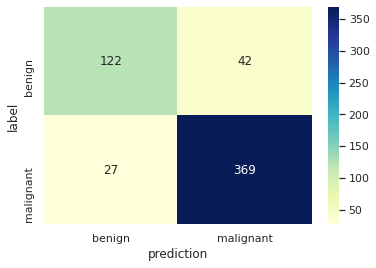

In [13]:
fig = plot_confusion_matrix_ensemble(train_fix_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-train-confusion-matrix.svg", bbox_inches = "tight")

In [14]:
pandas.DataFrame(calculate_confusion_matrix_stats(train_fix_labels, probabilities[:,1]))

,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0,0.876786,122,369,27,42,0.743902,0.931818,0.818792,0.897810,0.068182,0.256098,0.181208,0.83786,0.832575
1,0.876786,369,122,42,27,0.931818,0.743902,0.897810,0.818792,0.256098,0.068182,0.102190,0.83786,0.832575


## ROC Curve

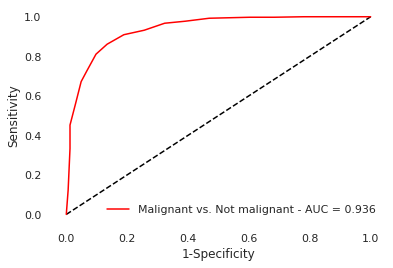

In [15]:
fig = plot_roc_curve(train_fix_labels, probabilities[:,1])
fig.savefig("figures/ensemble-train-roc-curve.svg", bbox_inches = "tight")

## Precision recall curve

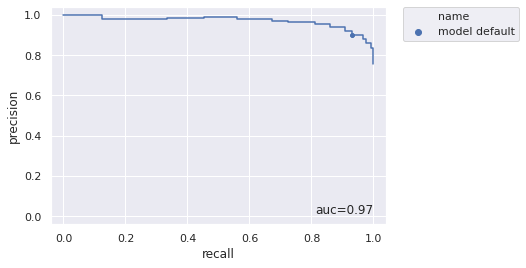

In [16]:
fig = plot_precision_recall(train_fix_labels, probabilities[:,1])
fig.savefig("figures/ensemble-train-precisionrecall.svg", bbox_inches = "tight")

# Validation

In [17]:
model = best_model
predictions = model.predict(validation_set)
probabilities = model.predict_proba(validation_set)
pm.record("validation_labels", list(validation_labels))
pm.record("validation_probabilities", list(probabilities[:,1]))
pm.record("validation_predictions", list(predictions))

In [18]:
print("accuracy: {}".format(metrics.accuracy_score(validation_labels, predictions)))

accuracy: 0.8273809523809523


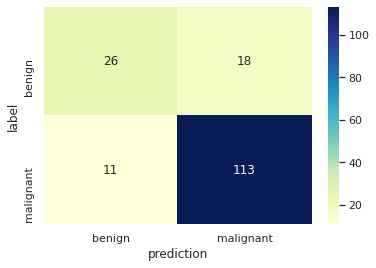

In [19]:
fig = plot_confusion_matrix_ensemble(validation_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-validation-confusion-matrix.svg", bbox_inches = "tight")

In [20]:
pandas.DataFrame(calculate_confusion_matrix_stats(validation_labels, probabilities[:,1]))

,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0,0.827381,26,113,11,18,0.590909,0.911290,0.702703,0.862595,0.088710,0.409091,0.297297,0.7511,0.733819
1,0.827381,113,26,18,11,0.911290,0.590909,0.862595,0.702703,0.409091,0.088710,0.137405,0.7511,0.733819


## ROC Curve

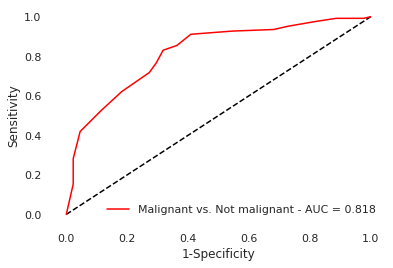

In [21]:
fig = plot_roc_curve(validation_labels, probabilities[:,1])
fig.savefig("figures/ensemble-validation-roc-curve.svg", bbox_inches = "tight")

## Precision recall curve

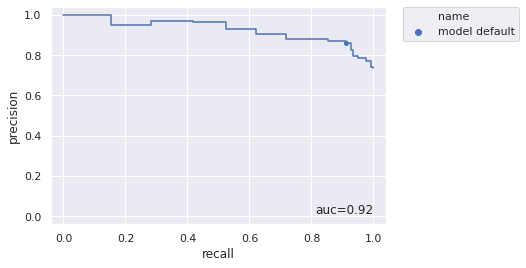

In [22]:
fig = plot_precision_recall(validation_labels, probabilities[:,1])
fig.savefig("figures/ensemble-validation-precisionrecall.svg", bbox_inches = "tight")

# Test

In [23]:
model = best_model
predictions = model.predict(test_set)
probabilities = model.predict_proba(test_set)
pm.record("test_labels", list(test_labels))
pm.record("test_probabilities", list(probabilities[:,1]))
pm.record("test_predictions", list(predictions))

In [24]:
print("accuracy: {}".format(metrics.accuracy_score(test_labels, predictions)))

accuracy: 0.78


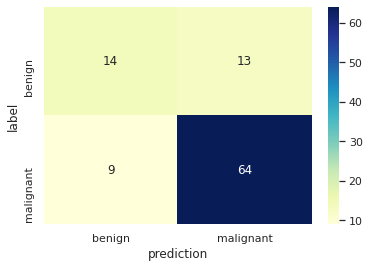

In [25]:
fig = plot_confusion_matrix_ensemble(test_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-test-confusion-matrix.svg", bbox_inches = "tight")

In [26]:
len(test_labels)

100

In [27]:
pandas.DataFrame(calculate_confusion_matrix_stats(test_labels, probabilities[:,1]))

,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0,0.78,14,64,9,13,0.518519,0.876712,0.608696,0.831169,0.123288,0.481481,0.391304,0.697615,0.674234
1,0.78,64,14,13,9,0.876712,0.518519,0.831169,0.608696,0.481481,0.123288,0.168831,0.697615,0.674234


## ROC Curve

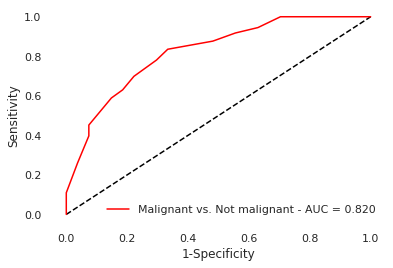

In [28]:
fig = plot_roc_curve(test_labels, probabilities[:,1])
fig.savefig("figures/ensemble-test-roc-curve.svg", bbox_inches = "tight")

## Precision recall curve

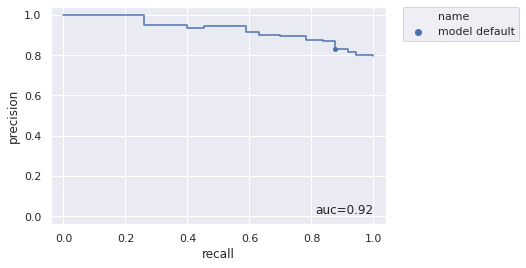

In [29]:
fig = plot_precision_recall(test_labels, probabilities[:,1])
fig.savefig("figures/ensemble-test-precisionrecall.svg", bbox_inches = "tight")

In [30]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')